# Visualização Orçamento SME

In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import glob

In [124]:
TOKEN = '198f959a5f39a1c441c7c863423264'

base_url = "https://gatewayapi.prodam.sp.gov.br:443/financas/orcamento/sof/v2.1.0"

headers = {'Authorization' : str('Bearer ' + TOKEN)}

# Carregando do arquivo

### Último ano

In [6]:
json_files = glob.glob("wget/2017/*")

frames = []

for f in json_files:
    e = json.load(open(f))
    e_df = pd.DataFrame(e['lstEmpenhos'])
    frames.append(e_df)
    
empenhos_df = pd.concat(frames)

### Todos anos

In [4]:
json_files = glob.glob("wget/*/*")

frames = []

for f in json_files:
    e = json.load(open(f))
    e_df = pd.DataFrame(e['lstEmpenhos'])
    frames.append(e_df)
    
empenhos_df_tot = pd.concat(frames)

In [7]:
empenhos_df.columns.values

array(['anoEmpenho', 'codCategoria', 'codElemento', 'codEmpenho',
       'codEmpresa', 'codFonteRecurso', 'codFuncao', 'codGrupo',
       'codItemDespesa', 'codModalidade', 'codOrgao', 'codPrograma',
       'codProjetoAtividade', 'codSubElemento', 'codSubFuncao',
       'codUnidade', 'datEmpenho', 'mesEmpenho', 'nomEmpresa',
       'numCpfCnpj', 'numReserva', 'txtCategoriaEconomica',
       'txtDescricaoElemento', 'txtDescricaoFonteRecurso',
       'txtDescricaoFuncao', 'txtDescricaoItemDespesa',
       'txtDescricaoOrgao', 'txtDescricaoPrograma',
       'txtDescricaoProjetoAtividade', 'txtDescricaoSubElemento',
       'txtDescricaoSubFuncao', 'txtDescricaoUnidade', 'txtGrupoDespesa',
       'txtModalidadeAplicacao', 'txtRazaoSocial', 'valAnuladoEmpenho',
       'valEmpenhadoLiquido', 'valLiquidado', 'valPagoExercicio',
       'valPagoRestos', 'valTotalEmpenhado'], dtype=object)

In [209]:
# empenhos_df.to_csv('empenhos.csv')

In [8]:
# to json
out = (empenhos_df[[
       'txtDescricaoSubFuncao',
       'txtDescricaoProjetoAtividade',
       #'txtDescricaoPrograma',
       'valLiquidado'
]]
       # .head(10000)
       .rename(columns={'valLiquidado': 'value'})
       .to_json(orient='records')
)
# with open('empenhos_df.json', 'w') as f:
#     f.write(out)

In [8]:
empenhos_df.describe()

anoEmpenho  codCategoria     codEmpenho      codGrupo  codModalidade  \
count     60149.0  60149.000000   60149.000000  60149.000000   60149.000000   
mean       2017.0      3.032552   66355.033866      3.023076      77.683952   
std           0.0      0.177464   34099.335508      0.225774      18.465208   
min        2017.0      3.000000       1.000000      1.000000      50.000000   
25%        2017.0      3.000000   38464.000000      3.000000      50.000000   
50%        2017.0      3.000000   67915.000000      3.000000      90.000000   
75%        2017.0      3.000000   95763.000000      3.000000      90.000000   
max        2017.0      4.000000  124973.000000      4.000000      91.000000   

       mesEmpenho    numReserva  valAnuladoEmpenho  valEmpenhadoLiquido  \
count     60149.0  60149.000000       6.014900e+04         6.014900e+04   
mean         12.0  36605.441620       3.777367e+04         1.777954e+05   
std           0.0  20558.228715       3.209309e+06         5.363070e+06   
min          12.0      5.000000       0.000000e+00         0.000000e+00   
25%          12.0  13158.000000       0.000000e+00         2.352000e+03   
50%          12.0  36674.000000       0.000000e+00         7.568860e+03   
75%          12.0  53567.000000       0.000000e+00         3.232914e+04   
max          12.0  71609.000000       6.253486e+08         6.253486e+08   

       valLiquidado  valPagoExercicio  valPagoRestos  valTotalEmpenhado  
count  6.014900e+04      6.014900e+04   6.014900e+04       6.014900e+04  
mean   1.701795e+05      1.695415e+05   4.713161e+03       2.155690e+05  
std    5.356875e+06      5.356531e+06   9.041910e+04       6.251239e+06  
min    0.000000e+00      0.000000e+00   0.000000e+00       1.000000e-02  
25%    2.000000e+03      2.000000e+03   0.000000e+00       3.000000e+03  
50%    6.977840e+03      6.904250e+03   0.000000e+00       8.025250e+03  
75%    2.824800e+04      2.774226e+04   0.000000e+00       3.860999e+04  
max    6.253486e+08      6.253486e+08   8.046543e+06       6.253486e+08

##  Índice para corrigir inflação

In [9]:
inflacao_df = pd.DataFrame(columns=["ano", "indice"], 
  data=[
    [2006, 1.8974051],
    [2007, 1.7862712],
    [2008, 1.5965463],
    [2009, 1.6222454],
    [2010, 1.4711348],
    [2011, 1.3885172],
    [2012, 1.2982224],
    [2013, 1.229265],
    [2014, 1.1859287],
    [2015, 1.0714226],
    [2016, 1.0000453],
    [2017, 1]
  ])

## Helper para explorar grupos

In [10]:
def groupSum(df):
    terms = [
        'txtCategoriaEconomica',
        'txtDescricaoElemento',
        'txtDescricaoFonteRecurso',
        # 'txtDescricaoFuncao',
        'txtDescricaoItemDespesa',
        # 'txtDescricaoOrgao',
        'txtDescricaoPrograma',
        'txtDescricaoProjetoAtividade',
        'txtDescricaoSubElemento',
        'txtDescricaoSubFuncao',
        'txtDescricaoUnidade',
        'txtGrupoDespesa',
        'txtModalidadeAplicacao',
        'txtRazaoSocial'
    ]
    for el in terms:
        result = (df
         .groupby(el)['valTotalEmpenhado', 'valLiquidado']
         .sum().apply(lambda x: x / 1000000).sort_values('valLiquidado', ascending=False)
        )
        display(result)

## Explorando dados

### Agrupamentos

In [11]:
groupSum(empenhos_df)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes          12798.904536  10172.665375
Despesas de Capital           167.358136     63.463741

valTotalEmpenhado  \
txtDescricaoElemento                                                    
Vencimentos e Vantagens Fixas - Pessoal Civil             7227.363117   
Outros Serviços de Terceiros - Pessoa Jurídica            2370.502024   
Outros Serviços de Terceiros -Pessoa Jurídica             1902.575828   
Auxílio-Alimentação                                        434.820030   
Material de Consumo                                        273.308796   
Material, Bem ou Serviço para Distribuição Grat...         390.772614   
Outros Serviços de Terceiros - Pessoa Física               140.887005   
Obras e Instalações                                         89.889729   
Contribuições                                               23.877403   
Auxílio-Transporte                                          17.829964   
Indenizações e Restituições                                 14.682730   
Outros Auxílios Financeiros a Pessoas Físicas                7.890976   
Obrigações Tributárias e Contributivas                       7.591351   
Equipamentos e Material Permanente                          56.995277   
Locação de Mão-de-Obra                                       5.120272   
Aquisição de Imóveis                                         0.762059   
Despesas de Exercícios Anteriores                            0.725765   
Premiações Culturais, Artísticas, Científicas, ...           0.107596   
Ressarcimento de Despesas de Pessoal Requisitado             0.332970   
Passagens e Despesas com Locomoção                           0.215488   
Diárias - Civil                                              0.011680   

                                                    valLiquidado  
txtDescricaoElemento                                              
Vencimentos e Vantagens Fixas - Pessoal Civil        5770.231471  
Outros Serviços de Terceiros - Pessoa Jurídica       2073.220587  
Outros Serviços de Terceiros -Pessoa Jurídica        1367.463481  
Auxílio-Alimentação                                   430.542262  
Material de Consumo                                   202.342032  
Material, Bem ou Serviço para Distribuição Grat...    162.051071  
Outros Serviços de Terceiros - Pessoa Física          117.782310  
Obras e Instalações                                    39.131728  
Contribuições                                          19.871110  
Auxílio-Transporte                                     17.829964  
Indenizações e Restituições                            14.682730  
Outros Auxílios Financeiros a Pessoas Físicas           5.651375  
Obrigações Tributárias e Contributivas                  5.109918  
Equipamentos e Material Permanente                      5.020445  
Locação de Mão-de-Obra                                  3.601912  
Aquisição de Imóveis                                    0.762059  
Despesas de Exercícios Anteriores                       0.705088  
Premiações Culturais, Artísticas, Científicas, ...      0.090112  
Ressarcimento de Despesas de Pessoal Requisitado        0.015898  
Passagens e Despesas com Locomoção                      0.015372  
Diárias - Civil                                         0.008193

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                         
Tesouro Municipal                       7533.654836   5788.261271
Fundo Constitucional da Educação        4440.279767   3827.119838
Transferências Federais                  938.337874    587.762549
Outras Fontes                             33.979873     16.566437
Transferências Estaduais                  20.010323     16.419021

valTotalEmpenhado  \
txtDescricaoItemDespesa                                                 
RPPS - PMSP                                               7224.500741   
Convênio - Creche                                         2230.700574   
Limpeza de Ambientes                                       460.588315   
Refeições Prontas                                          593.334812   
Auxílio-Refeição - RPPS                                    231.914947   
Vale-Alimentação - RPPS                                    201.652925   
Transporte Escolar - EMEF                                  226.955018   
Guarda, Vigilância e Segurança em Geral                    214.285475   
Diversos Gêneros Alimentícios                              159.092806   
Uniforme Escolar                                           299.956901   
Água e Esgoto                                              126.312290   
Energia Elétrica de Prédios Públicos                        63.686421   
Convênios - Alfabetização, Educação e Outros                46.247443   
Leite e Achocolatados                                       42.994545   
Escolas e Similares                                         89.889729   
Programa Transferência Recursos Financeiros - A...          38.034370   
Preparo e Distribuição de Alimentos                         33.383049   
Concessão de Bolsa-Auxílio para Estagiários                 34.734801   
Carnes em Geral                                             30.159054   
Armazenagem de Alimentos                                    37.534199   
Material Escolar                                            47.743602   
Outras Instituições de Caráter Assistencial, Cu...          23.877403   
Auxílio-Transporte - RPPS                                   17.757254   
Locação de Imóveis                                          22.911279   
Laticínios em Geral                                         15.931271   
Pães, Doces, Biscoitos e Salgados                           20.781584   
Restituições a Pessoas Jurídicas                            14.682730   
Supervisão, Acompanhamento e Suporte de Serviço...          17.282564   
Adiantamento - Incisos I, II e III, Art. 2º da ...          12.433464   
Transporte e Remessa de Encomendas                          36.779307   
...                                                               ...   
Adiantamento - Inciso VII, Art. 2º da Lei nº 10...           0.002100   
Utensíllios de Escritório                                    0.002096   
Encadernação                                                 0.002000   
Diversos Materiais para Manutenção de Bens Móveis            0.007955   
Exposições,Congressos,Conferências, e Outros Ev...           0.001900   
Aparelhos Telefônicos                                        0.001609   
Serviços de Abastecimento de Água e Sistema de ...           0.001458   
Disquetes e CD-ROM                                           0.001455   
Diversos Materiais Bibliográficos Não Imobilizá...           0.058830   
Materiais Fotográficos                                       0.000499   
Diversos Materiais Químicos                                  0.000607   
Direitos Autorais                                            0.000400   
Material de Proteção e Segurança de Bens Públicos            0.000378   
Assinaturas de Revistas                                      0.000119   
Locação de Software                                          0.000049   
Ônibus                                                       0.022391   
Livros                                                       0.022512   
INSS                                                         0.019500   
Hardware                                                     0.889200   
Padronizados                                                 4.795223   
Pesquisa em Geral                                            0.007813   
Veículos                                                     0.004048   
Programa Dinheiro Direto na Escola - 

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...       12278.342078   
Suporte Administrativo                                     487.094474   
Direitos da pessoa com deficiência                          71.587204   
Modernização e descentralização da gestão e pre...         113.625732   
Superação da extrema pobreza                                11.955134   
Promoção da cidade como centro de eventos e des...           2.056456   
Participação, transparência e controle social d...           1.601595   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...   9737.146846  
Suporte Administrativo                                385.216074  
Direitos da pessoa com deficiência                     56.705663  
Modernização e descentralização da gestão e pre...     44.050750  
Superação da extrema pobreza                           10.704482  
Promoção da cidade como centro de eventos e des...      1.448251  
Participação, transparência e controle social d...      0.857049

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Remuneração dos Profissionais do Magistério               4440.279767   
Operação e Manutenção do Sistema Municipal de E...        3331.263090   
Operação e Manutenção de CEIs e Creches da rede...        2233.664771   
Alimentação Escolar                                        782.432983   
Administração da Unidade                                   484.094474   
Operação e Manutenção dos Centros Educacionais ...         369.818269   
Transporte Escolar                                         233.014406   
Fornecimento de Uniformes e Material Escolar               343.673963   
Programa Nacional de Alimentação Escolar - PNAE...         164.367361   
Ações Complementares do Sistema Municipal de En...          84.158475   
Leve-Leite                                                  79.562042   
Educação Especial - Aprender sem limite                     56.401749   
Construção de Centros de Educação Infantil - CEI            75.645724   
Transferência de Recursos Financeiros  para as ...          43.174927   
Aquisição de Materiais, Equipamentos e Serviços...          92.175758   
Iniciação à Docência e Alfabetização na Idade C...          15.870822   
Alfabetização de Jovens e Adultos                           11.955134   
Manutenção de Sistemas de Informação e Comunicação          15.912125   
Ações e materiais de apoio Didático-Pedagógico ...          19.390262   
Ampliação da jornada escolar - Programa Mais Ed...          10.307844   
Convênios para Atendimento de Crianças e Adoles...          15.185455   
Construção de  Escolas Municipais de Educação I...          23.131830   
Eventos Educacionais, Culturais e Esportivos no...           7.856409   
Reformas de Equipamentos Educacionais                        4.668341   
Capacitação, Formação e Aperfeiçoamento de Serv...           5.537849   
Programa Nacional de Inclusão de Jovens - PROJO...           2.872828   
Operação e Manutenção da UniCEU                              3.074560   
Construção, reforma e ampliação de equipamentos...           6.302179   
PIÁ/Vocacional                                               1.537168   
Promoção de Campanhas e Eventos de Interesse do...           2.056456   
Operação e Manutenção dos Conselhos e Espaços P...           1.601595   
Mês do Hip Hop                                               1.203600   
Publicações de Interesse do Município                        3.000000   
E6160 - Instalação de Elevador na CEI Menino Jesus           0.254784   
E3863 - Programa Destinado à Ampliação e Qualif...           0.815673   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Remuneração dos Profissionais do Magistério          3827.119838  
Operação e Manutenção do Sistema Municipal de E...   2474.584687  
Operação e Manutenção de CEIs e Creches da rede...   1958.681495  
Alimentação Escolar                                   476.980195  
Administração da Unidade                              385.216074  
Operação e Manutenção dos Centros Educacionais ...    300.618164  
Transporte Escolar                                    194.595252  
Fornecimento de Uniformes e Material Escolar          122.696111  
Programa Nacional de Alimentação Escolar - PNAE...    118.456401  
Ações Complementares do Sistema Municipal de En...     68.331873  
Leve-Leite                                             50.826933  
Educação Especial - Aprender sem limite                48.269271  
Construção de Centros de Educação Infantil - CEI       45.401582  
Transferência de Recursos Financeiros  para as ...     41.862461  
Aquisição de Materiais, Equipamentos e Serviços...     31.072926  
Iniciação à Docência e Alfabetização na Idade C...     12.285425  
Alfabetização de Jovens e Adultos                      10.704482  
Manutenção de Sistemas de Informação e Comunicação      9.824414  
Ações e ma

valTotalEmpenhado  \
txtDescricaoSubElemento                                                 
Vencimentos e Salários                                    7224.500741   
Serviços de Creches e Assistência Pré-Escolar             2334.502300   
Indenização Auxílio-Refeição                               434.820030   
Limpeza e Conservação                                      461.311621   
Fornecimento de Alimentação                                593.683211   
Gêneros de Alimentação                                     259.066062   
Vigilância Ostensiva / Monitorada                          214.285475   
Locação de Móveis e Intangíveis                            123.252825   
Outros Materiais de Distribuição Gratuita                  300.034468   
Serviços de Água e Esgoto                                  126.318075   
Serviços de Apoio ao Ensino                                100.341372   
Serviços de Energia Elétrica e Iluminação Pública           63.726557   
Mercadorias para Doação                                     42.994545   
Obras em Andamento - Uso Comum do Povo                      89.889729   
Outros Serviços de Terceiros - Pessoa Jurídica              34.770699   
Serviços Técnicos Profissionais                             35.685388   
Instituições Caráter Assist. Cult. Educ. - Outr...          34.734801   
Armazenagem                                                 37.534199   
Material Educacional e Cultural                             47.743602   
Instituições de Caráter Assistencial, Cultural ...          23.877403   
Locação de Imóveis                                          24.863791   
Indenização Auxílio-Transporte                              17.829964   
Serviços de Telecomunicações                                25.054313   
Locação de Bens Móveis de Outra Natureza e Inta...          23.543836   
Restituições                                                14.682730   
Outros Serv. de Terceiros Pessoa Jurídica - Pag...          12.435564   
Fretes e Transporte de Encomendas                           36.840382   
Serviço de Apoio Administrativo, Técnico e Oper...          19.709371   
Manut. e Conserv. de Máquinas e Equipamentos                13.716919   
Serviços Técnicos Profissionais de T.I.                     16.007019   
...                                                               ...   
Combustíveis e Lubrificantes Automotivos                     0.045128   
Equipamentos para Vídeo, Áudio e Foto                        0.124206   
Material para Festividades e Homenagens                      0.019403   
Pessoal Requisitado de Outros Órgãos                         0.332970   
Material Hospitalar                                          0.015233   
Aparelhos e Utensílios Domésticos                            0.014777   
Tributos a Conta do Locatário e Cessionário                  0.013588   
Aparelhos e Equipamentos de Comunicação                     40.036436   
Mobiliário em Geral                                         10.793645   
Passagens para o País                                        0.011675   
Material de Processamento de Dados                           0.011939   
Serviços de Assistência Social                               0.007867   
Serviços de Publicidade Legal                                3.007800   
Máquinas, Ferramentas e Utensílios de Oficina                0.007077   
Material Odontológico                                        0.006948   
Material Bibliográfico Não Imobilizável                      0.086694   
Seguros em Geral                                             0.007496   
Bandeiras, Flâmulas e Insígnias                              0.005244   
Diárias no País                                              0.008112   
Transporte de Servidores                                     0.203812   
Diárias no Exterior                                          0.003568   
Ferramentas                                                  0.003018   
Máquinas, Instalações e Utensílios de

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                        
Educação Básica                     8872.224239   7047.395374
Educação Infantil                   2333.512781   2011.643228
Alimentação e Nutrição              1026.362386    646.263529
Administração Geral                  528.047808    415.039170
Educação Especial                     71.587204     56.705663
Tecnologia da Informação             108.087883     40.897340
Ensino Fundamental                    11.955134     10.704482
Formação de Recursos Humanos           8.612409      5.295920
Educação de Jovens e Adultos           2.872828      2.184410
Comunicação Social                     3.000000      0.000000

valTotalEmpenhado  \
txtDescricaoUnidade                                                     
Gabinete do Secretário                                    9375.871273   
Departamento de Alimentação Escolar                        864.352108   
Diretoria Regional de Educação - Campo Limpo               259.667430   
Diretoria Regional de Educação - Guaianases                296.241506   
Diretoria Regional de Educação - São Miguel                222.969903   
Diretoria Regional de Educação - Pirituba                  202.860499   
Diretoria Regional de Educação - Ipiranga                  188.018721   
Diretoria Regional de Educação - Freguesia/Bras...         212.657771   
Diretoria Regional de Educação - Itaquera                  207.890332   
Diretoria Regional de Educação - Penha                     174.380797   
Diretoria Regional de Educação - São Mateus                178.445242   
Diretoria Regional de Educação - Santo Amaro               145.165674   
Diretoria Regional de Educação - Jaçanã/Tremembé           136.623102   
Diretoria Regional de Educação - Capela do Socorro         117.796633   
Diretoria Regional de Educação  Capela do Socorro          110.392806   
Coordenadoria de Alimentação Escolar                       164.918054   
Diretoria Regional de Educação - Butantã                   108.010822   

                                                    valLiquidado  
txtDescricaoUnidade                                               
Gabinete do Secretário                               7365.919168  
Departamento de Alimentação Escolar                   555.403268  
Diretoria Regional de Educação - Campo Limpo          236.657658  
Diretoria Regional de Educação - Guaianases           214.297709  
Diretoria Regional de Educação - São Miguel           210.591931  
Diretoria Regional de Educação - Pirituba             191.569627  
Diretoria Regional de Educação - Ipiranga             176.640245  
Diretoria Regional de Educação - Freguesia/Bras...    175.734458  
Diretoria Regional de Educação - Itaquera             172.945943  
Diretoria Regional de Educação - Penha                163.037585  
Diretoria Regional de Educação - São Mateus           140.532773  
Diretoria Regional de Educação - Santo Amaro          132.690529  
Diretoria Regional de Educação - Jaçanã/Tremembé      124.153965  
Diretoria Regional de Educação - Capela do Socorro     96.161940  
Diretoria Regional de Educação  Capela do Socorro      94.119925  
Coordenadoria de Alimentação Escolar                   93.102006  
Diretoria Regional de Educação - Butantã               92.570389

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                            
Pessoal e Encargos Sociais        7227.696087   5770.247369
Outras Despesas Correntes         5571.208449   4402.418006
Investimentos                      167.358136     63.463741

valTotalEmpenhado  \
txtModalidadeAplicacao                                                  
Aplicações Diretas                                       10564.154302   
Transferências a Instituições Privadas sem Fins...        2401.965902   
Apl.Dir.Dec.Op. entre Órgãos,Fundos e Ent.Int.O...           0.142468   

                                                    valLiquidado  
txtModalidadeAplicacao                                            
Aplicações Diretas                                   8136.470299  
Transferências a Instituições Privadas sem Fins...   2099.546763  
Apl.Dir.Dec.Op. entre Órgãos,Fundos e Ent.Int.O...      0.112054

valTotalEmpenhado  \
txtRazaoSocial                                                          
FOLHA DE PAGAMENTO _ EXECUTIVO                            7224.500741   
SERV.SEC.MUN. DE EDUCAÇÃO - AUX. REFEIÇÃO                  434.818454   
SHA COMERCIO DE ALIMENTOS LTDA                             190.741737   
CIA DE SANEAMENTO BÁSICO DO ESTADO DE SÃO PAULO...         126.612305   
DENJUD REFEIÇÕES COLETIVAS ADMINISTRAÇÃO E SERV...         144.606175   
COMERCIAL MILANO BRASIL LTDA                                92.039220   
APETECE SISTEMAS DE ALIMENTACAO S/A                        161.392758   
TANGARÁ IMP.E EXP.S/A                                       61.845260   
ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO P...          66.003813   
LIMPADORA CALIFORNIA LTDA                                   56.310204   
BASE SISTEMA SERVIÇOS DE ADMINISTRAÇÃO E COMERC...          65.781097   
ARCOLIMP SERVIÇOS GERAIS LTDA                               42.813454   
EBN COMERCIO IMPORTACAO E EXPORTACAO S/A                   107.089565   
SOCIEDADE BENEFICIENTE EQUILIBRIO DE INTERLAGOS             42.737749   
P.R.M. SERVIÇOS E MAO DE OBRA ESPECIALIZADA EIRELI          44.011233   
G4S INTERATIVA SERVICE LTDA                                 36.618904   
CENTRO DE INTEGRAÇÃO EMPRESA ESCOLA CIEE                    43.214780   
BRINK MOBIL EQUIPAMENTOS EDUCACIONAIS LTDA                  66.958155   
CRUZADA PRO INFANCIA                                        33.621266   
GUIMA CONSECO CONSTRUÇÃO, SERVIÇOS E COMÉRCIO LTDA          31.047000   
DEMAX SERVICOS E COMERCIO LTDA                              30.635239   
SPDM-ASSOCIAÇÃO PAULISTA PARA O DESENVOLVIMENTO...          32.364774   
ALBATROZ SEGURANÇA E VIGILÂNCIA LTDA                        27.713410   
G4S VANGUARDA SEGURANCA E VIGILANCIA LTDA                   27.801421   
NILCATEX TEXTIL LTDA                                        94.554172   
CENTRO SOCIAL NOSSA SENHORA DO BOM PARTO                    28.631187   
A. TONANNI CONSTRUÇÕES E SERVIÇOS LTDA                      25.723431   
SERBOM ARMAZENS GERAIS FRIGORIFICOS LTDA                    37.534199   
EPS - EMPRESA PAULISTA DE SERVICOS S.A.                     24.503134   
GOCIL SERVICOS GERAIS  LTDA                                 32.003199   
...                                                               ...   
SERV.SEC.MUNICIPAL DE GESTÃO - AUX. REFEIÇÃO                 0.001576   
ASSOCIAÇÃO BENEFICENTE COMUNITÁRIA CAMINHO DA LUZ            0.178667   
ASSOCIAÇÃO BENEFICENTE CONSTRUIR                             0.130416   
FRATERNIDADE FREI FREDERICO                                  0.089981   
ANA PAULA CIAMPI DURAN                                       0.000800   
SYSTEM ENGENHARIA LTDA                                       0.012787   
ON LINE ORTOPEDIA LTDA - ME -ME                              0.004820   
FUNDAÇÃO PROF DR MANOEL PEDRO PIMENTEL- FUNAP                0.533520   
CANTARES MAGAZINE - EIRELI                                   0.329306   
G NOVA COMERCIO DE PRODUTOS ALIMENTICIOS EIRELI...           3.225500   
MARCOS ELETRICISTA LTDA - ME                                 0.010561   
ASSOCIACAO UNIAO E PROGRESSO DO PARQUE ARARIBA ...           0.028676   
ADRIANA BAUER                                                0.004000   
KATIENE APARECIDA BRAGANTIM                                  0.013641   
ONG FORÇA E PERSERVERANÇA                                    0.040660   
CENTRO CULTURAL GUERREIROS DE ZUMBI                          0.059098   
THIAGO ROBERTO DE OLIVEIRA - EPP                             0.008000   
FABIANA APARECIDA DE LIMA CALIAN                             0.000780   
MARIZETE DE CAMPOS NETO                                      0.004000   
CELSO HENRIQUE SANTOS DE SOUSA                               0.005640   
COOPERATIVA DE PRODUÇÃO E CONSUMO FAMILIAR NOSS...           1.588860   
SILVIO ROBERTO VIEIRA DOS SANTOS FILHO                       0.000672   
CARMEN SANCHES COSTA NEVES           

# Orçamento - Itens

* Fontes dos recursos (para todos itens)

## 1. Pessoal
1. Docentes
2. Getores
3. Pessoal de apoio
4. Aposentadorias

## 2. Transporte Escolar
1. Passe Livre
2. TEG
3. Outros?

## 3. Funcionamento das escolas
1. Limpeza
2. Vigilância
3. Manutenção
4. Outros?

## 4. Uniformes e materiais escolares
1. Uniformes
2. Materiais (escolares, esportivos, educativos, didáticos, artísticos... como subdividir?)
3. Outros?

## 5. Parcerias
1. Convênios creches
2. Educação especial (como subdividir?)
3. MOVA
4. Outros?

## 6. Obras e reformas
1. Novas construções (possível subdividir em unidades educacionais e outros?)
2. Reformas (idem?)
3. Outros

## 7. Alimentação
1. Refeições prontas
2. Leve-Leite
3. Preparo e distribuição
4. Insumos (para refeições preparadas pela própria SME? Como subdividir?)
5. Outros?

## 8. Pedagógico e formação
1. Cursos e formação
2. Elaboração de materiais didáticos
3. Outros?

## 9. Tecnologia da informação
1. Internet
2. Manutenção de equipamentos
3. Outros?

## 1. Pessoal

### Filtro e exploração geral

#### Checar: filtro está correto? Está realmente capturando todas despesas com pessoal?

In [13]:
pessoal = (empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('rpps', case=False))
    |
    (empenhos_df['txtGrupoDespesa'].str.contains('pessoal', case=False))
])
groupSum(pessoal)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes           7679.021212   6217.298451

valTotalEmpenhado  \
txtDescricaoElemento                                                  
Vencimentos e Vantagens Fixas - Pessoal Civil           7227.363117   
Auxílio-Alimentação                                      433.567871   
Auxílio-Transporte                                        17.757254   
Ressarcimento de Despesas de Pessoal Requisitado           0.332970   

                                                  valLiquidado  
txtDescricaoElemento                                            
Vencimentos e Vantagens Fixas - Pessoal Civil      5770.231471  
Auxílio-Alimentação                                 429.293828  
Auxílio-Transporte                                   17.757254  
Ressarcimento de Despesas de Pessoal Requisitado      0.015898

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                         
Fundo Constitucional da Educação        4440.279767   3827.119838
Tesouro Municipal                       3236.189562   2388.158422
Transferências Federais                    2.551884      2.020191

valTotalEmpenhado  valLiquidado
txtDescricaoItemDespesa                                               
RPPS - PMSP                                  7224.500741   5768.052052
Auxílio-Refeição - RPPS                       231.914947    231.900788
Vale-Alimentação - RPPS                       201.652925    197.393040
Auxílio-Transporte - RPPS                      17.757254     17.757254
Outras Despesas Fixas - Pessoal Civil           2.862376      2.179419
PMSP                                            0.332970      0.015898

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...        7255.688241   
Suporte Administrativo                                     423.332971   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...   5874.201234  
Suporte Administrativo                                343.097216

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Remuneração dos Profissionais do Magistério               4440.279767   
Operação e Manutenção do Sistema Municipal de E...        2632.078365   
Administração da Unidade                                   423.332971   
Operação e Manutenção dos Centros Educacionais ...         105.723527   
Ações Complementares do Sistema Municipal de En...          74.744206   
Programa Nacional de Inclusão de Jovens - PROJO...           2.862376   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Remuneração dos Profissionais do Magistério          3827.119838  
Operação e Manutenção do Sistema Municipal de E...   1897.763038  
Administração da Unidade                              343.097216  
Operação e Manutenção dos Centros Educacionais ...     86.573509  
Ações Complementares do Sistema Municipal de En...     60.565431  
Programa Nacional de Inclusão de Jovens - PROJO...      2.179419

valTotalEmpenhado  valLiquidado
txtDescricaoSubElemento                                               
Vencimentos e Salários                       7224.500741   5768.052052
Indenização Auxílio-Refeição                  433.567871    429.293828
Indenização Auxílio-Transporte                 17.757254     17.757254
Outras Despesas Fixas - Pessoal Civil           2.862376      2.179419
Pessoal Requisitado de Outros Órgãos            0.332970      0.015898

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                        
Educação Básica                     7252.825865   5872.021815
Administração Geral                  423.332971    343.097216
Educação de Jovens e Adultos           2.862376      2.179419

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                    
Gabinete do Secretário        7679.021212   6217.298451

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                            
Pessoal e Encargos Sociais        7227.696087   5770.247369
Outras Despesas Correntes          451.325125    447.051082

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas            7679.021212   6217.298451

valTotalEmpenhado  \
txtRazaoSocial                                                          
FOLHA DE PAGAMENTO _ EXECUTIVO                            7224.500741   
SERV.SEC.MUN. DE EDUCAÇÃO - AUX. REFEIÇÃO                  433.567871   
SERVIDORES DA SECRETARIA MUNICIPAL DE EDUCAÇÃO ...          17.757254   
CARLOS AUGUSTO DE OLIVEIRA GONÇALVES                         0.026935   
ROSELICE APARECIDA CARDOSO SANTOS                            0.026918   
LUCIENE SOARES MARCOLINO                                     0.026935   
SANDRA MARIA AMANCIO DUARTE                                  0.026779   
ANDREA REGINA DE CARVALHO CASANOVA                           0.026733   
OLAVIO DE OLIVEIRA CONCEIÇÃO                                 0.026935   
MARTA DE SOUSA SILVA                                         0.026694   
ROZILDA FRANCISCA DA SILVA PAIXAO                            0.026779   
NADIA A.F.DA SILVA RIBEIRO                                   0.026784   
ALESSANDRA APARECIDA GONÇALVES GOIS MONTEIRO                 0.026767   
ZENAIDE LIMA DOS SANTOS                                      0.026582   
ANA CLAUDIA DA SILVA                                         0.026479   
IZABEL CRISTINA S LIMA DOS SANTOS                            0.026918   
ELLEN BIE                                                    0.027156   
EDNALVA SOARES ANDRADE                                       0.026727   
DANIEL DE SOUZA MEDEIROS                                     0.026531   
CARLA REGINA LIMA DE OLIVEIRA                                0.026161   
CLAUDIA CORREIA                                              0.026408   
MARLY TEIXEIRA DE CASTRO                                     0.026279   
CRISTIANE DOS SANTOS QUEIROZ                                 0.026055   
JOSIVETE DIAS SANTANA MEIRA                                  0.026727   
MARCIA CRISTINA PERUCHI DE SOUZA                             0.026287   
VERA LUCIA DA SILVA DOS SANTOS                               0.026509   
KATIA VASCONCELOS VANCO                                      0.025807   
ERICA APARECIDA BARBOSA                                      0.026564   
ANA PAULA DE OLIVEIRA                                        0.025959   
MARIA DAS GRACAS CORDEIRO COSTA                              0.026194   
...                                                               ...   
SONIA MARIA PEREIRA                                          0.009700   
ROGERIO GONÇALVES                                            0.009595   
SUELI DE FATIMA CABRAL GUEDES                                0.009700   
TATIANA MOREIRA DOS SANTOS                                   0.009700   
WALDO FELIPE GONZALEZ YANEZ                                  0.009700   
TANIA APARECIDA FEITOSA MEDEIROS                             0.009595   
PEDRO RODRIGUES SANTOS                                       0.009700   
ROSANE BADIALE BAPTISTA                                      0.009595   
OSMAR APARECIDO EDUARDINHO                                   0.025120   
KELI CRISTINA CORREIA                                        0.024214   
ANA DALVA DOS SANTOS PENICHE PEREIRA                         0.007927   
BRUNO ALEXANDRE DEANINI                                      0.006675   
FABIO LUIZ DE ARGOLO                                         0.025120   
MICHELLE MARIA DOS SANTOS SALAZAR                            0.022230   
ALEX SANDHER SOARES DE SOUZA                                 0.024214   
ANA ERIKA VIEIRA BEZERRA DO NASCIMENTO                       0.018996   
MIGUEL TADEU VICENTIM                                        0.021219   
MARCIA TEIXEIRA ROQUE VIEIRA                                 0.024214   
IZILDINHA BONFIM PEREIRA                                     0.024214   
RIVALDO SANTANA                                              0.024214   
JOSEMIR PEDRO DE SOUZA                                       0.024214   
AMANDA MENOZZI                                               0.019855   
KATIA ROCHA SOUSA                    

## 1.1. Docentes

#### Checar: será que realmente esse filtro compreende todos docentes? Me parece sub representado.

In [19]:
docentes = (pessoal[
    (pessoal['txtDescricaoProjetoAtividade'].str.contains('Remuneração dos Profissionais do Magistério', case=False))
])
groupSum(docentes)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes           4440.279767   3827.119838

valTotalEmpenhado  valLiquidado
txtDescricaoElemento                                                          
Vencimentos e Vantagens Fixas - Pessoal Civil        4440.279767   3827.119838

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                         
Fundo Constitucional da Educação        4440.279767   3827.119838

valTotalEmpenhado  valLiquidado
txtDescricaoItemDespesa                                 
RPPS - PMSP                    4440.279767   3827.119838

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...        4440.279767   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...   3827.119838

valTotalEmpenhado  valLiquidado
txtDescricaoProjetoAtividade                                                 
Remuneração dos Profissionais do Magistério         4440.279767   3827.119838

valTotalEmpenhado  valLiquidado
txtDescricaoSubElemento                                 
Vencimentos e Salários         4440.279767   3827.119838

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                 
Educação Básica              4440.279767   3827.119838

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                    
Gabinete do Secretário        4440.279767   3827.119838

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                            
Pessoal e Encargos Sociais        4440.279767   3827.119838

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas            4440.279767   3827.119838

valTotalEmpenhado  valLiquidado
txtRazaoSocial                                                 
FOLHA DE PAGAMENTO _ EXECUTIVO        4440.279767   3827.119838

## 1.2. Gestores

#### Checar: será que realmente esse filtro compreende todos gestores? Depende do filtro anterior estar certo

In [20]:
gestores = (pessoal[
    ~(pessoal['txtDescricaoProjetoAtividade'].str.contains('Remuneração dos Profissionais do Magistério', case=False))
])
groupSum(gestores)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes           3238.741446   2390.178613

valTotalEmpenhado  \
txtDescricaoElemento                                                  
Vencimentos e Vantagens Fixas - Pessoal Civil           2787.083351   
Auxílio-Alimentação                                      433.567871   
Auxílio-Transporte                                        17.757254   
Ressarcimento de Despesas de Pessoal Requisitado           0.332970   

                                                  valLiquidado  
txtDescricaoElemento                                            
Vencimentos e Vantagens Fixas - Pessoal Civil      1943.111633  
Auxílio-Alimentação                                 429.293828  
Auxílio-Transporte                                   17.757254  
Ressarcimento de Despesas de Pessoal Requisitado      0.015898

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Tesouro Municipal               3236.189562   2388.158422
Transferências Federais            2.551884      2.020191

valTotalEmpenhado  valLiquidado
txtDescricaoItemDespesa                                               
RPPS - PMSP                                  2784.220974   1940.932214
Auxílio-Refeição - RPPS                       231.914947    231.900788
Vale-Alimentação - RPPS                       201.652925    197.393040
Auxílio-Transporte - RPPS                      17.757254     17.757254
Outras Despesas Fixas - Pessoal Civil           2.862376      2.179419
PMSP                                            0.332970      0.015898

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...        2815.408474   
Suporte Administrativo                                     423.332971   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...   2047.081397  
Suporte Administrativo                                343.097216

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Operação e Manutenção do Sistema Municipal de E...        2632.078365   
Administração da Unidade                                   423.332971   
Operação e Manutenção dos Centros Educacionais ...         105.723527   
Ações Complementares do Sistema Municipal de En...          74.744206   
Programa Nacional de Inclusão de Jovens - PROJO...           2.862376   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Operação e Manutenção do Sistema Municipal de E...   1897.763038  
Administração da Unidade                              343.097216  
Operação e Manutenção dos Centros Educacionais ...     86.573509  
Ações Complementares do Sistema Municipal de En...     60.565431  
Programa Nacional de Inclusão de Jovens - PROJO...      2.179419

valTotalEmpenhado  valLiquidado
txtDescricaoSubElemento                                               
Vencimentos e Salários                       2784.220974   1940.932214
Indenização Auxílio-Refeição                  433.567871    429.293828
Indenização Auxílio-Transporte                 17.757254     17.757254
Outras Despesas Fixas - Pessoal Civil           2.862376      2.179419
Pessoal Requisitado de Outros Órgãos            0.332970      0.015898

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                        
Educação Básica                     2812.546098   2044.901978
Administração Geral                  423.332971    343.097216
Educação de Jovens e Adultos           2.862376      2.179419

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                    
Gabinete do Secretário        3238.741446   2390.178613

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                            
Pessoal e Encargos Sociais        2787.416321   1943.127531
Outras Despesas Correntes          451.325125    447.051082

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas            3238.741446   2390.178613

valTotalEmpenhado  \
txtRazaoSocial                                                          
FOLHA DE PAGAMENTO _ EXECUTIVO                            2784.220974   
SERV.SEC.MUN. DE EDUCAÇÃO - AUX. REFEIÇÃO                  433.567871   
SERVIDORES DA SECRETARIA MUNICIPAL DE EDUCAÇÃO ...          17.757254   
CARLOS AUGUSTO DE OLIVEIRA GONÇALVES                         0.026935   
ROSELICE APARECIDA CARDOSO SANTOS                            0.026918   
LUCIENE SOARES MARCOLINO                                     0.026935   
SANDRA MARIA AMANCIO DUARTE                                  0.026779   
ANDREA REGINA DE CARVALHO CASANOVA                           0.026733   
OLAVIO DE OLIVEIRA CONCEIÇÃO                                 0.026935   
MARTA DE SOUSA SILVA                                         0.026694   
ROZILDA FRANCISCA DA SILVA PAIXAO                            0.026779   
NADIA A.F.DA SILVA RIBEIRO                                   0.026784   
ALESSANDRA APARECIDA GONÇALVES GOIS MONTEIRO                 0.026767   
ZENAIDE LIMA DOS SANTOS                                      0.026582   
ANA CLAUDIA DA SILVA                                         0.026479   
IZABEL CRISTINA S LIMA DOS SANTOS                            0.026918   
ELLEN BIE                                                    0.027156   
EDNALVA SOARES ANDRADE                                       0.026727   
DANIEL DE SOUZA MEDEIROS                                     0.026531   
CARLA REGINA LIMA DE OLIVEIRA                                0.026161   
CLAUDIA CORREIA                                              0.026408   
MARLY TEIXEIRA DE CASTRO                                     0.026279   
CRISTIANE DOS SANTOS QUEIROZ                                 0.026055   
JOSIVETE DIAS SANTANA MEIRA                                  0.026727   
MARCIA CRISTINA PERUCHI DE SOUZA                             0.026287   
VERA LUCIA DA SILVA DOS SANTOS                               0.026509   
KATIA VASCONCELOS VANCO                                      0.025807   
ERICA APARECIDA BARBOSA                                      0.026564   
ANA PAULA DE OLIVEIRA                                        0.025959   
MARIA DAS GRACAS CORDEIRO COSTA                              0.026194   
...                                                               ...   
SONIA MARIA PEREIRA                                          0.009700   
ROGERIO GONÇALVES                                            0.009595   
SUELI DE FATIMA CABRAL GUEDES                                0.009700   
TATIANA MOREIRA DOS SANTOS                                   0.009700   
WALDO FELIPE GONZALEZ YANEZ                                  0.009700   
TANIA APARECIDA FEITOSA MEDEIROS                             0.009595   
PEDRO RODRIGUES SANTOS                                       0.009700   
ROSANE BADIALE BAPTISTA                                      0.009595   
OSMAR APARECIDO EDUARDINHO                                   0.025120   
KELI CRISTINA CORREIA                                        0.024214   
ANA DALVA DOS SANTOS PENICHE PEREIRA                         0.007927   
BRUNO ALEXANDRE DEANINI                                      0.006675   
FABIO LUIZ DE ARGOLO                                         0.025120   
MICHELLE MARIA DOS SANTOS SALAZAR                            0.022230   
ALEX SANDHER SOARES DE SOUZA                                 0.024214   
ANA ERIKA VIEIRA BEZERRA DO NASCIMENTO                       0.018996   
MIGUEL TADEU VICENTIM                                        0.021219   
MARCIA TEIXEIRA ROQUE VIEIRA                                 0.024214   
IZILDINHA BONFIM PEREIRA                                     0.024214   
RIVALDO SANTANA                                              0.024214   
JOSEMIR PEDRO DE SOUZA                                       0.024214   
AMANDA MENOZZI                                               0.019855   
KATIA ROCHA SOUSA                    

## 1.3. Pessoal de apoio

#### Como filtrar?

## 1.4. Aposentadorias

#### Como filtrar?

# 2. Transporte Escolar

## 2.1. Passe livre

#### Como filtrar?

In [40]:
# encontrar repasses para SMT?
(empenhos_df[empenhos_df['txtRazaoSocial'].str.contains('transporte', case=False)]
 .groupby('txtRazaoSocial')['valLiquidado']
 .sum().apply(lambda x: round(x / 1000000, 1))
 .sort_values(ascending=False)
 .head(20)
)

txtRazaoSocial
TB SERVIÇOS TRANSPORTE LIMPEZA GERENCIAMENTO E RECURSOS HUMANOS S/A     21.9
SERVIDORES DA SECRETARIA MUNICIPAL DE EDUCAÇÃO - AUX. TRANSPORTE        17.8
COOPERATIVA BRASILEIRA DE TRANSPORTE COBRATE                             6.3
INTEGRA SOLUCOES EM LOGISTICA E TRANSPORTE LTDA - EPP                    4.7
P R SELIS TRANSPORTES EIRELI - EPP                                       2.4
COOPERATIVA DE TRANSPORTE ESCOLAR DE CONDUTOR E MONITOR - COOTRECM       1.9
AÇÃO TRANSPORTES E TURISMO LTDA - EPP                                    1.7
BELLA TRANSPORTES LTDA - ME                                              1.3
JULIEDRY TRANSPORTES LTDA -ME                                            1.3
VIA LUZ TRANSPORTES DE PASSAGEIROS LTDA                                  1.3
JTI TRANSPORTES LTDA - ME                                                1.2
TRANSRUBY TRANSPORTES EM GERAL LTDA - ME                                 1.0
WM DIAS TRANSPORTE ESCOLAR LTDA ME                           

## 2.2. TEG

#### Checar filtro

In [25]:
teg = (empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.contains('transporte', case=False)])

In [26]:
groupSum(teg)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes            233.014406    194.595252

valTotalEmpenhado  valLiquidado
txtDescricaoElemento                                                          
Outros Serviços de Terceiros - Pessoa Física          123.252825    103.753417
Outros Serviços de Terceiros -Pessoa Jurídica         103.894366     86.712105
Obrigações Tributárias e Contributivas                  5.515257      3.788212
Despesas de Exercícios Anteriores                       0.351958      0.341519

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Tesouro Municipal                233.014406    194.595252

valTotalEmpenhado  \
txtDescricaoItemDespesa                                                 
Transporte Escolar - EMEF                                  226.955018   
INSS / Contribuinte Individual                               5.515257   
Outros Serviços de Terceiros - Pessoa Jurídica ...           0.276233   
Pequenas Reformas - Centros Esportivos e Similares           0.112273   
Outros Serviços de Terceiros - Pessoa Física                 0.075726   
Transporte Escolar - EMEI                                    0.065014   
Serviço com a População de Rua                               0.007867   
Transporte Escolar - EMEE                                    0.002972   
Veículos                                                     0.004048   

                                                    valLiquidado  
txtDescricaoItemDespesa                                           
Transporte Escolar - EMEF                             190.285810  
INSS / Contribuinte Individual                          3.788212  
Outros Serviços de Terceiros - Pessoa Jurídica ...      0.273998  
Pequenas Reformas - Centros Esportivos e Similares      0.103859  
Outros Serviços de Terceiros - Pessoa Física            0.067521  
Transporte Escolar - EMEI                               0.065014  
Serviço com a População de Rua                          0.007867  
Transporte Escolar - EMEE                               0.002972  
Veículos                                                0.000000

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...         233.014406   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...    194.595252

valTotalEmpenhado  valLiquidado
txtDescricaoProjetoAtividade                                 
Transporte Escolar                   233.014406    194.595252

valTotalEmpenhado  \
txtDescricaoSubElemento                                                 
Locação de Móveis e Intangíveis                            123.252825   
Serviços de Creches e Assistência Pré-Escolar              103.774226   
Contribuições Previdenciárias - Serviços de Ter...           5.515257   
Serviços de Terceiros - Pessoa Jurídica                      0.276233   
Manutenção e Conservação de Bens Imóveis                     0.112273   
Serviços de Terceiros - Pessoa Física                        0.075726   
Serviços de Assistência Social                               0.007867   

                                                    valLiquidado  
txtDescricaoSubElemento                                           
Locação de Móveis e Intangíveis                       103.753417  
Serviços de Creches e Assistência Pré-Escolar          86.600379  
Contribuições Previdenciárias - Serviços de Ter...      3.788212  
Serviços de Terceiros - Pessoa Jurídica                 0.273998  
Manutenção e Conservação de Bens Imóveis                0.103859  
Serviços de Terceiros - Pessoa Física                   0.067521  
Serviços de Assistência Social                          0.007867

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                 
Educação Básica               233.014406    194.595252

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                    
Gabinete do Secretário         233.014406    194.595252

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes         233.014406    194.595252

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas             233.014406    194.595252

valTotalEmpenhado  \
txtRazaoSocial                                                          
COOPERATIVA BRASILEIRA DE TRANSPORTE COBRATE                 7.420587   
COOPER- X - COOP SERV TRANSPORTAD AUT PAS, ESCO...           6.522607   
INSTITUTO NACIONAL DO SEGURO SOCIAL                          5.515257   
P R SELIS TRANSPORTES EIRELI - EPP                           2.994445   
COOPER DE TRAB. DOS C. A.T.P NA  REP. FED.DO.BR...           2.403070   
COOPERATIVA DE TRANSPORTE ESCOLAR DE CONDUTOR E...           2.205080   
BELLA TRANSPORTES LTDA - ME                                  1.472303   
JULIEDRY TRANSPORTES LTDA -ME                                1.518641   
VIA LUZ TRANSPORTES DE PASSAGEIROS LTDA                      1.381945   
JTI TRANSPORTES LTDA - ME                                    1.333289   
EDILSON DA LUZ CARVALHO                                      1.256544   
WM DIAS TRANSPORTE ESCOLAR LTDA ME                           0.978898   
JAMBEIROS LUXO TRANSPORTES E TURISMO LTDA ME                 1.005418   
MILLA TRANSPORTE E TURISMO LTDA                              1.081963   
COOPERARTE-COOP. DE TRABALHO TRANSP.AUT. DE PAS...           1.094957   
TRANSLESTE TRANSPORTE ESCOLAR E TURISMO LTDA - ME            0.940548   
FABIO E KARINA TRNASPORTE ESCOLAR LTDA ME                    1.057522   
DARIO  CAMPOS DA SILVA                                       1.030644   
IRMAOS SANTANA TRANSPORTE ESCOLAR LTDA - ME                  0.872450   
SISTEMA BRASILEIRO DE TAQUARAL LTDA - ME                     0.857560   
WAGNER ROBERTO DA SILVA TRANSPORTES - ME                     0.889869   
VIRTUDE LOCADORA DE VEICULOS LTDA-ME                         0.794227   
L.V.A TRANSPORTE ESCOLAR LTDA - ME                           0.758111   
ACALANTO TRANSPORTES LTDA-ME                                 0.768953   
J. V. N. TRANSPORTES E LOCADORA DE VEICULOS LTD...           0.587144   
CREMASCO TRANSPORTES E TERCEIRIZAÇÃO LTDA ME                 0.612379   
WILSIL TRANSPORTE ESCOLAR LTDA - ME                          0.553811   
ARTFRAN TRANSPORTES LTDA - ME                                0.631099   
QUALI SERVICE TRANSPORTES LTDA ME                            0.510687   
ALEXSANDRA MARIA DE ASSIS TRANSPORTES ME                     0.522243   
...                                                               ...   
KARINA ALVES MAURICIO                                        0.006549   
LUIZ VIANA SILVA                                             0.005147   
GILVANDRO ANTONIO DE SOUZA                                   0.007757   
VERONICA RODRIGUES DA SILVEIRA                               0.005724   
SERGIO JOSE DE LIMA - ME                                     0.003633   
LUIZ CARLOS DE SOUZA OLIVEIRA                                0.008731   
REGINA MARIA GENTILE CAPITULINO                              0.011586   
MARCIO ROBERTO SANTOS SILVA                                  0.007274   
JOSÉ CARLOS SIMÃO                                            0.004790   
MARCO ANTONIO COSTA JUNIOR                                   0.008903   
FERNANDO DO PATROCINIO FIGUEIREDO                            0.004993   
CAMILA STEPHANIE VIEIRA COVO 35957368857                     0.006230   
DANIELE FARIAS TOLENTINO                                     0.008049   
FLAVIO GREGORIO LUZ                                          0.003579   
ANTONIO MARCELINO DA SILVA                                   0.005878   
JOILSON NASCIMENTO CERQUEIRA                                 0.002413   
ANISIO NUNES DA SILVA                                        0.005025   
ROSANGELA CELESTINO                                          0.003018   
MARIA ANGELA SIMÃO DO AMARAL                                 0.002854   
DAVID FERREIRA DE MELO                                       0.002683   
MAURO FERNANDES DE LIMA FILHO                                0.011024   
IVONILDO XAVIER DA SILVA                                     0.002683   
SIDNEI NOGUEIRA CORREA               

In [44]:
d = (teg
.groupby('txtDescricaoFonteRecurso')['valLiquidado']
.sum().apply(lambda x: x / 1000000))
# d.to_csv('exports/tr-02.csv')
d

txtDescricaoFonteRecurso
Tesouro Municipal    194.595252
Name: valLiquidado, dtype: float64

## 2.3. Outros?

# 3. Funcionamento das escolas

## 3.1. Limpeza

#### Como filtrar?

## 3.1. Vigilância

#### Como filtrar?

## 3.1. Manutenção

#### Como filtrar?

## 3.3. Outros?

# 4. Uniformes e materiais escolares

## 4.1. Uniformes

#### Checar filtro: pode estar sub representado

In [50]:
uniformes = (empenhos_df[empenhos_df['txtDescricaoItemDespesa'].str.contains('uniforme', case=False)])

In [51]:
groupSum(uniformes)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes             300.02518    101.825344

valTotalEmpenhado  \
txtDescricaoElemento                                                    
Material, Bem ou Serviço para Distribuição Grat...         299.956901   
Outros Serviços de Terceiros -Pessoa Jurídica                0.032845   
Material de Consumo                                          0.035434   

                                                    valLiquidado  
txtDescricaoElemento                                              
Material, Bem ou Serviço para Distribuição Grat...    101.765057  
Outros Serviços de Terceiros -Pessoa Jurídica           0.032845  
Material de Consumo                                     0.027442

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Tesouro Municipal                 300.02518    101.825344

valTotalEmpenhado  valLiquidado
txtDescricaoItemDespesa                                                  
Uniforme Escolar                                 299.956901    101.765057
Uniformes, Camisas, Coletes e Outros               0.032845      0.032845
Diversos Uniformes, Tecidos e Aviamentos           0.025565      0.017573
Uniformes Esportivos                               0.009870      0.009870

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...         300.017183   
Suporte Administrativo                                       0.007997   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...    101.817347  
Suporte Administrativo                                  0.007997

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Fornecimento de Uniformes e Material Escolar               299.956901   
Operação e Manutenção do Sistema Municipal de E...           0.033788   
Ações e materiais de apoio Didático-Pedagógico ...           0.016921   
Ampliação da jornada escolar - Programa Mais Ed...           0.009572   
Administração da Unidade                                     0.007997   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Fornecimento de Uniformes e Material Escolar          101.765057  
Operação e Manutenção do Sistema Municipal de E...      0.025796  
Ações e materiais de apoio Didático-Pedagógico ...      0.016921  
Ampliação da jornada escolar - Programa Mais Ed...      0.009572  
Administração da Unidade                                0.007997

valTotalEmpenhado  valLiquidado
txtDescricaoSubElemento                                                      
Outros Materiais de Distribuição Gratuita            299.956901    101.765057
Confecção de Uniformes, Bandeiras e Flâmulas           0.032845      0.032845
Uniformes, Tecidos e Aviamentos                        0.035434      0.027442

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                 
Educação Básica               299.990689    101.790853
Administração Geral             0.034491      0.034491

valTotalEmpenhado  \
txtDescricaoUnidade                                                    
Gabinete do Secretário                                    299.966473   
Diretoria Regional de Educação - Penha                      0.017870   
Diretoria Regional de Educação  Capela do Socorro           0.015924   
Diretoria Regional de Educação - Santo Amaro                0.011850   
Diretoria Regional de Educação - Ipiranga                   0.013064   

                                                   valLiquidado  
txtDescricaoUnidade                                              
Gabinete do Secretário                               101.774629  
Diretoria Regional de Educação - Penha                 0.017870  
Diretoria Regional de Educação  Capela do Socorro      0.015924  
Diretoria Regional de Educação - Santo Amaro           0.011850  
Diretoria Regional de Educação - Ipiranga              0.005071

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes          300.02518    101.825344

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas              300.02518    101.825344

valTotalEmpenhado  \
txtRazaoSocial                                                          
EBN COMERCIO IMPORTACAO E EXPORTACAO S/A                   107.089565   
NILCATEX TEXTIL LTDA                                        94.554172   
BRINK MOBIL EQUIPAMENTOS EDUCACIONAIS LTDA                  38.947337   
R.R.INDUSTRIA E COMERCIO DE MALHAS LTDA                     19.607706   
LT GLOBAL COMERCIO E SERVIÇOS EIRELI - ME                   18.161577   
LOTUS COMERCIO LTDA - ME                                    16.330650   
BRASILSUL INDUSTRIA E COMERCIO LTDA - EPP                    3.799922   
PLANETA EDUCACIONAL COMERCIO E CONFECCAO LTDA                0.598229   
SPEZIA COMERCIAL DE MATERIAIS E SUPRIMENTOS EIR...           0.016258   
GIMED CONFECÇÕES HOSPITALARES LTDA - EPP                     0.008000   
PERSIANAS NOVA AMERICA LTDA-ME                               0.007997   
ORION VISION - COMERCIAL LTDA - EPP                          0.007926   
HELDE EWERTON ALMEIDA DE AZEVEDO 05612426402                 0.006990   
LUZIÂNIA COMÉRCIO E SERVIÇOS EIRELI - EPP                    0.005164   
FERNANDO UNIFORMES EIRELI - EPP                              0.005071   
GHC UNIFORMES PROFISSIONAIS LTDA - EPP                       0.002880   
JOÃO ROMERA MORENO INFORMÁTICA - ME                          0.007992   
THONY PRINT EDITORA GRAFICA LTDA - ME                        0.867742   

                                                    valLiquidado  
txtRazaoSocial                                                    
EBN COMERCIO IMPORTACAO E EXPORTACAO S/A               36.572437  
NILCATEX TEXTIL LTDA                                   24.173376  
BRINK MOBIL EQUIPAMENTOS EDUCACIONAIS LTDA             19.286998  
R.R.INDUSTRIA E COMERCIO DE MALHAS LTDA                 9.709875  
LT GLOBAL COMERCIO E SERVIÇOS EIRELI - ME               6.253990  
LOTUS COMERCIO LTDA - ME                                4.312548  
BRASILSUL INDUSTRIA E COMERCIO LTDA - EPP               1.240188  
PLANETA EDUCACIONAL COMERCIO E CONFECCAO LTDA           0.215644  
SPEZIA COMERCIAL DE MATERIAIS E SUPRIMENTOS EIR...      0.016258  
GIMED CONFECÇÕES HOSPITALARES LTDA - EPP                0.008000  
PERSIANAS NOVA AMERICA LTDA-ME                          0.007997  
ORION VISION - COMERCIAL LTDA - EPP                     0.007926  
HELDE EWERTON ALMEIDA DE AZEVEDO 05612426402            0.006990  
LUZIÂNIA COMÉRCIO E SERVIÇOS EIRELI - EPP               0.005164  
FERNANDO UNIFORMES EIRELI - EPP                         0.005071  
GHC UNIFORMES PROFISSIONAIS LTDA - EPP                  0.002880  
JOÃO ROMERA MORENO INFORMÁTICA - ME                     0.000000  
THONY PRINT EDITORA GRAFICA LTDA - ME                   0.000000

## 4.2. Materiais

#### (escolares, esportivos, educativos, didáticos, artísticos... como subdividir?)

In [54]:
materiais = (empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('materia', case=False))
    &
    (~empenhos_df['txtDescricaoItemDespesa'].str.contains('comun', case=False))
    &
    (~empenhos_df['txtDescricaoItemDespesa'].str.contains('uniforme', case=False))
])

In [55]:
groupSum(materiais)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes             58.755042     26.113732

valTotalEmpenhado  \
txtDescricaoElemento                                                    
Material, Bem ou Serviço para Distribuição Grat...          47.821169   
Material de Consumo                                         10.783596   
Despesas de Exercícios Anteriores                            0.150277   

                                                    valLiquidado  
txtDescricaoElemento                                              
Material, Bem ou Serviço para Distribuição Grat...     21.005472  
Material de Consumo                                     4.957983  
Despesas de Exercícios Anteriores                       0.150277

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Tesouro Municipal                 58.755042     26.113732

valTotalEmpenhado  \
txtDescricaoItemDespesa                                                 
Material Escolar                                            47.743602   
Materiais Didáticos                                          2.476033   
Diversos Materiais de Limpeza e Higienização                 1.362784   
Diversos Materiais de Cama, Mesa e Banho                     0.875004   
Diversos Materiais de Expediente                             0.412113   
Material Educativo                                           3.883992   
Material Esportivo                                           0.207774   
Outros Materiais de Consumo                                  0.150277   
Materiais para Impressão e Encadernação                      0.671882   
Diversos Materiais Farmacológicos                            0.187762   
Diversos Materiais Elétricos e Eletrônicos                   0.109332   
Diversos Materiais de Proteção e Segurança                   0.095710   
Material de Proteção e Segurança de Pessoas                  0.084674   
Material Médico-Hospitalar                                   0.077567   
Oxigênio Industrial, Acetileno e Outros Materiais            0.132571   
Diversos Materiais de Copa e Cozinha                         0.068489   
Diversos Materiais de Acondicionamento e Embala...           0.032493   
Materiais para Desenho, Topografia e Cartografia             0.028355   
Diversos Materiais de Sinalização Visual e Afins             0.025747   
Diversos Materiais para Manutenção de Bens Imóveis           0.015373   
Diversos Materiais Hospitalares                              0.015233   
Materiais para Montagem de Exposição                         0.007991   
Diversos Materiais para Uso na Área de Informát...           0.007694   
Diversos Materiais Odontológicos                             0.006948   
Materiais para Pintura e Acabamento                          0.004868   
Diversos Materiais para Manutenção de Bens Móveis            0.007955   
Diversos Materiais Bibliográficos Não Imobilizá...           0.058830   
Materiais Fotográficos                                       0.000499   
Diversos Materiais Químicos                                  0.000607   
Material de Proteção e Segurança de Bens Públicos            0.000378   
Diversos Materiais para Áudio, Vídeo e Foto                  0.001455   
Diversos Materiais Festividades e Homenagens                 0.001048   

                                                    valLiquidado  
txtDescricaoItemDespesa                                           
Material Escolar                                       20.931055  
Materiais Didáticos                                     2.040071  
Diversos Materiais de Limpeza e Higienização            0.871918  
Diversos Materiais de Cama, Mesa e Banho                0.402524  
Diversos Materiais de Expediente                        0.360387  
Material Educativo                                      0.302317  
Material Esportivo                                      0.155505  
Outros Materiais de Consumo                             0.150277  
Materiais para Impressão e Encadernação                 0.142865  
Diversos Materiais Farmacológicos                       0.109750  
Diversos Materiais Elétricos e Eletrônicos              0.105353  
Diversos Materiais de Proteção e Segurança              0.095710  
Material de Proteção e Segurança de Pessoas             0.084674  
Material Médico-Hospitalar                              0.074417  
Oxigênio Industrial, Acetileno e Outros Materiais       0.069719  
Diversos Materiais de Copa e Cozinha                    0.068489  
Diversos Materiais de Acondicionamento e Embala...      0.032493  
Materiais para Desenho, Topografia e Cartografia        0.028355  
Diversos Materiais de Sinalização Visual e Afins        0.025653  
Diversos Materiais para Manutenção de Bens Imóveis      0.015373  
Diversos Materiais Hospitalares                         0.015230  
Materiais para Montagem de E

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...          57.718734   
Modernização e descentralização da gestão e pre...           0.828853   
Suporte Administrativo                                       0.206378   
Participação, transparência e controle social d...           0.001078   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...     25.576614  
Modernização e descentralização da gestão e pre...      0.371663  
Suporte Administrativo                                  0.164377  
Participação, transparência e controle social d...      0.001078

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Fornecimento de Uniformes e Material Escolar                43.717062   
Operação e Manutenção do Sistema Municipal de E...           3.383275   
Ações e materiais de apoio Didático-Pedagógico ...           9.956060   
Ampliação da jornada escolar - Programa Mais Ed...           0.603773   
Capacitação, Formação e Aperfeiçoamento de Serv...           0.828853   
Administração da Unidade                                     0.206378   
Operação e Manutenção dos Centros Educacionais ...           0.040250   
Ações Complementares do Sistema Municipal de En...           0.017200   
Operação e Manutenção dos Conselhos e Espaços P...           0.001078   
Operação e Manutenção da UniCEU                              0.001112   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Fornecimento de Uniformes e Material Escolar           20.931055  
Operação e Manutenção do Sistema Municipal de E...      2.297636  
Ações e materiais de apoio Didático-Pedagógico ...      1.846474  
Ampliação da jornada escolar - Programa Mais Ed...      0.448556  
Capacitação, Formação e Aperfeiçoamento de Serv...      0.371663  
Administração da Unidade                                0.164377  
Operação e Manutenção dos Centros Educacionais ...      0.039292  
Ações Complementares do Sistema Municipal de En...      0.013600  
Operação e Manutenção dos Conselhos e Espaços P...      0.001078  
Operação e Manutenção da UniCEU                         0.000000

valTotalEmpenhado  \
txtDescricaoSubElemento                                             
Material Educacional e Cultural                         47.743602   
Outros Materiais de Consumo                              2.512379   
Material de Limpeza e Produção de Higienização           1.362784   
Material de Expediente                                   1.083996   
Material Educativo e Esportivo                           4.091766   
Material de Cama, Mesa e Banho                           0.875004   
Material de Proteção e Segurança                         0.180762   
Material de Consumo                                      0.150277   
Material Farmacológico                                   0.187762   
Material Elétrico e Eletrônico                           0.109332   
Outros Materiais de Distribuição Gratuita                0.077567   
Gás e Outros Materiais Engarrafados                      0.132571   
Material de Copa e Cozinha                               0.068489   
Material de Acondicionamento e Embalagem                 0.032493   
Material de Sinalização Visual e Afins                   0.025747   
Material para Manutenção de Bens Imóveis                 0.020241   
Material Hospitalar                                      0.015233   
Material de Processamento de Dados                       0.007694   
Material Odontológico                                    0.006948   
Material para Manutenção de Bens Móveis                  0.007955   
Material Bibliográfico Não Imobilizável                  0.058830   
Material para Áudio, Vídeo e Foto                        0.001954   
Material Químico                                         0.000607   
Material para Festividades e Homenagens                  0.001048   

                                                valLiquidado  
txtDescricaoSubElemento                                       
Material Educacional e Cultural                    20.931055  
Outros Materiais de Consumo                         2.076417  
Material de Limpeza e Produção de Higienização      0.871918  
Material de Expediente                              0.503252  
Material Educativo e Esportivo                      0.457822  
Material de Cama, Mesa e Banho                      0.402524  
Material de Proteção e Segurança                    0.180762  
Material de Consumo                                 0.150277  
Material Farmacológico                              0.109750  
Material Elétrico e Eletrônico                      0.105353  
Outros Materiais de Distribuição Gratuita           0.074417  
Gás e Outros Materiais Engarrafados                 0.069719  
Material de Copa e Cozinha                          0.068489  
Material de Acondicionamento e Embalagem            0.032493  
Material de Sinalização Visual e Afins              0.025653  
Material para Manutenção de Bens Imóveis            0.020241  
Material Hospitalar                                 0.015230  
Material de Processamento de Dados                  0.007299  
Material Odontológico                               0.006948  
Material para Manutenção de Bens Móveis             0.001955  
Material Bibliográfico Não Imobilizável             0.001230  
Material para Áudio, Vídeo e Foto                   0.000499  
Material Químico                                    0.000427  
Material para Festividades e Homenagens             0.000000

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                        
Educação Básica                       47.157789     23.281583
Administração Geral                   10.767290      2.460486
Formação de Recursos Humanos           0.829964      0.371663

valTotalEmpenhado  \
txtDescricaoUnidade                                                     
Gabinete do Secretário                                      55.147769   
Diretoria Regional de Educação  Capela do Socorro            0.561995   
Diretoria Regional de Educação - Penha                       0.348548   
Diretoria Regional de Educação - São Miguel                  0.557414   
Diretoria Regional de Educação - Butantã                     0.246324   
Diretoria Regional de Educação - Jaçanã/Tremembé             0.344580   
Diretoria Regional de Educação - São Mateus                  0.258059   
Diretoria Regional de Educação - Campo Limpo                 0.321241   
Diretoria Regional de Educação - Guaianases                  0.196260   
Diretoria Regional de Educação - Santo Amaro                 0.132567   
Diretoria Regional de Educação - Pirituba                    0.172685   
Diretoria Regional de Educação - Freguesia/Bras...           0.096355   
Diretoria Regional de Educação - Itaquera                    0.098168   
Diretoria Regional de Educação - Ipiranga                    0.270690   
Departamento de Alimentação Escolar                          0.002387   

                                                    valLiquidado  
txtDescricaoUnidade                                               
Gabinete do Secretário                                 23.660507  
Diretoria Regional de Educação  Capela do Socorro       0.542368  
Diretoria Regional de Educação - Penha                  0.345548  
Diretoria Regional de Educação - São Miguel             0.306702  
Diretoria Regional de Educação - Butantã                0.236285  
Diretoria Regional de Educação - Jaçanã/Tremembé        0.232654  
Diretoria Regional de Educação - São Mateus             0.138259  
Diretoria Regional de Educação - Campo Limpo            0.133224  
Diretoria Regional de Educação - Guaianases             0.121262  
Diretoria Regional de Educação - Santo Amaro            0.118212  
Diretoria Regional de Educação - Pirituba               0.097073  
Diretoria Regional de Educação - Freguesia/Bras...      0.094152  
Diretoria Regional de Educação - Itaquera               0.044067  
Diretoria Regional de Educação - Ipiranga               0.041031  
Departamento de Alimentação Escolar                     0.002387

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes          58.755042     26.113732

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas              58.755042     26.113732

valTotalEmpenhado  \
txtRazaoSocial                                                          
BRINK MOBIL EQUIPAMENTOS EDUCACIONAIS LTDA                  28.010818   
ATAKA BRASIL COMERCIO E SERVIÇOS EIRELI                      9.892844   
GRAFICA PRINT INDUSTRIA E EDITORA LTDA                       2.779470   
FUTURA COMERCIO DE MATERIAIS EDUCACIONAIS LTDA ...           1.904316   
THONY PRINT EDITORA GRAFICA LTDA - ME                        2.717415   
ONLINE PAPELARIA E INFORMATICA EIRELI - EPP                  1.191670   
SPEZIA COMERCIAL DE MATERIAIS E SUPRIMENTOS EIR...           0.540511   
PRIME STOP COMERCIAL LTDA - ME                               0.377421   
INFO-SIG COMÉRCIO DE SUPRIMENTOS DE INFORMÁTICA...           0.301925   
INDUSTRIA E COMERCIO COLCHOES ORTHOVIDA LTDA - EPP           0.678929   
MOMILLI COMERCIAL LTDA - EPP                                 0.574658   
INNOVARY FUTURE COMERCIAL LTDA - ME                          0.157742   
RELAFLEX INDUSTRIA E COMERCIO DE COLCHOES EIREL...           0.106500   
MEDPOA COMERCIO DE MATERIAL HOSPITALAR LTDA                  0.101206   
AMÉRICA SERVE LIMPEZA E SERVIÇOS EIRELI EPP                  0.097586   
FEIRA LIVRO COMERCIO LTDA                                    0.089070   
LUMINUS COMERCIAL ELETRICA LTDA - EPP                        0.075000   
METALPLAY INDÚSTRIA E COMÉRCIO LTDA EPP                      0.071267   
TERRAO COMERCIO E REPRESENTACOES EIRELI                      0.063353   
TONI CARLOS PEREIRA COMERCIO DE LIVROS                       0.061207   
PATRICIA C R MUCEDULA BRINQUEDOS PEDAGOGICOS ME              0.056832   
IMPRENSA OFICIAL DO ESTADO S/A IMESP                         0.054590   
AMAD-COMERCIO E TRANSPORTE DE GÁS LTDA - EPP                 0.107859   
CTIS TECNOLOGIA S.A.                                         0.049812   
MAROUN SLEIMAN MOVEIS E COLCHOES LTDA - EPP                  0.046956   
TSC PONTUAL COMERCIAL E DISTRIBUIDORA LTDA - EPP             0.040688   
JOÃO ROMERA MORENO INFORMÁTICA - ME                          0.038513   
ML RODRIGUES COMERCIAL LTDA. - ME                            0.046176   
WINDGRAF GRAFICA E EDITORA EIRELI - EPP                      0.035060   
GHAIA COMERCIAL LTDA-EPP                                     0.038214   
...                                                               ...   
RICARDO DOS SANTOS MOTTA 42365546587                         0.000469   
F.K.G COMERCIO E SERVICOS AUTOMOTIVOS LTDA - ME              0.007976   
JEAN CARLO SIQUEIRA 40227943805                              0.000453   
LUCRATT COMER CIO E TURISMO LTDA - ME                        0.000452   
IDPROMO COMERCIAL EIRELI - EPP                               0.000422   
DIGITAL DISTRIBUIDORA COMERCIO E SERVIÇOS EIREL...           0.000399   
FERRAGENS SÃO JUDAS LTDA - EPP                               0.000378   
VITOR EDE RODRIGUES GUERIERI 45633605896                     0.000368   
AMAZONAS COMÉRCIO DE ADESIVOS E BRINDES LTDA  ME             0.000390   
GAYER MED PRODUTOS MEDICOS E ODONTOLOGICOS LTDA...           0.000259   
JOÃO BOSCO DE LIMA 00025405845                               0.000247   
SANIGRAN LTDA-ME                                             0.000360   
SILMARA APARECIDA VIEIRA CHAGAS GABRIEL 2805753...           0.000140   
PAPELARIA PAPEL CARTAZ LTDA-EPP                              0.000084   
DG ENTERPRISES LTDA - ME                                     0.000083   
SPACE IDENTIDADE CORPORATIVA LTDA - ME                       0.000040   
BRINK CRIANÇA COMERCIO DE BRINQUEDOS LTDA-ME                 0.005670   
ESPORTE GLOBAL COMÉRCIO DE ARTIGOS ESPORTIVOS L...           0.005480   
ALG RIO COMÉRCIO DE PRODUTOS LTDA - EPP                      0.005670   
LOGPRESS SOLUCOES GRAFICAS LTDA                              4.026539   
MALVAGLIA COMERCIAL LTDA-ME                                  0.001967   
DUAL SYSTEM PRODUTOS E SERVIÇOS LTDA                         3.523019   
DNA EDITORA E SOLUCOES EM ACESSIBILID

# 5. Parcerias

## 5.1. Convênios com creches

#### Checar filtro

In [56]:
(empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.contains('conv', case=False)]
    .txtDescricaoProjetoAtividade.unique())

array(['Operação e Manutenção de CEIs e Creches da rede conveniada e outras mo',
       'Convênios para Atendimento de Crianças e Adolescentes com necessidades'],
      dtype=object)

In [57]:
convenios = (empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('Operação e Manutenção de CEIs e Creches da rede conveniada e outras mo', case=False))
])

In [58]:
groupSum(convenios)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes           2233.664771   1958.681495

valTotalEmpenhado  \
txtDescricaoElemento                                                
Outros Serviços de Terceiros - Pessoa Jurídica        2228.516263   
Outros Serviços de Terceiros - Pessoa Física             4.635199   
Outros Serviços de Terceiros -Pessoa Jurídica            0.492835   
Despesas de Exercícios Anteriores                        0.020474   

                                                valLiquidado  
txtDescricaoElemento                                          
Outros Serviços de Terceiros - Pessoa Jurídica   1954.306235  
Outros Serviços de Terceiros - Pessoa Física        3.931476  
Outros Serviços de Terceiros -Pessoa Jurídica       0.433548  
Despesas de Exercícios Anteriores                   0.010237

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Tesouro Municipal               2225.218685   1956.087761
Transferências Federais            8.446086      2.593735

valTotalEmpenhado  valLiquidado
txtDescricaoItemDespesa                                       
Convênio - Creche                    2228.235843   1954.064406
Locação de Imóveis                      4.985537      4.195012
IPTU                                    0.413082      0.404277
Indenizações Não Tributáveis            0.020474      0.010237
Despesas com Reembolso                  0.009835      0.007563

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...        2233.664771   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...   1958.681495

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Operação e Manutenção de CEIs e Creches da rede...        2233.664771   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Operação e Manutenção de CEIs e Creches da rede...   1958.681495

valTotalEmpenhado  valLiquidado
txtDescricaoSubElemento                                                       
Serviços de Creches e Assistência Pré-Escolar        2228.235843   1954.064406
Locação de Imóveis                                      5.408454      4.606852
Indenizações e Restituições                             0.020474      0.010237

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                 
Educação Infantil            2233.664771   1958.681495

valTotalEmpenhado  \
txtDescricaoUnidade                                                     
Diretoria Regional de Educação - Campo Limpo               208.947509   
Diretoria Regional de Educação - Guaianases                273.058797   
Diretoria Regional de Educação - São Miguel                189.807989   
Diretoria Regional de Educação - Pirituba                  171.742631   
Diretoria Regional de Educação - Freguesia/Bras...         191.832897   
Diretoria Regional de Educação - Ipiranga                  165.378293   
Diretoria Regional de Educação - Itaquera                  185.258401   
Diretoria Regional de Educação - Penha                     149.310823   
Diretoria Regional de Educação - São Mateus                147.244224   
Diretoria Regional de Educação - Santo Amaro               116.848040   
Diretoria Regional de Educação - Jaçanã/Tremembé           118.606244   
Diretoria Regional de Educação - Capela do Socorro         101.595448   
Diretoria Regional de Educação  Capela do Socorro           87.260484   
Diretoria Regional de Educação - Butantã                    90.494226   
Gabinete do Secretário                                      36.278766   

                                                    valLiquidado  
txtDescricaoUnidade                                               
Diretoria Regional de Educação - Campo Limpo          196.493778  
Diretoria Regional de Educação - Guaianases           195.500656  
Diretoria Regional de Educação - São Miguel           185.957738  
Diretoria Regional de Educação - Pirituba             165.975216  
Diretoria Regional de Educação - Freguesia/Bras...    159.690220  
Diretoria Regional de Educação - Ipiranga             159.652937  
Diretoria Regional de Educação - Itaquera             156.469731  
Diretoria Regional de Educação - Penha                141.828572  
Diretoria Regional de Educação - São Mateus           117.174850  
Diretoria Regional de Educação - Santo Amaro          111.244292  
Diretoria Regional de Educação - Jaçanã/Tremembé      109.189031  
Diretoria Regional de Educação - Capela do Socorro     85.473633  
Diretoria Regional de Educação  Capela do Socorro      80.222002  
Diretoria Regional de Educação - Butantã               78.989928  
Gabinete do Secretário                                 14.818912

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes        2233.664771   1958.681495

valTotalEmpenhado  \
txtModalidadeAplicacao                                                  
Transferências a Instituições Privadas sem Fins...        2228.394269   
Aplicações Diretas                                           5.128034   
Apl.Dir.Dec.Op. entre Órgãos,Fundos e Ent.Int.O...           0.142468   

                                                    valLiquidado  
txtModalidadeAplicacao                                            
Transferências a Instituições Privadas sem Fins...   1954.204418  
Aplicações Diretas                                      4.365024  
Apl.Dir.Dec.Op. entre Órgãos,Fundos e Ent.Int.O...      0.112054

valTotalEmpenhado  \
txtRazaoSocial                                                          
SOCIEDADE BENEFICIENTE EQUILIBRIO DE INTERLAGOS             42.737749   
CRUZADA PRO INFANCIA                                        33.450280   
CENTRO SOCIAL NOSSA SENHORA DO BOM PARTO                    28.229937   
CARITAS DIOCESANA DE CAMPO LIMPO-CDCL                       23.759583   
UNAS - UNIAO DE NUCLEOS ASSOCIACOES DOS MORADOR...          22.288221   
INSTITUTO CRIANÇA CIDADÂ                                    18.914968   
CENTRO DE ASSISTÊNCIA E PROMOÇÃO SOCIAL NOSSO LAR           20.532360   
SOCIEDADE BENEFICENTE SÃO CAMILO                            20.622715   
ASSOCIAÇÃO SÃO SABAS DE FILANTROPIA                         15.965346   
C.A.S.A.S. - CENTRO DE APOIO A SAUDE E ASSISTEN...          14.353111   
SOCIEDADE EDUCATIVA E BENEFICENTE ESTRELA DA ES...          16.445365   
CEDEJI - CENTRO EDUCACIONAL DE DESENVOLVIMENTO ...          14.837746   
ASSOCIAÇÃO CEDRO DO LIBANO DE PROTEÇÃO À INFÂNCIA           12.928359   
ASSOCIAÇÃO SEARA NORTE                                      14.273992   
ICEDEH-INSTITUTO EDUCACIONAL E DE DEFESA DOS DI...          12.380065   
OBRA ASSISTENCIAL NOSSA SENHORA DO O                        12.514542   
NUCLEO ASSISTENCIAL FRATERNO                                15.484831   
LIGA DAS SENHORAS CATOLICAS DE SÃO PAULO                    12.691966   
INSTITUTO BENEFICENTE PERSIO GUIMARAES AZEVEDO              10.568354   
ASSOCIAÇÃO ÁGUAS MARINHA                                    11.705560   
ASSOCIAÇÃO CENTRO SOCIAL BROOKLIN PAULISTA                  10.593808   
ACAO SOCIAL COMUNITARIA DO LAGEADO JOILSON DE J...          15.076075   
INSTITUTO EDUCACIONAL PAIS E FILHOS                          9.393201   
GREMIO AMIGOS DIAS FELIZES                                   9.349912   
GALPÃO ATRIA BRASIL                                         11.906963   
IESP - INSTITUTO EDUCAR DE SÃO PAULO                        10.435716   
INSTITUTO CEM POR CENTO SOCIAL                              10.418738   
ASSOCIAÇÃO EVANGELICA BENEFICENTE                            9.058178   
FUNDAÇÃO COMUNIDADE DA GRAÇA                                10.350552   
ASS DO ABRIGO NS SRA RAINHA DA PAZ DO JD FIM DE...           8.530212   
...                                                               ...   
AMERICO GOMES DA SILVA                                       0.019470   
FLORIPES GIMENEZ                                             0.005665   
FABIANA ALCANTARA REZENDE                                    0.003969   
MARIA JOSE ALCANTARA DE REZENDE                              0.003969   
STALEY MONTE WU                                              0.003537   
ASSOCIAÇÃO PROTAGONISTA DO AMANHÃ                            0.117392   
JOSÉ LUCAS GIAMPERSA                                         0.000183   
ASSOCIAÇÃO PLANTANDO FUTURO                                  0.512272   
ASSOCIAÇÃO BENEFICENTE E CULTURA PASSOS                      0.100934   
ASSOCIAÇÃO BENEFICENTE CONSTRUIR                             0.130416   
ASSOCIAÇÃO SOCIAL E EDUCACIONAL ALYMAR                       0.435575   
UNIÃO DOS MORADORES DA FAVELA DO JD. COLOMBO                 0.070087   
INSTITUTO AMOR E UNIÃO                                       0.470198   
GRUPO DE MULHERES DE VILA FLAVIA SÃO MATEUS                  1.401175   
OBRA ASSISTENCIAL NOSSA SENHORA DO Ó                         0.440886   
FRATERNIDADE FREI FREDERICO                                  0.089981   
ASSOCIAÇÃO BENEFICENTE COMUNITÁRIA CAMINHO DA LUZ            0.178667   
ASSOCIAÇÃO TALENTOS ESPECIAIS LIBERDADE ESPERAN...           0.095855   
ASSOCIAÇÃO EDUCACIONAL PITAGORAS                             0.131185   
INSTITUTO UNÇÃO E ADORAÇÃO EM CRISTO                         0.434690   
ASSOCIAÇÃO EDUCACIONAL CLUBE DOS LEOEZINHOS                  0.055830   
ASSOCIAÇÃO BENEFICENTE AZUL ESPERANÇA                        0.191670   
ASSOCIAÇÃO DOS MORADORES DA FAVELA SÃ

## 5.2. Educação especial

In [59]:
ed_especial = (empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('Convênios para Atendimento de Crianças e Adolescentes com necessidades', case=False))
])

In [60]:
groupSum(ed_especial)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes             15.185455      8.436392

valTotalEmpenhado  \
txtDescricaoElemento                                                
Outros Serviços de Terceiros - Pessoa Jurídica          15.185455   

                                                valLiquidado  
txtDescricaoElemento                                          
Outros Serviços de Terceiros - Pessoa Jurídica      8.436392

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Tesouro Municipal                 15.185455      8.436392

valTotalEmpenhado  valLiquidado
txtDescricaoItemDespesa                                               
Convênios - Portadores de Deficiência          15.185455      8.436392

valTotalEmpenhado  valLiquidado
txtDescricaoPrograma                                               
Direitos da pessoa com deficiência          15.185455      8.436392

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Convênios para Atendimento de Crianças e Adoles...          15.185455   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Convênios para Atendimento de Crianças e Adoles...      8.436392

valTotalEmpenhado  valLiquidado
txtDescricaoSubElemento                                     
Serviços de Apoio ao Ensino          15.185455      8.436392

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                 
Educação Especial              15.185455      8.436392

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                    
Gabinete do Secretário          15.185455      8.436392

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes          15.185455      8.436392

valTotalEmpenhado  \
txtModalidadeAplicacao                                                  
Transferências a Instituições Privadas sem Fins...          15.185455   

                                                    valLiquidado  
txtModalidadeAplicacao                                            
Transferências a Instituições Privadas sem Fins...      8.436392

valTotalEmpenhado  \
txtRazaoSocial                                                          
ASSOCIAÇÃO DE PAIS E AMIGOS DOS EXCEPCIONAIS DE...           3.939519   
ASSOCIAÇÃO OBRAS SOCIAIS SANTA CRUZ                          0.891831   
ASSOCIAÇAO NANY APPLE EM BENEFICIO DO OBESO E C...           0.943445   
AHIMSA ASSOC EDUC PARA MULT DEFIC                            0.795604   
INSTITUTO SEVERINO FABRIANI PARA CRIANÇAS SURDAS             1.735683   
ASSOCIAÇÃO FILHAS DE SANTA MARIA DA PROVIDENCIA              0.756604   
ADEFAV - CENTRO DE RECURSOS EM DEFICIENCIA MULT...           0.684021   
ASSOCIAÇÃO DA CASA DOS DEFICIENTES  DE ERMELINO...           0.595999   
CENTRO SOCIAL NOSSA SENHORA DA PENHA - CENHA                 0.459374   
CAMINHANDO NUCLEO DE EDUCAÇÃO E AÇÃO SOCIAL                  0.410467   
ASSOCIAÇÃO DE ASSISTÊNCIA A CRIANÇA DEFICIENTE               0.999677   
INSTITUTO MATER DEI                                          0.275569   
LAR MÃE DO DIVINO AMOR                                       0.263433   
INST. EFORT ACAO SOCIAL, CUL.EDUC.P. DES.ENER.I...           0.432143   
CENTRO DE ACAO SOCIAL ESPACO LIVRE                           0.240206   
INSTITUICAO BENEFICENTE NOSSO LAR                            0.260157   
ASSOCIAÇÃO NOVA PROJETO EDUCAÇÃO E TRABALHO PAR...           0.186335   
ASSOCIACAO BENEFICENTE GUAINUMBI                             0.271216   
LARAMARA ASSOCIAÇÃO BRASILEIRA ASSISTÊNCIA DEFI...           0.547947   
GRUPO BRASIL DE  APOIO AO SURDOCEGO E AO MULTIP...           0.183750   
SHALOM LIGA ISRAELITA DO BRASIL                              0.122733   
ASSOCIAÇÃO NOSSA ESCOLA                                      0.129823   
A ALTERNATIVA ASSOCIAÇÃO DE  ASSISTÊNCIA  AO EX...           0.059918   

                                                    valLiquidado  
txtRazaoSocial                                                    
ASSOCIAÇÃO DE PAIS E AMIGOS DOS EXCEPCIONAIS DE...      1.886311  
ASSOCIAÇÃO OBRAS SOCIAIS SANTA CRUZ                     0.658792  
ASSOCIAÇAO NANY APPLE EM BENEFICIO DO OBESO E C...      0.638419  
AHIMSA ASSOC EDUC PARA MULT DEFIC                       0.598979  
INSTITUTO SEVERINO FABRIANI PARA CRIANÇAS SURDAS        0.576806  
ASSOCIAÇÃO FILHAS DE SANTA MARIA DA PROVIDENCIA         0.519410  
ADEFAV - CENTRO DE RECURSOS EM DEFICIENCIA MULT...      0.468102  
ASSOCIAÇÃO DA CASA DOS DEFICIENTES  DE ERMELINO...      0.416625  
CENTRO SOCIAL NOSSA SENHORA DA PENHA - CENHA            0.395203  
CAMINHANDO NUCLEO DE EDUCAÇÃO E AÇÃO SOCIAL             0.328279  
ASSOCIAÇÃO DE ASSISTÊNCIA A CRIANÇA DEFICIENTE          0.271272  
INSTITUTO MATER DEI                                     0.226902  
LAR MÃE DO DIVINO AMOR                                  0.221253  
INST. EFORT ACAO SOCIAL, CUL.EDUC.P. DES.ENER.I...      0.208738  
CENTRO DE ACAO SOCIAL ESPACO LIVRE                      0.177092  
INSTITUICAO BENEFICENTE NOSSO LAR                       0.172143  
ASSOCIAÇÃO NOVA PROJETO EDUCAÇÃO E TRABALHO PAR...      0.150650  
ASSOCIACAO BENEFICENTE GUAINUMBI                        0.141915  
LARAMARA ASSOCIAÇÃO BRASILEIRA ASSISTÊNCIA DEFI...      0.113171  
GRUPO BRASIL DE  APOIO AO SURDOCEGO E AO MULTIP...      0.108679  
SHALOM LIGA ISRAELITA DO BRASIL                         0.071468  
ASSOCIAÇÃO NOSSA ESCOLA                                 0.068951  
A ALTERNATIVA ASSOCIAÇÃO DE  ASSISTÊNCIA  AO EX...      0.017232

## 5.3. MOVA

#### Como filtrar?

## 5.4. Outros?

# 6. Obras e reformas

## 6.1. Novas construções 

#### (possível subdividir em unidades educacionais e outros?) 

#### Checar filtro

In [75]:
(empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.contains('constru', case=False)]
    .txtDescricaoProjetoAtividade.unique())

array(['Construção de  Escolas Municipais de Educação Infantil - EMEI',
       'Construção de Centros de Educação Infantil - CEI',
       'Construção, reforma e ampliação de equipamentos educacionais'],
      dtype=object)

In [76]:
obras = (empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('constru', case=False))
    &
    ~(empenhos_df['txtDescricaoProjetoAtividade'].str.contains('reforma', case=False))
])

In [77]:
groupSum(obras)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas de Capital            98.777554     52.961733

valTotalEmpenhado  valLiquidado
txtDescricaoElemento                                        
Obras e Instalações                  83.332766     37.516945
Indenizações e Restituições          14.682730     14.682730
Aquisição de Imóveis                  0.762059      0.762059

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Tesouro Municipal                 39.727196     18.114148
Outras Fontes                     33.979873     16.566437
Transferências Estaduais          20.010323     16.419021
Transferências Federais            5.060162      1.862127

valTotalEmpenhado  valLiquidado
txtDescricaoItemDespesa                                          
Escolas e Similares                       83.332766     37.516945
Restituições a Pessoas Jurídicas          14.682730     14.682730
Desapropriações                            0.762059      0.762059

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...          98.777554   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...     52.961733

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Construção de Centros de Educação Infantil - CEI            75.645724   
Construção de  Escolas Municipais de Educação I...          23.131830   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Construção de Centros de Educação Infantil - CEI       45.401582  
Construção de  Escolas Municipais de Educação I...      7.560151

valTotalEmpenhado  valLiquidado
txtDescricaoSubElemento                                                
Obras em Andamento - Uso Comum do Povo          83.332766     37.516945
Restituições                                    14.682730     14.682730
Outras Aquisições de Bens Imóveis                0.762059      0.762059

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                 
Educação Infantil              98.777554     52.961733

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                    
Gabinete do Secretário          98.777554     52.961733

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                 
Investimentos            98.777554     52.961733

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas              98.777554     52.961733

valTotalEmpenhado  valLiquidado
txtRazaoSocial                                                            
SAO PAULO SECRETARIA DA EDUCACAO                   14.682730     14.682730
LOPES KALIL ENGENHARIA E COMERCIO LTDA             24.832149     14.212378
LEMAM CONSTRUCOES E COMERCIO S.A.                  15.664034      5.957008
CONSÓRCIO FBS - LOPES KALIL                        14.142956      4.945245
CONSTRUMEDICI ENGENHARIA E COMÉRCIO  LTDA           5.406643      3.873227
CONSTRUTORA CRONACON LTDA                          10.552064      2.944424
FLASA ENGENHARIA E CONSTRUCOES LTDA                 6.325143      1.975835
SIMETRICA ENGENHARIA LTDA                           2.269715      1.835567
DB CONSTRUCOES LTDA                                 2.148101      1.447351
DEPTO DESAP COND AC  JUD EM DESAPR                  0.762059      0.762059
KALLAS ENGENHARIA LTDA                              1.991962      0.325909

## 6.2. Reformas (possível subdividir em unidades educacionais e outros?)

#### (possível subdividir em unidades educacionais e outros?) 

#### Checar filtro

In [79]:
reformas = (empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('reforma', case=False))
])

In [80]:
groupSum(reformas)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas de Capital            10.970521      5.301563

valTotalEmpenhado  \
txtDescricaoElemento                                                
Outros Serviços de Terceiros - Pessoa Jurídica           4.668341   
Obras e Instalações                                      6.302179   

                                                valLiquidado  
txtDescricaoElemento                                          
Outros Serviços de Terceiros - Pessoa Jurídica      3.686780  
Obras e Instalações                                 1.614783

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Tesouro Municipal                 10.970521      5.301563

valTotalEmpenhado  valLiquidado
txtDescricaoItemDespesa                                               
Gerenciamento                                   3.528341      3.117437
Escolas e Similares                             6.302179      1.614783
Manutenção e Reformas de Bens Imóveis           1.140000      0.569343

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...          10.970521   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...      5.301563

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Reformas de Equipamentos Educacionais                        4.668341   
Construção, reforma e ampliação de equipamentos...           6.302179   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Reformas de Equipamentos Educacionais                   3.686780  
Construção, reforma e ampliação de equipamentos...      1.614783

valTotalEmpenhado  valLiquidado
txtDescricaoSubElemento                                                  
Serviços Técnicos Profissionais                    3.528341      3.117437
Obras em Andamento - Uso Comum do Povo             6.302179      1.614783
Manutenção e Conservação de Bens Imóveis           1.140000      0.569343

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                 
Educação Básica                10.970521      5.301563

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                    
Gabinete do Secretário          10.970521      5.301563

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                 
Investimentos            10.970521      5.301563

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas              10.970521      5.301563

valTotalEmpenhado  \
txtRazaoSocial                                                          
CONSTRUTORA ITAJAI LTDA                                      1.666799   
ENGEBRAS CONSTRUÇÕES E EMPREENDIMENTOS LTDA                  5.766503   
HE ENGENHARIA  COMÉRCIO E REPRESENTAÇÕES LTDA                0.755351   
CONSTRUTORA PROGREDIOR LTDA                                  1.140000   
SANED ENGENHARIA  E EMPREENDIMENTOS S.A                      0.547165   
CENTRAL DE PLANEJAMENTO DE  OBRAS  E CONSTRUÇÕE...           0.522889   
ALMEIDA SAPATA ENGENHARIA E CONSTRUÇÕES LTDA                 0.559027   
SYSTEM ENGENHARIA LTDA                                       0.012787   

                                                    valLiquidado  
txtRazaoSocial                                                    
CONSTRUTORA ITAJAI LTDA                                 1.355032  
ENGEBRAS CONSTRUÇÕES E EMPREENDIMENTOS LTDA             1.091909  
HE ENGENHARIA  COMÉRCIO E REPRESENTAÇÕES LTDA           0.741501  
CONSTRUTORA PROGREDIOR LTDA                             0.569343  
SANED ENGENHARIA  E EMPREENDIMENTOS S.A                 0.531595  
CENTRAL DE PLANEJAMENTO DE  OBRAS  E CONSTRUÇÕE...      0.522875  
ALMEIDA SAPATA ENGENHARIA E CONSTRUÇÕES LTDA            0.489309  
SYSTEM ENGENHARIA LTDA                                  0.000000

## 6.3. Outros?

# 7. Alimentação

#### Checar filtro

In [88]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    &
    (~empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
]
.txtDescricaoProjetoAtividade.unique())

array(['Alimentação Escolar',
       'Programa Nacional de Alimentação Escolar - PNAE/ FNDE'],
      dtype=object)

In [89]:
alimentacao = (empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    &
    (~empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
])

In [92]:
groupSum(alimentacao)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes            946.800345    595.436596

valTotalEmpenhado  valLiquidado
txtDescricaoElemento                                                          
Outros Serviços de Terceiros -Pessoa Jurídica         664.228229    381.067444
Material de Consumo                                   258.694712    194.498042
Contribuições                                          23.877403     19.871110

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Transferências Federais          922.274282    581.286497
Tesouro Municipal                 24.526063     14.150100

valTotalEmpenhado  \
txtDescricaoItemDespesa                                                 
Refeições Prontas                                          593.326962   
Diversos Gêneros Alimentícios                              159.069208   
Preparo e Distribuição de Alimentos                         33.367069   
Carnes em Geral                                             30.159054   
Armazenagem de Alimentos                                    37.534199   
Outras Instituições de Caráter Assistencial, Cu...          23.877403   
Laticínios em Geral                                         15.931271   
Pães, Doces, Biscoitos e Salgados                           20.711276   
Grãos em Geral                                              12.048248   
Frutas Naturais                                             10.804552   
Leite em Pó ou Natural                                       2.847350   
Óleos, Gorduras e Azeites Comestíveis, Condimen...           4.226210   
Massas Alimentícias                                          1.560750   
Bebidas em Geral                                             1.216395   
Farináceos                                                   0.120400   

                                                    valLiquidado  
txtDescricaoItemDespesa                                           
Refeições Prontas                                     328.161845  
Diversos Gêneros Alimentícios                         118.266813  
Preparo e Distribuição de Alimentos                    29.668550  
Carnes em Geral                                        23.368220  
Armazenagem de Alimentos                               23.237049  
Outras Instituições de Caráter Assistencial, Cu...     19.871110  
Laticínios em Geral                                    15.732020  
Pães, Doces, Biscoitos e Salgados                      15.177323  
Grãos em Geral                                          9.668589  
Frutas Naturais                                         4.785197  
Leite em Pó ou Natural                                  2.847350  
Óleos, Gorduras e Azeites Comestíveis, Condimen...      1.855835  
Massas Alimentícias                                     1.459940  
Bebidas em Geral                                        1.216355  
Farináceos                                              0.120400

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...         946.800345   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...    595.436596

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Alimentação Escolar                                        782.432983   
Programa Nacional de Alimentação Escolar - PNAE...         164.367361   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Alimentação Escolar                                   476.980195  
Programa Nacional de Alimentação Escolar - PNAE...    118.456401

valTotalEmpenhado  \
txtDescricaoSubElemento                                                 
Fornecimento de Alimentação                                593.326962   
Gêneros de Alimentação                                     258.694712   
Outros Serviços de Terceiros - Pessoa Jurídica              33.367069   
Armazenagem                                                 37.534199   
Instituições de Caráter Assistencial, Cultural ...          23.877403   

                                                    valLiquidado  
txtDescricaoSubElemento                                           
Fornecimento de Alimentação                           328.161845  
Gêneros de Alimentação                                194.498042  
Outros Serviços de Terceiros - Pessoa Jurídica         29.668550  
Armazenagem                                            23.237049  
Instituições de Caráter Assistencial, Cultural ...     19.871110

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                  
Alimentação e Nutrição         946.800345    595.436596

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                                  
Departamento de Alimentação Escolar          801.063615    515.450797
Coordenadoria de Alimentação Escolar         145.736730     79.985799

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes         946.800345    595.436596

valTotalEmpenhado  \
txtModalidadeAplicacao                                                  
Aplicações Diretas                                         922.922942   
Transferências a Instituições Privadas sem Fins...          23.877403   

                                                    valLiquidado  
txtModalidadeAplicacao                                            
Aplicações Diretas                                    575.565486  
Transferências a Instituições Privadas sem Fins...     19.871110

valTotalEmpenhado  \
txtRazaoSocial                                                          
SHA COMERCIO DE ALIMENTOS LTDA                             190.741737   
DENJUD REFEIÇÕES COLETIVAS ADMINISTRAÇÃO E SERV...         144.606175   
COMERCIAL MILANO BRASIL LTDA                                92.039220   
APETECE SISTEMAS DE ALIMENTACAO S/A                        161.392758   
BASE SISTEMA SERVIÇOS DE ADMINISTRAÇÃO E COMERC...          65.781097   
P.R.M. SERVIÇOS E MAO DE OBRA ESPECIALIZADA EIRELI          44.011233   
SERBOM ARMAZENS GERAIS FRIGORIFICOS LTDA                    37.534199   
TANGARÁ IMP.E EXP.S/A                                       25.923441   
CASTOR ALIMENTOS LTDA                                       22.742754   
ATV ASSESSORIA TÉCNICA EM VENDAS LTDA                       17.002894   
PRO ATIVA ALIMENTOS LTDA - EPP                              14.265284   
FRESKITO PRODUTOS ALIMENTICIOS LTDA                         17.755644   
MULTICOM COMERCIO MULTIPLO DE ALIMENTOS LTDA                 9.510698   
AEX ALIMENTA COMERCIO DE REFEIÇÕES E SERVIÇOS LTDA           8.983506   
GONÇALVES & TORTOLA S/A                                      4.788000   
VIGOR ALIMENTOS /A                                           3.087080   
ARIS ALIMENTOS LTDA. ME                                      2.866500   
BONISSIMA COMERCIO E SERVIÇOS LTDA. EPP                      2.847350   
OURO PRETO ALIMENTOS COMÉRCIO LTDA - EPP.                    2.740899   
ALNUTRI ALIMENTOS LTDA                                      10.571033   
COOPERATIVA DE PRODUCAO INDUSTRIALIZACAO E COME...           2.464280   
SUPPORT PRODUTOS NUTRICIONAIS LTDA                           2.040898   
COMERCIAL DE ALIMENTOS NUTRIVIP DO BRASIL LTDA               3.944960   
ALIMENTOS DALLAS INDÚSTRIA E COMÉRCIO LTDA                   1.667753   
COOPERATIVA VINICOLA GARIBALDI LTDA                          1.216395   
SOMA ALIMENTOS DO BRASIL EIRELI                              1.764000   
CRIALIMENTOS INDÚSTRIA E COMÉRCIO LTDA                       1.407950   
NUTRI-ALI COMERCIO E REPRESENTAÇÕES LTDA                     1.170000   
PREDILECTA ALIMENTOS LTDA                                    1.235400   
LUAM INDUSTRIA E COMÉRCIO DE ALIMENTOS LTDA.                 1.041500   
...                                                               ...   
ASSOCIAÇÃO DE VOLUNTÁRIOS EDUCADORES SOCIAIS - ...           0.016906   
ASSOCIAÇÃO DE VOLUNTARIOS EDUCADORES SOCIAIS - ...           0.016478   
ASSOC. COMUN. E BENEF. PE.  JOSÉ A. M. MOREIRA               0.016050   
ASSOCIACAO EDUCACIONAL DE BRACOS ABERTOS                     0.015622   
INSTITUIÇÃO AQUARELA                                         0.015622   
ASSOCIAÇÃO DOS MORADORES DO JARDIM AUREA                     0.014980   
GRUPO DE MAES COMUNIDADE FELIZ                               0.014980   
IHDI - INSTITUTO HUMANIZAÇÃO E DESENVOLVIMENTO ...           0.014980   
CRECHE NOSSA SENHORA MAE DA IGREJA                           0.014980   
ASSOCIAÇÃO NOVOS HORIZONTES A COMUNIDADE                     0.014980   
COMUNIDADE KOLPING DO JARDIM CATANDUVA                       0.014124   
ASSOCIACAO FEMININA DAS SERVIDORAS PUBLICAS DO ...           0.014124   
ASSOCIAÇÃO BENEFICENTE COMUNITÁRIA MÃOS ESTENDIDAS           0.013910   
CENTRO DE ASSISTÊNCIA SOCIAL SANTO AGNELO                    0.012840   
ASSOCIACAO BENEFICENTE EDUCATIVA A.B.E                       0.012840   
ASSOCIAÇÃO DE LUTAS E PROMOÇÃO SOCIAL JARDIM RO...           0.012840   
ASSOCIAÇÃO AMIGOS LUTANDO PARA UM FUTURO MELHOR              0.012840   
INSTITUTO VIDA SÃO PAULO                                     0.012412   
ASSOCIAÇÃO COMUNITÁRIA PRIMEIRO PASSO  DO JARDI...           0.011984   
CARITAS DIOCESANA DE CAMPO LIMPO                             0.010058   
SECRETARIA MUNICIPAL DE EDUCAÇÃO                             0.041580   
TERRAO COMERCIO E REPRESENTACOES EIRELI                      0.088060   
ONG FORÇA E PERSERVERANÇA            

## 7.1. Refeições prontas

#### Checar filtro e filtro anterior

In [99]:
ref_prontas = (alimentacao[alimentacao['txtDescricaoItemDespesa'].str.contains('Refeições Prontas', case=False)])

In [100]:
groupSum(ref_prontas)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes            593.326962    328.161845

valTotalEmpenhado  valLiquidado
txtDescricaoElemento                                                          
Outros Serviços de Terceiros -Pessoa Jurídica         593.326962    328.161845

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Transferências Federais          593.326962    328.161845

valTotalEmpenhado  valLiquidado
txtDescricaoItemDespesa                                 
Refeições Prontas               593.326962    328.161845

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...         593.326962   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...    328.161845

valTotalEmpenhado  valLiquidado
txtDescricaoProjetoAtividade                                 
Alimentação Escolar                  593.326962    328.161845

valTotalEmpenhado  valLiquidado
txtDescricaoSubElemento                                     
Fornecimento de Alimentação         593.326962    328.161845

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                  
Alimentação e Nutrição         593.326962    328.161845

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                                  
Departamento de Alimentação Escolar          586.456048    326.603238
Coordenadoria de Alimentação Escolar           6.870914      1.558606

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes         593.326962    328.161845

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas             593.326962    328.161845

valTotalEmpenhado  \
txtRazaoSocial                                                          
SHA COMERCIO DE ALIMENTOS LTDA                             163.581916   
DENJUD REFEIÇÕES COLETIVAS ADMINISTRAÇÃO E SERV...         143.268568   
APETECE SISTEMAS DE ALIMENTACAO S/A                        161.392758   
BASE SISTEMA SERVIÇOS DE ADMINISTRAÇÃO E COMERC...          60.911457   
P.R.M. SERVIÇOS E MAO DE OBRA ESPECIALIZADA EIRELI          44.011233   
COMERCIAL MILANO BRASIL LTDA                                11.177524   
AEX ALIMENTA COMERCIO DE REFEIÇÕES E SERVIÇOS LTDA           8.983506   

                                                    valLiquidado  
txtRazaoSocial                                                    
SHA COMERCIO DE ALIMENTOS LTDA                         93.378398  
DENJUD REFEIÇÕES COLETIVAS ADMINISTRAÇÃO E SERV...     76.278551  
APETECE SISTEMAS DE ALIMENTACAO S/A                    73.424133  
BASE SISTEMA SERVIÇOS DE ADMINISTRAÇÃO E COMERC...     36.579694  
P.R.M. SERVIÇOS E MAO DE OBRA ESPECIALIZADA EIRELI     34.421740  
COMERCIAL MILANO BRASIL LTDA                            7.877897  
AEX ALIMENTA COMERCIO DE REFEIÇÕES E SERVIÇOS LTDA      6.201431

## 7.2. Leve-Leite

In [101]:
(empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False)]
    .txtDescricaoItemDespesa.unique())

array(['Leite e Achocolatados', 'Transporte e Remessa de Encomendas'],
      dtype=object)

In [102]:
leve_leite = empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False)]

In [103]:
groupSum(leve_leite)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes             79.562042     50.826933

valTotalEmpenhado  \
txtDescricaoElemento                                                    
Material, Bem ou Serviço para Distribuição Grat...          42.994545   
Outros Serviços de Terceiros -Pessoa Jurídica               36.567497   

                                                    valLiquidado  
txtDescricaoElemento                                              
Material, Bem ou Serviço para Distribuição Grat...     39.280542  
Outros Serviços de Terceiros -Pessoa Jurídica          11.546391

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Tesouro Municipal                 79.562042     50.826933

valTotalEmpenhado  valLiquidado
txtDescricaoItemDespesa                                            
Leite e Achocolatados                       42.994545     39.280542
Transporte e Remessa de Encomendas          36.567497     11.546391

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...          79.562042   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...     50.826933

valTotalEmpenhado  valLiquidado
txtDescricaoProjetoAtividade                                 
Leve-Leite                            79.562042     50.826933

valTotalEmpenhado  valLiquidado
txtDescricaoSubElemento                                           
Mercadorias para Doação                    42.994545     39.280542
Fretes e Transporte de Encomendas          36.567497     11.546391

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                  
Alimentação e Nutrição          79.562042     50.826933

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                                  
Departamento de Alimentação Escolar           61.083896     37.872368
Coordenadoria de Alimentação Escolar          18.478146     12.954565

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes          79.562042     50.826933

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas              79.562042     50.826933

valTotalEmpenhado  valLiquidado
txtRazaoSocial                                                              
TANGARÁ IMP.E EXP.S/A                                35.921819     32.575381
EMPRESA BRASILEIRA DE CORREIOS E TELÉGRAFOS          36.567497     11.546391
BONISSIMA COMERCIO E SERVIÇOS LTDA. EPP               7.072726      6.705161

## 7.3. Preparo e distribuição

#### Checar filtro alimentação

In [105]:
prep_dist = (alimentacao[alimentacao['txtDescricaoItemDespesa'].str.contains('Preparo e distr', case=False)])

In [106]:
groupSum(prep_dist)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes             33.367069      29.66855

valTotalEmpenhado  valLiquidado
txtDescricaoElemento                                                          
Outros Serviços de Terceiros -Pessoa Jurídica          33.367069      29.66855

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Transferências Federais           33.367069      29.66855

valTotalEmpenhado  valLiquidado
txtDescricaoItemDespesa                                             
Preparo e Distribuição de Alimentos          33.367069      29.66855

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...          33.367069   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...      29.66855

valTotalEmpenhado  valLiquidado
txtDescricaoProjetoAtividade                                 
Alimentação Escolar                   33.367069      29.66855

valTotalEmpenhado  \
txtDescricaoSubElemento                                             
Outros Serviços de Terceiros - Pessoa Jurídica          33.367069   

                                                valLiquidado  
txtDescricaoSubElemento                                       
Outros Serviços de Terceiros - Pessoa Jurídica      29.66855

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                  
Alimentação e Nutrição          33.367069      29.66855

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                                  
Departamento de Alimentação Escolar           29.527479     28.179730
Coordenadoria de Alimentação Escolar           3.839590      1.488821

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes          33.367069      29.66855

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas              33.367069      29.66855

valTotalEmpenhado  \
txtRazaoSocial                                                          
SHA COMERCIO DE ALIMENTOS LTDA                              27.159821   
BASE SISTEMA SERVIÇOS DE ADMINISTRAÇÃO E COMERC...           4.869640   
DENJUD REFEIÇÕES COLETIVAS ADMINISTRAÇÃO E SERV...           1.337607   

                                                    valLiquidado  
txtRazaoSocial                                                    
SHA COMERCIO DE ALIMENTOS LTDA                         24.799884  
BASE SISTEMA SERVIÇOS DE ADMINISTRAÇÃO E COMERC...      3.629595  
DENJUD REFEIÇÕES COLETIVAS ADMINISTRAÇÃO E SERV...      1.239071

## 7.4. Insumos 

#### (para refeições preparadas pela própria SME? Como subdividir?)

#### Checar filtro alimentação e filtros anteriores

In [109]:
insumos = (alimentacao[
    ~(alimentacao['txtDescricaoItemDespesa'].str.contains('Preparo e distr', case=False))
    &
    ~(alimentacao['txtDescricaoItemDespesa'].str.contains('Refeições Prontas', case=False))
    &
    ~(alimentacao['txtDescricaoItemDespesa'].str.contains('Outras instituições', case=False))
])

In [110]:
groupSum(insumos)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes            296.228911    217.735091

valTotalEmpenhado  valLiquidado
txtDescricaoElemento                                                          
Material de Consumo                                   258.694712    194.498042
Outros Serviços de Terceiros -Pessoa Jurídica          37.534199     23.237049

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Transferências Federais          271.702848    203.584991
Tesouro Municipal                 24.526063     14.150100

valTotalEmpenhado  \
txtDescricaoItemDespesa                                                 
Diversos Gêneros Alimentícios                              159.069208   
Carnes em Geral                                             30.159054   
Armazenagem de Alimentos                                    37.534199   
Laticínios em Geral                                         15.931271   
Pães, Doces, Biscoitos e Salgados                           20.711276   
Grãos em Geral                                              12.048248   
Frutas Naturais                                             10.804552   
Leite em Pó ou Natural                                       2.847350   
Óleos, Gorduras e Azeites Comestíveis, Condimen...           4.226210   
Massas Alimentícias                                          1.560750   
Bebidas em Geral                                             1.216395   
Farináceos                                                   0.120400   

                                                    valLiquidado  
txtDescricaoItemDespesa                                           
Diversos Gêneros Alimentícios                         118.266813  
Carnes em Geral                                        23.368220  
Armazenagem de Alimentos                               23.237049  
Laticínios em Geral                                    15.732020  
Pães, Doces, Biscoitos e Salgados                      15.177323  
Grãos em Geral                                          9.668589  
Frutas Naturais                                         4.785197  
Leite em Pó ou Natural                                  2.847350  
Óleos, Gorduras e Azeites Comestíveis, Condimen...      1.855835  
Massas Alimentícias                                     1.459940  
Bebidas em Geral                                        1.216355  
Farináceos                                              0.120400

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...         296.228911   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...    217.735091

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Alimentação Escolar                                        155.738953   
Programa Nacional de Alimentação Escolar - PNAE...         140.489958   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Alimentação Escolar                                   119.149800  
Programa Nacional de Alimentação Escolar - PNAE...     98.585291

valTotalEmpenhado  valLiquidado
txtDescricaoSubElemento                                 
Gêneros de Alimentação          258.694712    194.498042
Armazenagem                      37.534199     23.237049

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                  
Alimentação e Nutrição         296.228911    217.735091

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                                  
Departamento de Alimentação Escolar          173.199022    152.412351
Coordenadoria de Alimentação Escolar         123.029889     65.322740

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes         296.228911    217.735091

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas             296.228911    217.735091

valTotalEmpenhado  \
txtRazaoSocial                                                          
COMERCIAL MILANO BRASIL LTDA                                80.861696   
SERBOM ARMAZENS GERAIS FRIGORIFICOS LTDA                    37.534199   
TANGARÁ IMP.E EXP.S/A                                       25.923441   
CASTOR ALIMENTOS LTDA                                       22.742754   
ATV ASSESSORIA TÉCNICA EM VENDAS LTDA                       17.002894   
PRO ATIVA ALIMENTOS LTDA - EPP                              14.265284   
FRESKITO PRODUTOS ALIMENTICIOS LTDA                         17.755644   
MULTICOM COMERCIO MULTIPLO DE ALIMENTOS LTDA                 9.510698   
GONÇALVES & TORTOLA S/A                                      4.788000   
VIGOR ALIMENTOS /A                                           3.087080   
ARIS ALIMENTOS LTDA. ME                                      2.866500   
BONISSIMA COMERCIO E SERVIÇOS LTDA. EPP                      2.847350   
OURO PRETO ALIMENTOS COMÉRCIO LTDA - EPP.                    2.740899   
ALNUTRI ALIMENTOS LTDA                                      10.571033   
COOPERATIVA DE PRODUCAO INDUSTRIALIZACAO E COME...           2.464280   
SUPPORT PRODUTOS NUTRICIONAIS LTDA                           2.040898   
COMERCIAL DE ALIMENTOS NUTRIVIP DO BRASIL LTDA               3.944960   
ALIMENTOS DALLAS INDÚSTRIA E COMÉRCIO LTDA                   1.667753   
COOPERATIVA VINICOLA GARIBALDI LTDA                          1.216395   
SOMA ALIMENTOS DO BRASIL EIRELI                              1.764000   
CRIALIMENTOS INDÚSTRIA E COMÉRCIO LTDA                       1.407950   
NUTRI-ALI COMERCIO E REPRESENTAÇÕES LTDA                     1.170000   
PREDILECTA ALIMENTOS LTDA                                    1.235400   
LUAM INDUSTRIA E COMÉRCIO DE ALIMENTOS LTDA.                 1.041500   
COOPERATIVA DOS TRABALHADORES ASSENTADOS DA REG...           0.956800   
COOPERATIVA DA AGRICULTURA FAMILIAR DE SETE BAR...           2.035536   
ASSOCIAÇÃO DE BANANICULTORES DO MUNICÍPIO DE MI...           1.788645   
COOPERATIVA DOS BANANICULTORES E AGRICULTORES D...           2.019370   
COOPERATIVA AGROPECUARIA DE PRODUTOS SUSTENTAVE...           1.127871   
PANIFICADORA E DISTRIBUIDORA RE ALI JUNIOR LTDA              0.672750   
NOVA CITRICOLA BRASIL EIRELLI - EPP                          1.245000   
COMERCIAL RAMSAY EIRELI - EPP                                0.807750   
COOPERATIVA DOS PRODUTORES RURAIS E DA AGRICULT...           0.546530   
M.ZAMBONI COMERCIO E REPRESENTAÇÕES DE PRODUTOS...           0.483560   
ANBIOTON IMPORTADORA LTDA - EPP                              0.465248   
MASSAS ALIMENTÍCIAS DA ROZ LTDA                              0.773550   
COOPERATIVA DOS AGRICULTORES QUILOMBOLAS DO VAL...           0.838289   
COOPERATIVA DOS SUINICULTORES DO CAÍ SUPERIOR LTDA           2.709900   
ITAMBÉ ALIMENTOS S/A.                                        1.031250   
COSTA MARINE INDUSTRIA E COMERCIO DE PRODUTOS A...           0.279837   
LGM COMÉRCIO E REPREENTAÇÕES DE PRODUTOS ALIMEN...           0.161502   
FAMILIA DO VALE - COOP. AGROECOLÓGICA DOS AGRIC...           0.880311   
COOPERATIVA CENTRAL DE AGRICULTORES FAMILIARES ...           0.120400   
ASSOCIACAO DOS AGRICULTORES FAMILIARES DO MUNIC...           0.416000   
TERRAO COMERCIO E REPRESENTACOES EIRELI                      0.088060   
COOPERATIVA DE PRODUÇÃO E CONSUMO FAMILIAR NOSS...           1.588860   
SECRETARIA MUNICIPAL DE EDUCAÇÃO                             0.041580   
COOPERATIVA AGRICOLA DE JUNQUEIROPOLIS - COOPAJ              0.261630   
COOPERATIVA AGROPECUARIA DA AGRICULTURA FAMILIA...           1.152000   
G NOVA COMERCIO DE PRODUTOS ALIMENTICIOS EIRELI...           3.225500   
AGROECOLÓGICA DOS PRODUTORES RURAIS E DE AGUA L...           0.060577   

                                                    valLiquidado  
txtRazaoSocial                                                    
COMERCIAL MILANO BRASIL LTDA                    

## 7.5. Outros?

#### O que contém?

In [112]:
alimentacao_outros = (alimentacao[
    (alimentacao['txtDescricaoItemDespesa'].str.contains('Outras instituições', case=False))
])

In [113]:
groupSum(alimentacao_outros)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes             23.877403      19.87111

valTotalEmpenhado  valLiquidado
txtDescricaoElemento                                 
Contribuições                 23.877403      19.87111

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Transferências Federais           23.877403      19.87111

valTotalEmpenhado  \
txtDescricaoItemDespesa                                                 
Outras Instituições de Caráter Assistencial, Cu...          23.877403   

                                                    valLiquidado  
txtDescricaoItemDespesa                                           
Outras Instituições de Caráter Assistencial, Cu...      19.87111

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...          23.877403   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...      19.87111

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Programa Nacional de Alimentação Escolar - PNAE...          23.877403   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Programa Nacional de Alimentação Escolar - PNAE...      19.87111

valTotalEmpenhado  \
txtDescricaoSubElemento                                                 
Instituições de Caráter Assistencial, Cultural ...          23.877403   

                                                    valLiquidado  
txtDescricaoSubElemento                                           
Instituições de Caráter Assistencial, Cultural ...      19.87111

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                  
Alimentação e Nutrição          23.877403      19.87111

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                                  
Coordenadoria de Alimentação Escolar          11.996337     11.615632
Departamento de Alimentação Escolar           11.881066      8.255478

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes          23.877403      19.87111

valTotalEmpenhado  \
txtModalidadeAplicacao                                                  
Transferências a Instituições Privadas sem Fins...          23.877403   

                                                    valLiquidado  
txtModalidadeAplicacao                                            
Transferências a Instituições Privadas sem Fins...      19.87111

valTotalEmpenhado  \
txtRazaoSocial                                                          
SOCIEDADE BENEFICENTE EQUILIBRIO DE INTERLAGOS               0.940530   
CENTRO DE ASSISTÊNCIA E PROMOÇÃO SOCIAL NOSSO LAR            0.496266   
CRUZADA PRÓ INFÂNCIA                                         0.460956   
CENTRO SOCIAL NOSSA SENHORA DO BOM PARTO                     0.401250   
AÇÃO SOCIAL COMUNITÁRIA DO LAGEADO JOILSON DE J...           0.279270   
INSTITUTO CEM POR CENTO SOCIAL                               0.222346   
FUNDAÇÃO COMUNIDADE DA GRAÇA                                 0.219564   
ASSOCIAÇÃO SANTA EDWIGES                                     0.185966   
OBRA ASSISTENCIAL JESUS MENINO                               0.185324   
AÇÃO SOCIAL SÃO MATEUS                                       0.183398   
INSTITUTO EDUCACIONAL PAIS E FILHOS                          0.214000   
CRUZADA PRO INFANCIA                                         0.170986   
ASSOCIAÇÃO BENEFICENTE COMUNITÁRIA CRIANÇAS DE ...           0.170558   
ASSOCIACAO CEDRO DO LIBANO DE PROTECAO A INFANCIA            0.306234   
ONG PLENO VIVER                                              0.148944   
INSTITUTO CRIANÇA CIDADÃ                                     0.143380   
ASSOCIAÇÃO SEARA NORTE                                       0.247598   
SOCIEDADE INSTRUÇÃO E SOCORROS                               0.272636   
CENTRO SOCIAL DE PARELHEIROS                                 0.136104   
NUCLEO ASSISTENCIAL FRATERNO                                 0.255516   
CENTRO INTERESCOLAR DA JUVENTUDE                             0.127758   
TURMA DA TOUCA ACRS                                          0.189069   
CENTRO SOCIAL SANTA CATARINA                                 0.120696   
INSTITUTO KWARAY                                             0.188533   
ASSOCIACAO BENEFICENTE SANTA FILOMENA                        0.118128   
ORGANIZAÇÃO TALENTO JOVEM                                    0.115346   
ASSET - ASSOCIAÇÃO EDUCAR PARA TRANSFORMAR                   0.148730   
ASSOCIAÇÃO SÃO GABRIEL                                       0.112778   
ASSOCIAÇÃO AGUAS MARINHA                                     0.111494   
ASSOCIAÇÃO DE MORADORES JACINTO PAZ                          0.108926   
...                                                               ...   
CENTRO DE APOIO COMUNITÁRIO DE PERUS                         0.017548   
ASSOC DOS MORADORES E PROPRIETARIOS DIST VL BRA...           0.017548   
ASSOCIACAO SAO SABAS DE FILANTRONIA                          0.017120   
INSTITUTO A MARCA DA PROMESSA                                0.017120   
ASSOCIAÇÃO BENEFICENTE SÃO FRANCISCO DE ASSIS                0.017120   
CARITAS DIOCESANA DE CAMPO LIMPO -CDCL                       0.016906   
ASSOCIAÇÃO DE VOLUNTÁRIOS EDUCADORES SOCIAIS - ...           0.016906   
INSTITUTO APOIAR PARA A VIDA                                 0.016906   
ASSOCIAÇÃO DE VOLUNTARIOS EDUCADORES SOCIAIS - ...           0.016478   
ASSOC. COMUN. E BENEF. PE.  JOSÉ A. M. MOREIRA               0.016050   
ASSOCIACAO EDUCACIONAL DE BRACOS ABERTOS                     0.015622   
INSTITUIÇÃO AQUARELA                                         0.015622   
CRECHE NOSSA SENHORA MAE DA IGREJA                           0.014980   
ASSOCIAÇÃO DOS MORADORES DO JARDIM AUREA                     0.014980   
ASSOCIAÇÃO NOVOS HORIZONTES A COMUNIDADE                     0.014980   
IHDI - INSTITUTO HUMANIZAÇÃO E DESENVOLVIMENTO ...           0.014980   
GRUPO DE MAES COMUNIDADE FELIZ                               0.014980   
COMUNIDADE KOLPING DO JARDIM CATANDUVA                       0.014124   
ASSOCIACAO FEMININA DAS SERVIDORAS PUBLICAS DO ...           0.014124   
ASSOCIAÇÃO BENEFICENTE COMUNITÁRIA MÃOS ESTENDIDAS           0.013910   
ASSOCIACAO BENEFICENTE EDUCATIVA A.B.E                       0.012840   
ASSOCIAÇÃO DE LUTAS E PROMOÇÃO SOCIAL JARDIM RO...           0.012840   
CENTRO DE ASSISTÊNCIA SOCIAL SANTO AG

# 8. Pedagógico e formação

## 8.1. Cursos e formação

## 8.2. Elaboração de materiais didáticos

## 8.3. Outros?

# 9. Tecnologia da informação

#### Checar filtros

In [114]:
ti = (empenhos_df[
    (empenhos_df['txtDescricaoSubFuncao'].str.contains('tecnologia da inf', case=False))
])

In [115]:
groupSum(ti)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes             66.708423     40.613301
Despesas de Capital            41.379460      0.284038

valTotalEmpenhado  \
txtDescricaoElemento                                                
Outros Serviços de Terceiros -Pessoa Jurídica           66.705633   
Outros Serviços de Terceiros - Pessoa Jurídica           0.360000   
Equipamentos e Material Permanente                      41.019460   
Material de Consumo                                      0.002790   

                                                valLiquidado  
txtDescricaoElemento                                          
Outros Serviços de Terceiros -Pessoa Jurídica      40.610511  
Outros Serviços de Terceiros - Pessoa Jurídica      0.180000  
Equipamentos e Material Permanente                  0.104038  
Material de Consumo                                 0.002790

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Tesouro Municipal                108.087883      40.89734

valTotalEmpenhado  \
txtDescricaoItemDespesa                                                 
Serviço de Instalação, Ampliação de Sist. de Te...          15.368131   
PRODAM                                                      15.912125   
Outros Serviços de Apoio Administrativo, Técnic...           9.316095   
Manutenção e Conservação de Equipamentos de Pro...           9.195115   
Manutenção de Software                                       8.605008   
Supervisão, Acompanhamento e Suporte de Serviço...           2.559587   
Equipamentos de Processamento de Dados                       0.583397   
Outras Máquinas e Equipamentos                               0.552979   
Guarda e Gerenciamento de Documentos                         4.603634   
Aquisição de Softwares - Intangível                          0.360000   
Outras Máquinas e Equipamentos Energéticos                   0.075294   
Switch                                                       0.033226   
Toner e Cartuchos de Tinta                                   0.002790   
Certificado Digital                                          0.001747   
Outros Aparelhos e Equipamentos de Comunicação              40.021740   
Pesquisa em Geral                                            0.007813   
Hardware                                                     0.889200   

                                                    valLiquidado  
txtDescricaoItemDespesa                                           
Serviço de Instalação, Ampliação de Sist. de Te...     11.271799  
PRODAM                                                  9.824414  
Outros Serviços de Apoio Administrativo, Técnic...      6.581965  
Manutenção e Conservação de Equipamentos de Pro...      5.937811  
Manutenção de Software                                  3.876742  
Supervisão, Acompanhamento e Suporte de Serviço...      1.771597  
Equipamentos de Processamento de Dados                  0.522691  
Outras Máquinas e Equipamentos                          0.460816  
Guarda e Gerenciamento de Documentos                    0.361129  
Aquisição de Softwares - Intangível                     0.180000  
Outras Máquinas e Equipamentos Energéticos              0.070812  
Switch                                                  0.033226  
Toner e Cartuchos de Tinta                              0.002790  
Certificado Digital                                     0.001547  
Outros Aparelhos e Equipamentos de Comunicação          0.000000  
Pesquisa em Geral                                       0.000000  
Hardware                                                0.000000

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Modernização e descentralização da gestão e pre...         108.087883   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Modernização e descentralização da gestão e pre...      40.89734

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Aquisição de Materiais, Equipamentos e Serviços...          92.175758   
Manutenção de Sistemas de Informação e Comunicação          15.912125   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Aquisição de Materiais, Equipamentos e Serviços...     31.072926  
Manutenção de Sistemas de Informação e Comunicação      9.824414

valTotalEmpenhado  \
txtDescricaoSubElemento                                                 
Serviços de Telecomunicações                                15.368131   
Serviços Técnicos Profissionais de T.I.                     15.912125   
Serviço de Apoio Administrativo, Técnico e Oper...          13.919729   
Manutenção e Conservação de Equipamentos de Pro...           9.195115   
Manutenção de Software                                       8.605008   
Serviços Técnicos Profissionais                              2.567401   
Manut. e Conserv. de Máquinas e Equipamentos                 1.136377   
Aquisição de Softwares de Base ou Aplicação                  0.360000   
Máquinas e Equipamentos Energéticos                          0.075294   
Equipamentos de Processamento de Dados                       0.922426   
Material de Processamento de Dados                           0.002790   
Assinatura de Periódicos e Anuidades                         0.001747   
Aparelhos e Equipamentos de Comunicação                     40.021740   

                                                    valLiquidado  
txtDescricaoSubElemento                                           
Serviços de Telecomunicações                           11.271799  
Serviços Técnicos Profissionais de T.I.                 9.824414  
Serviço de Apoio Administrativo, Técnico e Oper...      6.943094  
Manutenção e Conservação de Equipamentos de Pro...      5.937811  
Manutenção de Software                                  3.876742  
Serviços Técnicos Profissionais                         1.771597  
Manut. e Conserv. de Máquinas e Equipamentos            0.983508  
Aquisição de Softwares de Base ou Aplicação             0.180000  
Máquinas e Equipamentos Energéticos                     0.070812  
Equipamentos de Processamento de Dados                  0.033226  
Material de Processamento de Dados                      0.002790  
Assinatura de Periódicos e Anuidades                    0.001547  
Aparelhos e Equipamentos de Comunicação                 0.000000

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                    
Tecnologia da Informação         108.087883      40.89734

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                    
Gabinete do Secretário         108.087883      40.89734

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes          66.708423     40.613301
Investimentos                      41.379460      0.284038

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas             108.087883      40.89734

valTotalEmpenhado  \
txtRazaoSocial                                                          
PRIMESYS SOLUÇÕES EMPRESARIAIS S.A.                         14.698120   
EMPRESA DE TECNOLOGIA DA INFORMAÇÃO E COMUNICAÇ...          15.912125   
GOLDEN DISTRIBUIDORA LTDA.                                   9.334915   
G&P PROJETOS E SISTEMAS LTDA                                 9.320045   
MSTECH EDUCACAO E TECNOLOGIA EIRELI                          7.853286   
AYNIL SOLUÇÕES S/A                                           2.634882   
TELEFÔNICA BRASIL S.A.                                       0.670011   
ACECO TI S.A.                                                0.583397   
GARTNER DO BRASIL SERVIÇOS DE PESQUISAS LTDA.                0.534159   
COMPWIRE INFORMATICA S/A                                     0.528122   
NC COMERCIO E SERVIÇOS LTDA - ME                             4.603634   
GEOAMBIENTE SENSORIAMENTO REMOTO LTDA                        0.360000   
LIFE TECNOLOGIA E CONSULTORIA LTDA - ME                      0.098670   
H L P COMERCIO ELETRO-FONIA LTDA - EPP                       0.033226   
SÉRGIO LUIZ SCHOGOR JUNIOR - ME                              0.002100   
SERASA S.A.                                                  0.001747   
VITOR EDE RODRIGUES GUERIERI 45633605896                     0.000690   
POSITIVO TECNOLOGIA S.A.                                    40.910940   
MERCER HUMAN RESOURCE CONSULTING LTDA                        0.007813   

                                                    valLiquidado  
txtRazaoSocial                                                    
PRIMESYS SOLUÇÕES EMPRESARIAIS S.A.                    10.708426  
EMPRESA DE TECNOLOGIA DA INFORMAÇÃO E COMUNICAÇ...      9.824414  
GOLDEN DISTRIBUIDORA LTDA.                              6.538447  
G&P PROJETOS E SISTEMAS LTDA                            5.895701  
MSTECH EDUCACAO E TECNOLOGIA EIRELI                     3.335047  
AYNIL SOLUÇÕES S/A                                      1.842409  
TELEFÔNICA BRASIL S.A.                                  0.563374  
ACECO TI S.A.                                           0.522691  
GARTNER DO BRASIL SERVIÇOS DE PESQUISAS LTDA.           0.504334  
COMPWIRE INFORMATICA S/A                                0.492444  
NC COMERCIO E SERVIÇOS LTDA - ME                        0.361129  
GEOAMBIENTE SENSORIAMENTO REMOTO LTDA                   0.180000  
LIFE TECNOLOGIA E CONSULTORIA LTDA - ME                 0.091360  
H L P COMERCIO ELETRO-FONIA LTDA - EPP                  0.033226  
SÉRGIO LUIZ SCHOGOR JUNIOR - ME                         0.002100  
SERASA S.A.                                             0.001547  
VITOR EDE RODRIGUES GUERIERI 45633605896                0.000690  
POSITIVO TECNOLOGIA S.A.                                0.000000  
MERCER HUMAN RESOURCE CONSULTING LTDA                   0.000000

## 9.1. Fornecimento de internet

#### Checar filtro

In [116]:
internet = (ti[
    (ti['txtDescricaoItemDespesa'].str.contains('Serviço de Instalação, Ampliação de Sist. de Telefonia/Teleinformática', case=False))
])

In [117]:
groupSum(internet)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes             15.368131     11.271799

valTotalEmpenhado  valLiquidado
txtDescricaoElemento                                                          
Outros Serviços de Terceiros -Pessoa Jurídica          15.368131     11.271799

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Tesouro Municipal                 15.368131     11.271799

valTotalEmpenhado  \
txtDescricaoItemDespesa                                                 
Serviço de Instalação, Ampliação de Sist. de Te...          15.368131   

                                                    valLiquidado  
txtDescricaoItemDespesa                                           
Serviço de Instalação, Ampliação de Sist. de Te...     11.271799

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Modernização e descentralização da gestão e pre...          15.368131   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Modernização e descentralização da gestão e pre...     11.271799

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Aquisição de Materiais, Equipamentos e Serviços...          15.368131   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Aquisição de Materiais, Equipamentos e Serviços...     11.271799

valTotalEmpenhado  valLiquidado
txtDescricaoSubElemento                                      
Serviços de Telecomunicações          15.368131     11.271799

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                    
Tecnologia da Informação          15.368131     11.271799

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                    
Gabinete do Secretário          15.368131     11.271799

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes          15.368131     11.271799

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas              15.368131     11.271799

valTotalEmpenhado  valLiquidado
txtRazaoSocial                                                      
PRIMESYS SOLUÇÕES EMPRESARIAIS S.A.          14.698120     10.708426
TELEFÔNICA BRASIL S.A.                        0.670011      0.563374

## 9.2. Manutenção de equipamentos

## 9.3. Outros?

# Outros cálculos

In [20]:
(empenhos_df.groupby(['txtDescricaoFonteRecurso', 'txtDescricaoUnidade'])['valTotalEmpenhado', 'valLiquidado'].sum().apply(lambda x: x / 1000000)
    #.sort_values(by=['valLiquidado'], ascending=False)
)

valTotalEmpenhado  \
txtDescricaoFonteRecurso         txtDescricaoUnidade                                                     
Fundo Constitucional da Educação Gabinete do Secretário                                    4440.279767   
Outras Fontes                    Gabinete do Secretário                                      33.979873   
Tesouro Municipal                Coordenadoria de Alimentação Escolar                        33.773687   
                                 Departamento de Alimentação Escolar                         73.222193   
                                 Diretoria Regional de Educação  Capela do Socorro          110.392806   
                                 Diretoria Regional de Educação - Butantã                   108.010822   
                                 Diretoria Regional de Educação - Campo Limpo               259.667430   
                                 Diretoria Regional de Educação - Capela do Socorro         117.796633   
                                 Diretoria Regional de Educação - Freguesia/Bras...         212.657771   
                                 Diretoria Regional de Educação - Guaianases                296.241506   
                                 Diretoria Regional de Educação - Ipiranga                  188.018721   
                                 Diretoria Regional de Educação - Itaquera                  207.890332   
                                 Diretoria Regional de Educação - Jaçanã/Tremembé           136.623102   
                                 Diretoria Regional de Educação - Penha                     174.380797   
                                 Diretoria Regional de Educação - Pirituba                  202.860499   
                                 Diretoria Regional de Educação - Santo Amaro               145.165674   
                                 Diretoria Regional de Educação - São Mateus                178.445242   
                                 Diretoria Regional de Educação - São Miguel                222.969903   
                                 Gabinete do Secretário                                    4865.537718   
Transferências Estaduais         Gabinete do Secretário                                      20.010323   
Transferências Federais          Coordenadoria de Alimentação Escolar                       131.144367   
                                 Departamento de Alimentação Escolar                        791.129915   
                                 Gabinete do Secretário                                      16.063592   

                                                                                     valLiquidado  
txtDescricaoFonteRecurso         txtDescricaoUnidade                                               
Fundo Constitucional da Educação Gabinete do Secretário                               3827.119838  
Outras Fontes                    Gabinete do Secretário                                 16.566437  
Tesouro Municipal                Coordenadoria de Alimentação Escolar                   21.330104  
                                 Departamento de Alimentação Escolar                    45.888672  
                                 Diretoria Regional de Educação  Capela do Socorro      94.119925  
                                 Diretoria Regional de Educação - Butantã               92.570389  
                                 Diretoria Regional de Educação - Campo Limpo          236.657658  
                                 Diretoria Regional de Educação - Capela do Socorro     96.161940  
                                 Diretoria Regional de Educação - Freguesia/Bras...    175.734458  
                                 Diretoria Regional de Educação - Guaianases           214.297709  
                                 Diretoria Regional de Educação - Ipiranga             176.640245  
                                 Diretoria Regional de Educação - Itaquera             172.945943  
                                 D

In [118]:
(empenhos_df.groupby(['anoEmpenho', 'txtDescricaoFonteRecurso'])['valTotalEmpenhado', 'valLiquidado'].sum().apply(lambda x: x / 1000000)
    .sort_values(by=['valLiquidado'], ascending=False))

valTotalEmpenhado  valLiquidado
anoEmpenho txtDescricaoFonteRecurso                                         
2017       Tesouro Municipal                       7533.654836   5788.261271
           Fundo Constitucional da Educação        4440.279767   3827.119838
           Transferências Federais                  938.337874    587.762549
           Outras Fontes                             33.979873     16.566437
           Transferências Estaduais                  20.010323     16.419021

In [119]:
empenhos_grupos_sum = empenhos_df.groupby('txtGrupoDespesa').agg({'valLiquidado': 'sum'})
total_empenhado = empenhos_grupos_sum.sum()
empenhos_grupos_sum['valLiquidado'].apply(lambda x: x / total_empenhado)

valLiquidado
txtGrupoDespesa                         
Investimentos                   0.006200
Outras Despesas Correntes       0.430086
Pessoal e Encargos Sociais      0.563714

In [120]:
empenhos_grupos_sum = empenhos_df.groupby('txtDescricaoProjetoAtividade').agg({'valLiquidado': 'sum'})
total_empenhado = empenhos_grupos_sum.sum()
empenhos_grupos_sum['valLiquidado'].apply(lambda x: x / total_empenhado).sort_values(by=['valLiquidado'], ascending=False)

valLiquidado
txtDescricaoProjetoAtividade                                    
Remuneração dos Profissionais do Magistério             0.373884
Operação e Manutenção do Sistema Municipal de E...      0.241750
Operação e Manutenção de CEIs e Creches da rede...      0.191350
Alimentação Escolar                                     0.046598
Administração da Unidade                                0.037633
Operação e Manutenção dos Centros Educacionais ...      0.029368
Transporte Escolar                                      0.019011
Fornecimento de Uniformes e Material Escolar            0.011987
Programa Nacional de Alimentação Escolar - PNAE...      0.011572
Ações Complementares do Sistema Municipal de En...      0.006676
Leve-Leite                                              0.004965
Educação Especial - Aprender sem limite                 0.004716
Construção de Centros de Educação Infantil - CEI        0.004435
Transferência de Recursos Financeiros  para as ...      0.004090
Aquisição de Materiais, Equipamentos e Serviços...      0.003036
Iniciação à Docência e Alfabetização na Idade C...      0.001200
Alfabetização de Jovens e Adultos                       0.001046
Manutenção de Sistemas de Informação e Comunicação      0.000960
Ações e materiais de apoio Didático-Pedagógico ...      0.000897
Ampliação da jornada escolar - Programa Mais Ed...      0.000886
Convênios para Atendimento de Crianças e Adoles...      0.000824
Construção de  Escolas Municipais de Educação I...      0.000739
Eventos Educacionais, Culturais e Esportivos no...      0.000722
Reformas de Equipamentos Educacionais                   0.000360
Capacitação, Formação e Aperfeiçoamento de Serv...      0.000308
Programa Nacional de Inclusão de Jovens - PROJO...      0.000213
Operação e Manutenção da UniCEU                         0.000209
Construção, reforma e ampliação de equipamentos...      0.000158
PIÁ/Vocacional                                          0.000145
Promoção de Campanhas e Eventos de Interesse do...      0.000141
Operação e Manutenção dos Conselhos e Espaços P...      0.000084
Mês do Hip Hop                                          0.000039
Publicações de Interesse do Município                   0.000000
E6160 - Instalação de Elevador na CEI Menino Jesus      0.000000
E3863 - Programa Destinado à Ampliação e Qualif...      0.000000

### Orçamento total ao longo dos anos

In [122]:
(empenhos_df_tot.groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado'].sum().apply(lambda x: x / 1000000))

valTotalEmpenhado  valLiquidado
anoEmpenho                                 
2006              3472.825998   2894.670161
2007              4221.718517   3508.820950
2008              4794.790886   4151.135010
2009              5432.659446   4519.678463
2010              6436.356352   5330.202603
2011              7268.388309   6210.633614
2012              7798.446850   6997.170627
2013              8666.002712   7595.840440
2014              9220.071936   8417.624102
2015             10349.869197   9207.102359
2016             10999.471173   9890.627469
2017             12966.262672  10236.129116

In [123]:
d = (empenhos_df_tot.groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado'].sum()
     .apply(lambda x: x / 1000000000))
d = pd.merge(d, inflacao_df, how='left', left_index=True, right_on='ano')
d['valTotalEmpenhadoCor'] = round(d.valTotalEmpenhado * d.indice, 1)
d['valLiquidadoCor'] = round(d.valLiquidado * d.indice, 1)
export = d[['ano', 'valTotalEmpenhadoCor', 'valLiquidadoCor']]
export = export.rename(columns={'ano': 'Ano', 'valTotalEmpenhadoCor': 'Orçado', 'valLiquidadoCor': 'Liquidado'})
export.to_csv('exports/serie-historica.csv', index=False, decimal=',')
export

Ano  Orçado  Liquidado
0   2006     6.6        5.5
1   2007     7.5        6.3
2   2008     7.7        6.6
3   2009     8.8        7.3
4   2010     9.5        7.8
5   2011    10.1        8.6
6   2012    10.1        9.1
7   2013    10.7        9.3
8   2014    10.9       10.0
9   2015    11.1        9.9
10  2016    11.0        9.9
11  2017    13.0       10.2

## Leve-Leite

In [126]:
(empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False)]
    .codProjetoAtividade.unique())

array(['2873'], dtype=object)

In [127]:
empenhos_df[(empenhos_df['codProjetoAtividade'] == '2823')
           |
        (empenhos_df['codProjetoAtividade'] == '2873')
           ].txtDescricaoItemDespesa.unique()

array(['Leite e Achocolatados', 'Transporte e Remessa de Encomendas'],
      dtype=object)

In [128]:
(empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False)]
    .txtDescricaoItemDespesa.unique())

array(['Leite e Achocolatados', 'Transporte e Remessa de Encomendas'],
      dtype=object)

In [129]:
leve_leite = empenhos_df_tot[empenhos_df_tot['txtDescricaoProjetoAtividade'].str.contains('leite', case=False)]
(leve_leite.groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado'].sum().apply(lambda x: x / 1000000))

valTotalEmpenhado  valLiquidado
anoEmpenho                                 
2009               170.198708    100.141138
2010               313.459163    173.080907
2011               283.406510    137.581070
2012               225.811425    148.240423
2013               206.624016    176.932125
2014               293.480973    261.176066
2015               436.453270    256.232757
2016               379.857965    246.448074
2017                79.562042     50.826933

### Construção de CEIs

In [67]:
(empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.contains('constru', case=False)]
    .txtDescricaoProjetoAtividade.unique())

array(['Construção de  Escolas Municipais de Educação Infantil - EMEI',
       'Construção de Centros de Educação Infantil - CEI',
       'Construção, reforma e ampliação de equipamentos educacionais'],
      dtype=object)

In [142]:
(empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.contains('- cei', case=False)]
    .txtDescricaoProjetoAtividade.unique())

array(['Reforma e Ampliação de Centros de Educação Infantil - CEI',
       'Construção de Centros de Educação Infantil  - CEI',
       'Remuneração dos Profissionais do Magistério - CEI',
       'Construção de Centros de Educação Infantil - CEI',
       'E2955 - CEI Regina Angelorum, CNPJ 47.858.550/0001-00, Rua José Bernad',
       'E2947 - CEI Maria da Glória Baumgart, Rua Amazonas da Silva, 538 - Vil',
       'E2946 - CEI Augusta Cordeiro da Rocha, Rua Dr. Marrei Junior, 203 - Pa',
       'E2945 - CEI Gigi Tomazelli Wiazowski, Rua Hidrolândia, 114 - Tucuruvi '], dtype=object)

In [146]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('Reforma e Ampliação de Centros de Educação Infantil - CEI', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('Construção de Centros de Educação Infantil', case=False))
]
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

valTotalEmpenhado  valLiquidado
anoEmpenho                                 
2010                22.319672      9.221597
2011                90.520025     23.600975
2012               120.034527     91.333036
2013               137.647177     64.381027
2014               125.913686     82.997972
2015               233.083731    113.583956
2016                59.553879     39.207980
2017                75.645724     45.401582

## Convênios

In [147]:
(empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.contains('conv', case=False)]
    .txtDescricaoProjetoAtividade.unique())

array(['Convênios para Operação e Manutenção de CEIs e Creches',
       'Convênios p/ Atend.  Crianças e Adolesc. c/ necessid. Educ. Especiais',
       'Convênios para Atendimento de Crianças e Adolescentes com necessidades',
       'Operação e Manutenção de CEIs e Creches da rede conveniada e outras mo'], dtype=object)

In [155]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('Convênios para Operação e Manutenção de CEIs e Creches', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('Operação e Manutenção de CEIs e Creches da rede conveniada e outras mo', case=False))
]
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

valTotalEmpenhado  valLiquidado
anoEmpenho                                 
2010               604.005414    514.416815
2011               766.892416    682.355016
2012               932.693317    856.667834
2013              1175.597765    994.606916
2014              1307.848539   1165.432993
2015              1645.718912   1415.341711
2016              2025.399664   1742.691660
2017              2233.664771   1958.681495

## Transporte Escolar

In [65]:
teg = (empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.lower().str.contains('transporte')])
teg.txtDescricaoItemDespesa.unique()

array(['Transporte Escolar - EMEF', 'Veículos',
       'Outros Serviços de Terceiros - Pessoa Física',
       'Transporte Escolar - EMEE', 'INSS / Contribuinte Individual ',
       'Outros Serviços de Terceiros - Pessoa Jurídica - Tributável',
       'Transporte Escolar - EMEI',
       'Pequenas Reformas - Centros Esportivos e Similares',
       'Serviço com a População de Rua'], dtype=object)

In [67]:
teg.describe()

anoEmpenho  codCategoria     codEmpenho  codGrupo  codModalidade  \
count     23826.0       23826.0   23826.000000   23826.0        23826.0   
mean       2017.0           3.0   70236.326870       3.0           90.0   
std           0.0           0.0   32203.971614       0.0            0.0   
min        2017.0           3.0   17558.000000       3.0           90.0   
25%        2017.0           3.0   41017.250000       3.0           90.0   
50%        2017.0           3.0   69624.000000       3.0           90.0   
75%        2017.0           3.0   98671.750000       3.0           90.0   
max        2017.0           3.0  124821.000000       3.0           90.0   

       mesEmpenho    numReserva  valAnuladoEmpenho  valEmpenhadoLiquido  \
count     23826.0  23826.000000       2.382600e+04         2.382600e+04   
mean         12.0  38724.432259       8.734656e+02         8.906372e+03   
std           0.0  19543.573476       9.894154e+03         1.864607e+04   
min          12.0  13156.000000       0.000000e+00         0.000000e+00   
25%          12.0  13158.000000       0.000000e+00         3.696420e+03   
50%          12.0  38852.000000       0.000000e+00         6.401905e+03   
75%          12.0  53567.000000       0.000000e+00         9.501718e+03   
max          12.0  65431.000000       1.360216e+06         1.360216e+06   

       valLiquidado  valPagoExercicio  valPagoRestos  valTotalEmpenhado  
count  2.382600e+04      2.382600e+04   23826.000000       2.382600e+04  
mean   8.167349e+03      8.164746e+03     696.173122       9.779837e+03  
std    1.740179e+04      1.740221e+04    4184.615897       2.121153e+04  
min    0.000000e+00      0.000000e+00       0.000000       2.000000e-02  
25%    3.520400e+03      3.520400e+03       0.000000       4.268750e+03  
50%    6.160700e+03      6.160700e+03       0.000000       6.700490e+03  
75%    8.708250e+03      8.708250e+03       0.000000       1.000000e+04  
max    1.360216e+06      1.360216e+06  366828.940000       1.368000e+06

In [68]:
len(teg
    .numCpfCnpj.unique())

1982

### `TR.01` Transporte Escolar - Evolução Gastos

In [163]:
# usar com dados de todos os anos
d = (empenhos_df_tot[empenhos_df_tot['txtDescricaoProjetoAtividade'].str.lower().str.contains('transporte')]
 .groupby('anoEmpenho')['valLiquidado']
 .sum().apply(lambda x: round(x / 1000000, 1)))

In [166]:
d = (empenhos_df_tot[empenhos_df_tot['txtDescricaoProjetoAtividade'].str.lower().str.contains('transporte')]
     .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
     .sum().apply(lambda x: round(x / 1000000, 1)))
d = pd.merge(d, inflacao_df, how='left', left_index=True, right_on='ano')
d['valTotalEmpenhadoCor'] = round(d.valTotalEmpenhado * d.indice, 1)
d['valLiquidadoCor'] = round(d.valLiquidado * d.indice, 1)
export = d[['ano', 'valLiquidadoCor']]
export = export.rename(columns={'valLiquidadoCor':'Liquidado', 'ano': 'Ano'})
export.to_csv('exports/tr-01.csv', decimal=',', index=False)
export

Ano  Liquidado
0   2006      156.7
1   2007      144.2
2   2008      124.8
3   2009      169.5
4   2010      159.3
5   2011      154.4
6   2012      152.9
7   2013      153.5
8   2014      159.7
9   2015      156.2
10  2016      195.2
11  2017      194.6

In [73]:
d = (teg
 .groupby('txtDescricaoFonteRecurso')['valLiquidado']
 .sum().apply(lambda x: x / 1000000))
# d.to_csv('exports/tr-02.csv')
d

txtDescricaoFonteRecurso
Tesouro Municipal    194.595252
Name: valLiquidado, dtype: float64

In [75]:
groupSum(teg)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes            233.014406    194.595252

valTotalEmpenhado  valLiquidado
txtDescricaoElemento                                                          
Outros Serviços de Terceiros - Pessoa Física          123.252825    103.753417
Outros Serviços de Terceiros -Pessoa Jurídica         103.894366     86.712105
Obrigações Tributárias e Contributivas                  5.515257      3.788212
Despesas de Exercícios Anteriores                       0.351958      0.341519

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Tesouro Municipal                233.014406    194.595252

valTotalEmpenhado  \
txtDescricaoItemDespesa                                                 
Transporte Escolar - EMEF                                  226.955018   
INSS / Contribuinte Individual                               5.515257   
Outros Serviços de Terceiros - Pessoa Jurídica ...           0.276233   
Pequenas Reformas - Centros Esportivos e Similares           0.112273   
Outros Serviços de Terceiros - Pessoa Física                 0.075726   
Transporte Escolar - EMEI                                    0.065014   
Serviço com a População de Rua                               0.007867   
Transporte Escolar - EMEE                                    0.002972   
Veículos                                                     0.004048   

                                                    valLiquidado  
txtDescricaoItemDespesa                                           
Transporte Escolar - EMEF                             190.285810  
INSS / Contribuinte Individual                          3.788212  
Outros Serviços de Terceiros - Pessoa Jurídica ...      0.273998  
Pequenas Reformas - Centros Esportivos e Similares      0.103859  
Outros Serviços de Terceiros - Pessoa Física            0.067521  
Transporte Escolar - EMEI                               0.065014  
Serviço com a População de Rua                          0.007867  
Transporte Escolar - EMEE                               0.002972  
Veículos                                                0.000000

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...         233.014406   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...    194.595252

valTotalEmpenhado  valLiquidado
txtDescricaoProjetoAtividade                                 
Transporte Escolar                   233.014406    194.595252

valTotalEmpenhado  \
txtDescricaoSubElemento                                                 
Locação de Móveis e Intangíveis                            123.252825   
Serviços de Creches e Assistência Pré-Escolar              103.774226   
Contribuições Previdenciárias - Serviços de Ter...           5.515257   
Serviços de Terceiros - Pessoa Jurídica                      0.276233   
Manutenção e Conservação de Bens Imóveis                     0.112273   
Serviços de Terceiros - Pessoa Física                        0.075726   
Serviços de Assistência Social                               0.007867   

                                                    valLiquidado  
txtDescricaoSubElemento                                           
Locação de Móveis e Intangíveis                       103.753417  
Serviços de Creches e Assistência Pré-Escolar          86.600379  
Contribuições Previdenciárias - Serviços de Ter...      3.788212  
Serviços de Terceiros - Pessoa Jurídica                 0.273998  
Manutenção e Conservação de Bens Imóveis                0.103859  
Serviços de Terceiros - Pessoa Física                   0.067521  
Serviços de Assistência Social                          0.007867

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                 
Educação Básica               233.014406    194.595252

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                    
Gabinete do Secretário         233.014406    194.595252

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes         233.014406    194.595252

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas             233.014406    194.595252

valTotalEmpenhado  \
txtRazaoSocial                                                          
COOPERATIVA BRASILEIRA DE TRANSPORTE COBRATE                 7.420587   
COOPER- X - COOP SERV TRANSPORTAD AUT PAS, ESCO...           6.522607   
INSTITUTO NACIONAL DO SEGURO SOCIAL                          5.515257   
P R SELIS TRANSPORTES EIRELI - EPP                           2.994445   
COOPER DE TRAB. DOS C. A.T.P NA  REP. FED.DO.BR...           2.403070   
COOPERATIVA DE TRANSPORTE ESCOLAR DE CONDUTOR E...           2.205080   
BELLA TRANSPORTES LTDA - ME                                  1.472303   
JULIEDRY TRANSPORTES LTDA -ME                                1.518641   
VIA LUZ TRANSPORTES DE PASSAGEIROS LTDA                      1.381945   
JTI TRANSPORTES LTDA - ME                                    1.333289   
EDILSON DA LUZ CARVALHO                                      1.256544   
WM DIAS TRANSPORTE ESCOLAR LTDA ME                           0.978898   
JAMBEIROS LUXO TRANSPORTES E TURISMO LTDA ME                 1.005418   
MILLA TRANSPORTE E TURISMO LTDA                              1.081963   
COOPERARTE-COOP. DE TRABALHO TRANSP.AUT. DE PAS...           1.094957   
TRANSLESTE TRANSPORTE ESCOLAR E TURISMO LTDA - ME            0.940548   
FABIO E KARINA TRNASPORTE ESCOLAR LTDA ME                    1.057522   
DARIO  CAMPOS DA SILVA                                       1.030644   
IRMAOS SANTANA TRANSPORTE ESCOLAR LTDA - ME                  0.872450   
SISTEMA BRASILEIRO DE TAQUARAL LTDA - ME                     0.857560   
WAGNER ROBERTO DA SILVA TRANSPORTES - ME                     0.889869   
VIRTUDE LOCADORA DE VEICULOS LTDA-ME                         0.794227   
L.V.A TRANSPORTE ESCOLAR LTDA - ME                           0.758111   
ACALANTO TRANSPORTES LTDA-ME                                 0.768953   
J. V. N. TRANSPORTES E LOCADORA DE VEICULOS LTD...           0.587144   
CREMASCO TRANSPORTES E TERCEIRIZAÇÃO LTDA ME                 0.612379   
WILSIL TRANSPORTE ESCOLAR LTDA - ME                          0.553811   
ARTFRAN TRANSPORTES LTDA - ME                                0.631099   
QUALI SERVICE TRANSPORTES LTDA ME                            0.510687   
ALEXSANDRA MARIA DE ASSIS TRANSPORTES ME                     0.522243   
...                                                               ...   
KARINA ALVES MAURICIO                                        0.006549   
LUIZ VIANA SILVA                                             0.005147   
GILVANDRO ANTONIO DE SOUZA                                   0.007757   
VERONICA RODRIGUES DA SILVEIRA                               0.005724   
SERGIO JOSE DE LIMA - ME                                     0.003633   
LUIZ CARLOS DE SOUZA OLIVEIRA                                0.008731   
REGINA MARIA GENTILE CAPITULINO                              0.011586   
MARCIO ROBERTO SANTOS SILVA                                  0.007274   
JOSÉ CARLOS SIMÃO                                            0.004790   
MARCO ANTONIO COSTA JUNIOR                                   0.008903   
FERNANDO DO PATROCINIO FIGUEIREDO                            0.004993   
CAMILA STEPHANIE VIEIRA COVO 35957368857                     0.006230   
DANIELE FARIAS TOLENTINO                                     0.008049   
FLAVIO GREGORIO LUZ                                          0.003579   
ANTONIO MARCELINO DA SILVA                                   0.005878   
JOILSON NASCIMENTO CERQUEIRA                                 0.002413   
ANISIO NUNES DA SILVA                                        0.005025   
ROSANGELA CELESTINO                                          0.003018   
MARIA ANGELA SIMÃO DO AMARAL                                 0.002854   
DAVID FERREIRA DE MELO                                       0.002683   
MAURO FERNANDES DE LIMA FILHO                                0.011024   
IVONILDO XAVIER DA SILVA                                     0.002683   
SIDNEI NOGUEIRA CORREA               

## Alimentação
(confiabilidade difícil pois em alguns anos inclui o Leve-Leite e em outros não)

In [21]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    &
    (~empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
]
    .txtDescricaoProjetoAtividade.unique())

array(['Alimentação Escolar',
       'Programa Nacional de Alimentação Escolar - PNAE/ FNDE'],
      dtype=object)

In [14]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
]
    .txtDescricaoSubFuncao.unique())

array(['Alimentação e Nutrição'], dtype=object)

In [34]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
]
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

valTotalEmpenhado  valLiquidado
anoEmpenho                                 
2017               946.800345    595.436596

In [44]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    &
    (~empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
]
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

valTotalEmpenhado  valLiquidado
anoEmpenho                                 
2017               946.800345    595.436596

In [143]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
]
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

valTotalEmpenhado  valLiquidado
anoEmpenho                                 
2017              1026.362386    646.263529

In [46]:
alimentacao = (empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
])
groupSum(alimentacao)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes           1026.362386    646.263529

valTotalEmpenhado  \
txtDescricaoElemento                                                    
Outros Serviços de Terceiros -Pessoa Jurídica              700.795726   
Material de Consumo                                        258.694712   
Material, Bem ou Serviço para Distribuição Grat...          42.994545   
Contribuições                                               23.877403   

                                                    valLiquidado  
txtDescricaoElemento                                              
Outros Serviços de Terceiros -Pessoa Jurídica         392.613835  
Material de Consumo                                   194.498042  
Material, Bem ou Serviço para Distribuição Grat...     39.280542  
Contribuições                                          19.871110

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Transferências Federais          922.274282    581.286497
Tesouro Municipal                104.088104     64.977033

valTotalEmpenhado  \
txtDescricaoItemDespesa                                                 
Refeições Prontas                                          593.326962   
Diversos Gêneros Alimentícios                              159.069208   
Leite e Achocolatados                                       42.994545   
Preparo e Distribuição de Alimentos                         33.367069   
Carnes em Geral                                             30.159054   
Armazenagem de Alimentos                                    37.534199   
Outras Instituições de Caráter Assistencial, Cu...          23.877403   
Laticínios em Geral                                         15.931271   
Pães, Doces, Biscoitos e Salgados                           20.711276   
Transporte e Remessa de Encomendas                          36.567497   
Grãos em Geral                                              12.048248   
Frutas Naturais                                             10.804552   
Leite em Pó ou Natural                                       2.847350   
Óleos, Gorduras e Azeites Comestíveis, Condimen...           4.226210   
Massas Alimentícias                                          1.560750   
Bebidas em Geral                                             1.216395   
Farináceos                                                   0.120400   

                                                    valLiquidado  
txtDescricaoItemDespesa                                           
Refeições Prontas                                     328.161845  
Diversos Gêneros Alimentícios                         118.266813  
Leite e Achocolatados                                  39.280542  
Preparo e Distribuição de Alimentos                    29.668550  
Carnes em Geral                                        23.368220  
Armazenagem de Alimentos                               23.237049  
Outras Instituições de Caráter Assistencial, Cu...     19.871110  
Laticínios em Geral                                    15.732020  
Pães, Doces, Biscoitos e Salgados                      15.177323  
Transporte e Remessa de Encomendas                     11.546391  
Grãos em Geral                                          9.668589  
Frutas Naturais                                         4.785197  
Leite em Pó ou Natural                                  2.847350  
Óleos, Gorduras e Azeites Comestíveis, Condimen...      1.855835  
Massas Alimentícias                                     1.459940  
Bebidas em Geral                                        1.216355  
Farináceos                                              0.120400

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...        1026.362386   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...    646.263529

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Alimentação Escolar                                        782.432983   
Programa Nacional de Alimentação Escolar - PNAE...         164.367361   
Leve-Leite                                                  79.562042   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Alimentação Escolar                                   476.980195  
Programa Nacional de Alimentação Escolar - PNAE...    118.456401  
Leve-Leite                                             50.826933

valTotalEmpenhado  \
txtDescricaoSubElemento                                                 
Fornecimento de Alimentação                                593.326962   
Gêneros de Alimentação                                     258.694712   
Mercadorias para Doação                                     42.994545   
Outros Serviços de Terceiros - Pessoa Jurídica              33.367069   
Armazenagem                                                 37.534199   
Instituições de Caráter Assistencial, Cultural ...          23.877403   
Fretes e Transporte de Encomendas                           36.567497   

                                                    valLiquidado  
txtDescricaoSubElemento                                           
Fornecimento de Alimentação                           328.161845  
Gêneros de Alimentação                                194.498042  
Mercadorias para Doação                                39.280542  
Outros Serviços de Terceiros - Pessoa Jurídica         29.668550  
Armazenagem                                            23.237049  
Instituições de Caráter Assistencial, Cultural ...     19.871110  
Fretes e Transporte de Encomendas                      11.546391

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                  
Alimentação e Nutrição        1026.362386    646.263529

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                                  
Departamento de Alimentação Escolar          862.147511    553.323166
Coordenadoria de Alimentação Escolar         164.214876     92.940363

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes        1026.362386    646.263529

valTotalEmpenhado  \
txtModalidadeAplicacao                                                  
Aplicações Diretas                                        1002.484983   
Transferências a Instituições Privadas sem Fins...          23.877403   

                                                    valLiquidado  
txtModalidadeAplicacao                                            
Aplicações Diretas                                    626.392419  
Transferências a Instituições Privadas sem Fins...     19.871110

valTotalEmpenhado  \
txtRazaoSocial                                                          
SHA COMERCIO DE ALIMENTOS LTDA                             190.741737   
DENJUD REFEIÇÕES COLETIVAS ADMINISTRAÇÃO E SERV...         144.606175   
COMERCIAL MILANO BRASIL LTDA                                92.039220   
APETECE SISTEMAS DE ALIMENTACAO S/A                        161.392758   
TANGARÁ IMP.E EXP.S/A                                       61.845260   
BASE SISTEMA SERVIÇOS DE ADMINISTRAÇÃO E COMERC...          65.781097   
P.R.M. SERVIÇOS E MAO DE OBRA ESPECIALIZADA EIRELI          44.011233   
SERBOM ARMAZENS GERAIS FRIGORIFICOS LTDA                    37.534199   
CASTOR ALIMENTOS LTDA                                       22.742754   
ATV ASSESSORIA TÉCNICA EM VENDAS LTDA                       17.002894   
EMPRESA BRASILEIRA DE CORREIOS E TELÉGRAFOS                 36.567497   
PRO ATIVA ALIMENTOS LTDA - EPP                              14.265284   
FRESKITO PRODUTOS ALIMENTICIOS LTDA                         17.755644   
BONISSIMA COMERCIO E SERVIÇOS LTDA. EPP                      9.920076   
MULTICOM COMERCIO MULTIPLO DE ALIMENTOS LTDA                 9.510698   
AEX ALIMENTA COMERCIO DE REFEIÇÕES E SERVIÇOS LTDA           8.983506   
GONÇALVES & TORTOLA S/A                                      4.788000   
VIGOR ALIMENTOS /A                                           3.087080   
ARIS ALIMENTOS LTDA. ME                                      2.866500   
OURO PRETO ALIMENTOS COMÉRCIO LTDA - EPP.                    2.740899   
ALNUTRI ALIMENTOS LTDA                                      10.571033   
COOPERATIVA DE PRODUCAO INDUSTRIALIZACAO E COME...           2.464280   
SUPPORT PRODUTOS NUTRICIONAIS LTDA                           2.040898   
COMERCIAL DE ALIMENTOS NUTRIVIP DO BRASIL LTDA               3.944960   
ALIMENTOS DALLAS INDÚSTRIA E COMÉRCIO LTDA                   1.667753   
COOPERATIVA VINICOLA GARIBALDI LTDA                          1.216395   
SOMA ALIMENTOS DO BRASIL EIRELI                              1.764000   
CRIALIMENTOS INDÚSTRIA E COMÉRCIO LTDA                       1.407950   
NUTRI-ALI COMERCIO E REPRESENTAÇÕES LTDA                     1.170000   
PREDILECTA ALIMENTOS LTDA                                    1.235400   
...                                                               ...   
INSTITUTO APOIAR PARA A VIDA                                 0.016906   
ASSOCIAÇÃO DE VOLUNTARIOS EDUCADORES SOCIAIS - ...           0.016478   
ASSOC. COMUN. E BENEF. PE.  JOSÉ A. M. MOREIRA               0.016050   
ASSOCIACAO EDUCACIONAL DE BRACOS ABERTOS                     0.015622   
INSTITUIÇÃO AQUARELA                                         0.015622   
ASSOCIAÇÃO NOVOS HORIZONTES A COMUNIDADE                     0.014980   
IHDI - INSTITUTO HUMANIZAÇÃO E DESENVOLVIMENTO ...           0.014980   
ASSOCIAÇÃO DOS MORADORES DO JARDIM AUREA                     0.014980   
CRECHE NOSSA SENHORA MAE DA IGREJA                           0.014980   
GRUPO DE MAES COMUNIDADE FELIZ                               0.014980   
ASSOCIACAO FEMININA DAS SERVIDORAS PUBLICAS DO ...           0.014124   
COMUNIDADE KOLPING DO JARDIM CATANDUVA                       0.014124   
ASSOCIAÇÃO BENEFICENTE COMUNITÁRIA MÃOS ESTENDIDAS           0.013910   
ASSOCIACAO BENEFICENTE EDUCATIVA A.B.E                       0.012840   
ASSOCIAÇÃO DE LUTAS E PROMOÇÃO SOCIAL JARDIM RO...           0.012840   
CENTRO DE ASSISTÊNCIA SOCIAL SANTO AGNELO                    0.012840   
ASSOCIAÇÃO AMIGOS LUTANDO PARA UM FUTURO MELHOR              0.012840   
INSTITUTO VIDA SÃO PAULO                                     0.012412   
ASSOCIAÇÃO COMUNITÁRIA PRIMEIRO PASSO  DO JARDI...           0.011984   
CARITAS DIOCESANA DE CAMPO LIMPO                             0.010058   
ASSOCIACAO UNIAO E PROGRESSO DO PARQUE ARARIBA ...           0.028676   
ASSOCIAÇÃO DE MORADORES UNIAO E PROGR. DO PARQ ...           0.066982   
ONG FORÇA E PERSERVERANÇA            

### `AL.1` Alimentação - Itens Despesa

In [138]:
d = (empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
]
 .groupby('txtDescricaoItemDespesa')['valLiquidado']
 .sum().apply(lambda x: round(x / 1000000,1)).sort_values(ascending=False))
# d.to_csv('exports/al-01.csv')
d

txtDescricaoItemDespesa
Refeições Prontas                                                         328.2
Diversos Gêneros Alimentícios                                             118.3
Leite e Achocolatados                                                      39.3
Preparo e Distribuição de Alimentos                                        29.7
Carnes em Geral                                                            23.4
Armazenagem de Alimentos                                                   23.2
Outras Instituições de Caráter Assistencial, Cultural ou Educacional       19.9
Laticínios em Geral                                                        15.7
Pães, Doces, Biscoitos e Salgados                                          15.2
Transporte e Remessa de Encomendas                                         11.5
Grãos em Geral                                                              9.7
Frutas Naturais                                                             4.8
Leite em Pó ou N

[nltk_data] Downloading package stopwords to /home/bpl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


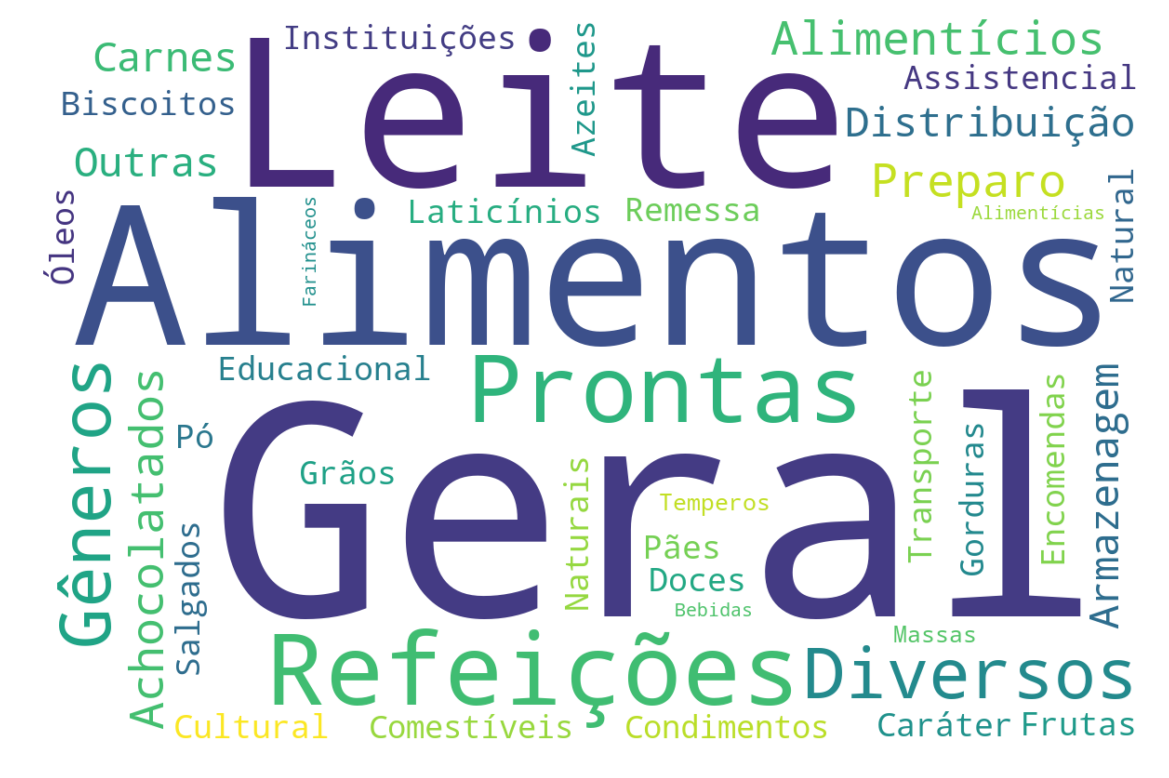

In [152]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

# Create a list of word
# text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")
d_df = pd.DataFrame(d)
text = ' '.join(d_df.index)
 
# Create the wordcloud object
wordcloud = WordCloud(
    width=1200, height=800, margin=20,
    stopwords=stopwords,
    colormap='viridis',
#     mode='RGBA',
#     background_color='rgba(255, 255, 255, 0)'
    background_color='#fff'
).generate(text)
 
# Display the generated image:
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

[nltk_data] Downloading package stopwords to /home/bpl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


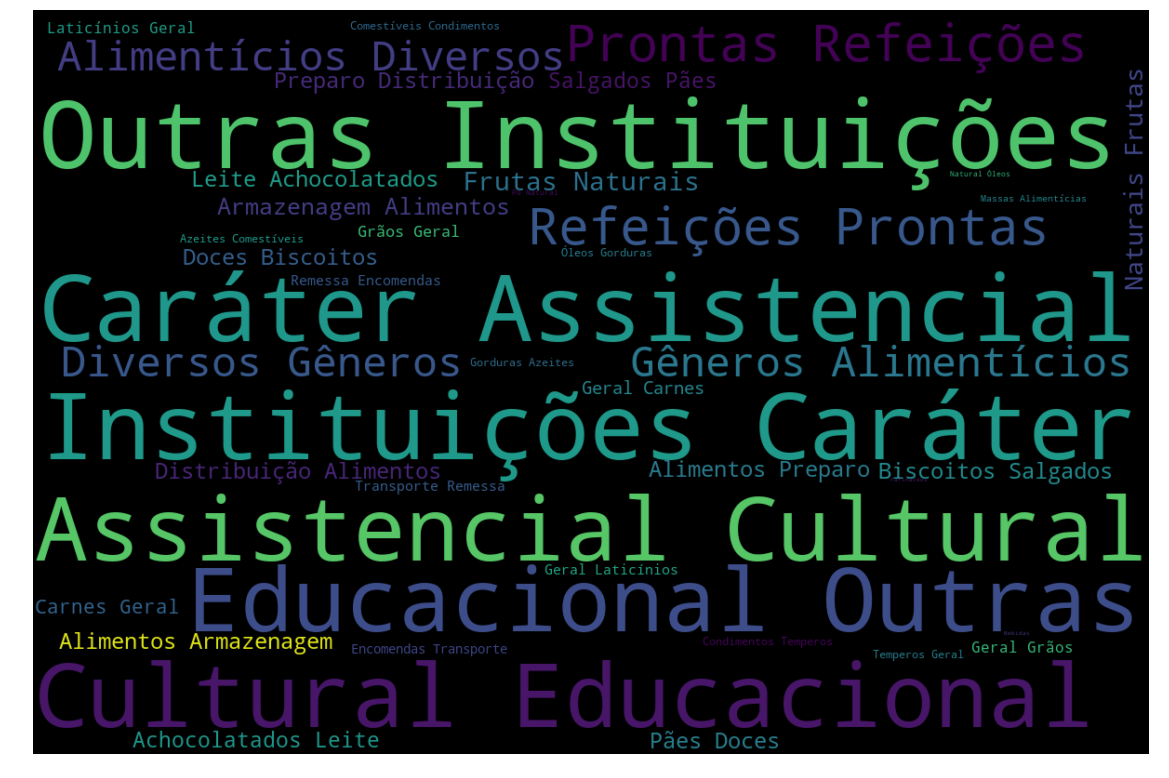

In [113]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

# Create a list of word
# text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")
d_df = (empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
])
text = ' '.join(d_df.txtDescricaoItemDespesa)
 
# Create the wordcloud object
wordcloud = WordCloud(
    width=1200, height=800, margin=0,
    stopwords=stopwords
).generate(text)
 
# Display the generated image:
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Wordcloud para todos itens de despesa

[nltk_data] Downloading package stopwords to /home/bpl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


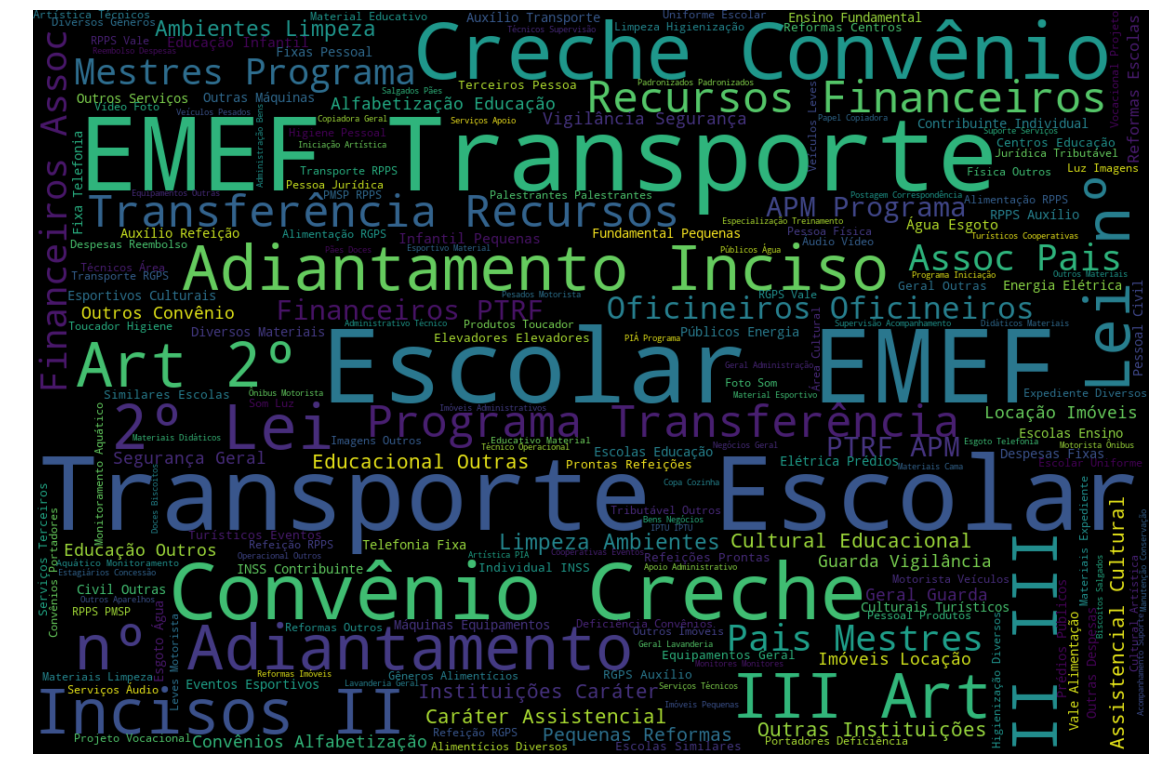

In [102]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

text = ' '.join(empenhos_df['txtDescricaoItemDespesa'])
 
# Create the wordcloud object
wordcloud = WordCloud(
    width=1200, height=800, margin=0,
    stopwords=stopwords
).generate(text)
 
# Display the generated image:
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

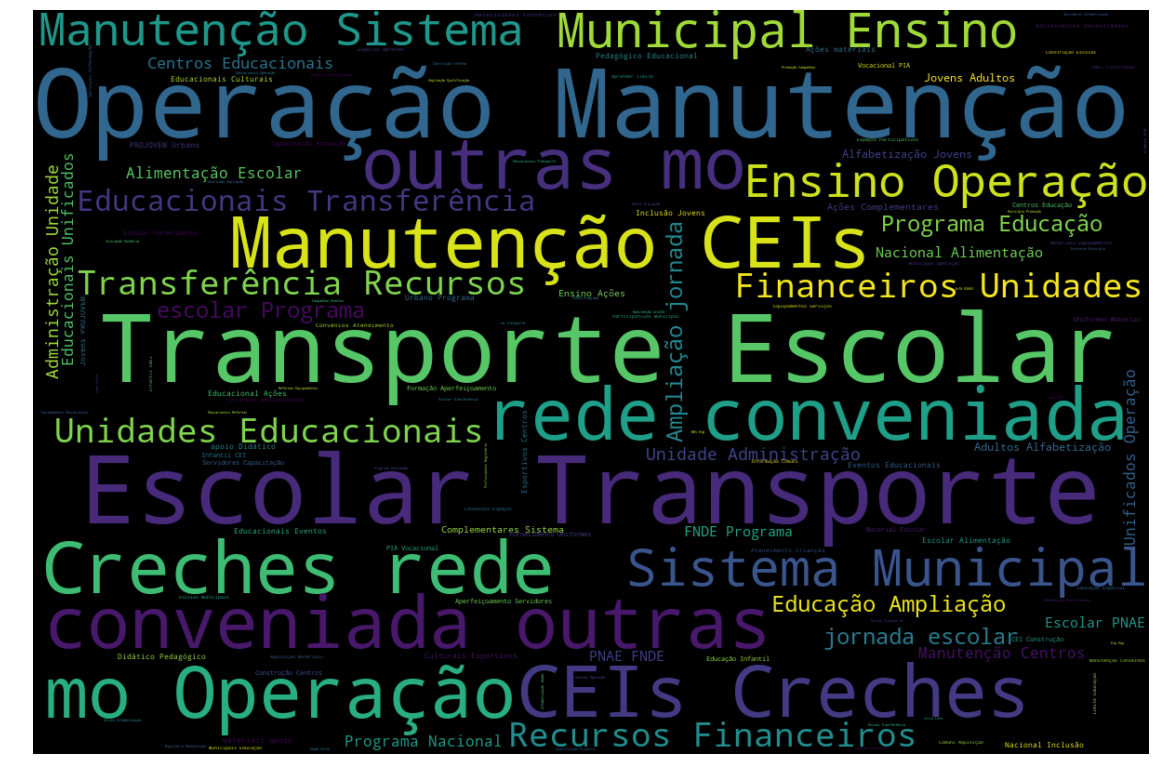

In [101]:
text = ' '.join(empenhos_df['txtDescricaoProjetoAtividade'])
 
# Create the wordcloud object
wordcloud = WordCloud(
    width=1200, height=800, margin=0,
    stopwords=stopwords
).generate(text)
 
# Display the generated image:
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

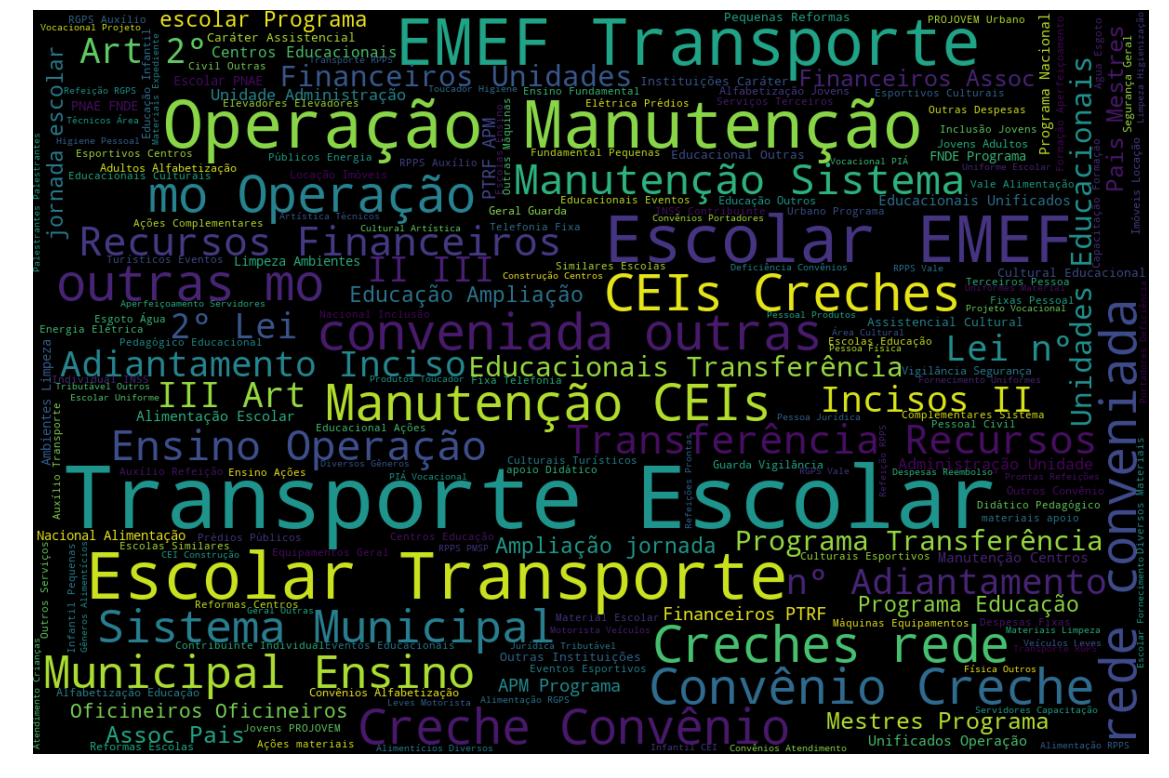

In [100]:
text = ' '.join(empenhos_df['txtDescricaoProjetoAtividade'])
text += ' '.join(empenhos_df['txtDescricaoItemDespesa'])
 
# Create the wordcloud object
wordcloud = WordCloud(
    width=1200, height=800, margin=0,
    stopwords=stopwords
).generate(text)
 
# Display the generated image:
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### `AL.2` Alimentação - Fonte dos Recursos

In [154]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
]
 .groupby(['txtDescricaoFonteRecurso', 'txtDescricaoProjetoAtividade'])['valLiquidado']
 .sum().apply(lambda x: x / 1000000).sort_values(ascending=False))

txtDescricaoFonteRecurso  txtDescricaoProjetoAtividade                         
Transferências Federais   Alimentação Escolar                                      462.830096
                          Programa Nacional de Alimentação Escolar - PNAE/ FNDE    118.456401
Tesouro Municipal         Leve-Leite                                                50.826933
                          Alimentação Escolar                                       14.150100
Name: valLiquidado, dtype: float64

In [155]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('alimenta', case=False))
    |
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('leite', case=False))
]
 .groupby(['txtDescricaoProjetoAtividade'])['valLiquidado']
 .sum().apply(lambda x: x / 1000000).sort_values(ascending=False))

txtDescricaoProjetoAtividade
Alimentação Escolar                                      476.980195
Programa Nacional de Alimentação Escolar - PNAE/ FNDE    118.456401
Leve-Leite                                                50.826933
Name: valLiquidado, dtype: float64

In [131]:
(empenhos_df
 .groupby('txtDescricaoFonteRecurso')['valLiquidado']
 .sum().apply(lambda x: x / 1000000).sort_values(ascending=False))

txtDescricaoFonteRecurso
Tesouro Municipal                   5788.261271
Fundo Constitucional da Educação    3827.119838
Transferências Federais              587.762549
Outras Fontes                         16.566437
Transferências Estaduais              16.419021
Name: valLiquidado, dtype: float64

In [135]:
tot = empenhos_df['valLiquidado'].sum()
(empenhos_df
 .groupby('txtDescricaoFonteRecurso')['valLiquidado']
 .sum().apply(lambda x: round((x / tot) * 100, 2)).sort_values(ascending=False))

txtDescricaoFonteRecurso
Tesouro Municipal                   56.55
Fundo Constitucional da Educação    37.39
Transferências Federais              5.74
Transferências Estaduais             0.16
Outras Fontes                        0.16
Name: valLiquidado, dtype: float64

## Educação especial

In [20]:
ed_especial = (empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.lower().str.contains('especial')])
ed_especial.txtDescricaoProjetoAtividade.unique()

array(['Educação Especial - Aprender sem limite'], dtype=object)

In [21]:
ed_especial = (empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.lower().str.contains('especial')])
ed_especial.txtDescricaoItemDespesa.unique()

array(['Concessão de Bolsa-Auxílio para Estagiários',
       'Convênios - Alfabetização, Educação e Outros',
       'Concessão de auxílio-transporte a estagiários',
       'Técnicos na Área Cultural e Artística',
       'Jornalistas e Outros Profissionais de Comunicação',
       'Cursos de Especialização e Treinamento',
       'Tradução ou Interpretação Comercial',
       'Supervisão, Acompanhamento e Suporte de Serviços Técnicos',
       'Taxa de Administração - Estagiário',
       'INSS / Contribuinte Individual '], dtype=object)

In [52]:
(ed_especial
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

valTotalEmpenhado  valLiquidado
anoEmpenho                                 
2017                56.401749     48.269271

In [54]:
groupSum(ed_especial)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes             56.401749     48.269271

valTotalEmpenhado  \
txtDescricaoElemento                                                
Outros Serviços de Terceiros - Pessoa Jurídica          51.516665   
Outros Auxílios Financeiros a Pessoas Físicas            4.485520   
Outros Serviços de Terceiros -Pessoa Jurídica            0.387418   
Outros Serviços de Terceiros - Pessoa Física             0.004928   
Obrigações Tributárias e Contributivas                   0.007218   

                                                valLiquidado  
txtDescricaoElemento                                          
Outros Serviços de Terceiros - Pessoa Jurídica     44.565898  
Outros Auxílios Financeiros a Pessoas Físicas       3.355589  
Outros Serviços de Terceiros -Pessoa Jurídica       0.339620  
Outros Serviços de Terceiros - Pessoa Física        0.004389  
Obrigações Tributárias e Contributivas              0.003774

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Tesouro Municipal                 56.401749     48.269271

valTotalEmpenhado  \
txtDescricaoItemDespesa                                                 
Convênios - Alfabetização, Educação e Outros                32.364774   
Concessão de Bolsa-Auxílio para Estagiários                 19.151891   
Concessão de auxílio-transporte a estagiários                4.485520   
Taxa de Administração - Estagiário                           0.343528   
Cursos de Especialização e Treinamento                       0.027890   
Supervisão, Acompanhamento e Suporte de Serviço...           0.008200   
Tradução ou Interpretação Comercial                          0.007800   
Jornalistas e Outros Profissionais de Comunicação            0.004389   
INSS / Contribuinte Individual                               0.007218   
Técnicos na Área Cultural e Artística                        0.000539   

                                                    valLiquidado  
txtDescricaoItemDespesa                                           
Convênios - Alfabetização, Educação e Outros           28.047264  
Concessão de Bolsa-Auxílio para Estagiários            16.518633  
Concessão de auxílio-transporte a estagiários           3.355589  
Taxa de Administração - Estagiário                      0.295730  
Cursos de Especialização e Treinamento                  0.027890  
Supervisão, Acompanhamento e Suporte de Serviço...      0.008200  
Tradução ou Interpretação Comercial                     0.007800  
Jornalistas e Outros Profissionais de Comunicação       0.004389  
INSS / Contribuinte Individual                          0.003774  
Técnicos na Área Cultural e Artística                   0.000000

valTotalEmpenhado  valLiquidado
txtDescricaoPrograma                                               
Direitos da pessoa com deficiência          56.401749     48.269271

valTotalEmpenhado  valLiquidado
txtDescricaoProjetoAtividade                                            
Educação Especial - Aprender sem limite          56.401749     48.269271

valTotalEmpenhado  \
txtDescricaoSubElemento                                                 
Serviços de Apoio ao Ensino                                 32.364774   
Instituições Caráter Assist. Cult. Educ. - Outr...          19.151891   
Auxílios a Pessoas Físicas                                   4.485520   
Outros Serviços de Terceiros - Pessoa Jurídica               0.343528   
Serviços de Seleção e Treinamento                            0.027890   
Serviços Técnicos Profissionais                              0.020928   
Contribuições Previdenciárias - Serviços de Ter...           0.007218   

                                                    valLiquidado  
txtDescricaoSubElemento                                           
Serviços de Apoio ao Ensino                            28.047264  
Instituições Caráter Assist. Cult. Educ. - Outr...     16.518633  
Auxílios a Pessoas Físicas                              3.355589  
Outros Serviços de Terceiros - Pessoa Jurídica          0.295730  
Serviços de Seleção e Treinamento                       0.027890  
Serviços Técnicos Profissionais                         0.020389  
Contribuições Previdenciárias - Serviços de Ter...      0.003774

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                 
Educação Especial              56.401749     48.269271

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                    
Gabinete do Secretário          56.401749     48.269271

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes          56.401749     48.269271

valTotalEmpenhado  \
txtModalidadeAplicacao                                                  
Transferências a Instituições Privadas sem Fins...          56.002185   
Aplicações Diretas                                           0.399564   

                                                    valLiquidado  
txtModalidadeAplicacao                                            
Transferências a Instituições Privadas sem Fins...     47.921487  
Aplicações Diretas                                      0.347784

valTotalEmpenhado  \
txtRazaoSocial                                                          
SPDM-ASSOCIAÇÃO PAULISTA PARA O DESENVOLVIMENTO...          32.364774   
CENTRO DE INTEGRAÇÃO EMPRESA ESCOLA CIEE                    23.980939   
FUNDACAO PARA O DESENVOLVIMENTO DA UNESP  -  FU...           0.036090   
EDUCALIBRAS TREINAMENTO E DESENVOLVIMENTO DO ID...           0.007800   
INSTITUTO NACIONAL DO SEGURO SOCIAL                          0.007218   
NISVALDO APARECIDO SANTANA                                   0.001155   
ROBERTA DE ALMEIDA SILVA                                     0.001155   
DAVID MARQUES LIMA                                           0.000539   
SIMONE CALDEIRA ALENCAR                                      0.001078   
REJANE DA SILVA CORREIA                                      0.000500   
SORAYA MACHADO TURQUI                                        0.000500   

                                                    valLiquidado  
txtRazaoSocial                                                    
SPDM-ASSOCIAÇÃO PAULISTA PARA O DESENVOLVIMENTO...     28.047264  
CENTRO DE INTEGRAÇÃO EMPRESA ESCOLA CIEE               20.169953  
FUNDACAO PARA O DESENVOLVIMENTO DA UNESP  -  FU...      0.036090  
EDUCALIBRAS TREINAMENTO E DESENVOLVIMENTO DO ID...      0.007800  
INSTITUTO NACIONAL DO SEGURO SOCIAL                     0.003774  
NISVALDO APARECIDO SANTANA                              0.001155  
ROBERTA DE ALMEIDA SILVA                                0.001155  
DAVID MARQUES LIMA                                      0.000539  
SIMONE CALDEIRA ALENCAR                                 0.000539  
REJANE DA SILVA CORREIA                                 0.000500  
SORAYA MACHADO TURQUI                                   0.000500

## Uniformes

In [55]:
uniformes = (empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.lower().str.contains('uniforme')])
uniformes.txtDescricaoProjetoAtividade.unique()

array(['Fornecimento de Uniformes e Material Escolar'], dtype=object)

In [56]:
(uniformes
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

valTotalEmpenhado  valLiquidado
anoEmpenho                                 
2017               343.673963    122.696111

Mas qual é mais preciso, `txtDescricaoProjetoAtividade` ou `txtDescricaoItemDespesa`?

In [57]:
(empenhos_df[empenhos_df['txtDescricaoItemDespesa'].str.lower().str.contains('uniforme')]
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

valTotalEmpenhado  valLiquidado
anoEmpenho                                 
2017                300.02518    101.825344

O problema é que `txtDescricaoItemDespesa` nem sempre é categorizado adequadamente. Por exemplo, acima, não é possível que em 2014 a Prefeitura não tenha gastado praticamente nada com uniformes.

In [58]:
np.sort(empenhos_df[empenhos_df['txtDescricaoProjetoAtividade'].str.lower().str.contains('uniforme')]
     .txtDescricaoItemDespesa.unique())

array(['Material Escolar', 'Uniforme Escolar'], dtype=object)

## Uniformes e material

In [59]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('materia', case=False))
]
.txtDescricaoProjetoAtividade.unique())

array(['Ações e materiais de apoio Didático-Pedagógico Educacional',
       'Aquisição de Materiais, Equipamentos e Serviços de Informação e Comuni',
       'Fornecimento de Uniformes e Material Escolar'], dtype=object)

In [60]:
uni_mat_df = (empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('materia', case=False))
    &
    (~empenhos_df['txtDescricaoProjetoAtividade'].str.contains('comun', case=False))
])

In [47]:
np.sort((empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('materia', case=False))
    &
    (~empenhos_df['txtDescricaoItemDespesa'].str.contains('comun', case=False))
]).txtDescricaoItemDespesa.unique())

array(['Diversos Materiais Bibliográficos Não Imobilizáveis',
       'Diversos Materiais Elétricos e Eletrônicos',
       'Diversos Materiais Farmacológicos',
       'Diversos Materiais Festividades e Homenagens',
       'Diversos Materiais Hospitalares',
       'Diversos Materiais Odontológicos', 'Diversos Materiais Químicos',
       'Diversos Materiais de Acondicionamento e Embalagens',
       'Diversos Materiais de Cama, Mesa e Banho ',
       'Diversos Materiais de Copa e Cozinha ',
       'Diversos Materiais de Expediente',
       'Diversos Materiais de Limpeza e Higienização',
       'Diversos Materiais de Proteção e Segurança',
       'Diversos Materiais de Sinalização Visual e Afins',
       'Diversos Materiais para Manutenção de Bens Imóveis',
       'Diversos Materiais para Manutenção de Bens Móveis',
       'Diversos Materiais para Uso na Área de Informática ',
       'Diversos Materiais para Áudio, Vídeo e Foto',
       'Materiais Didáticos', 'Materiais Fotográficos',
     

In [56]:
uni_mat_df = (empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('Materiais Didáticos', case=False))
    |
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('Materiais para Desenho', case=False))
    |
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('uniforme', case=False))
    |
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('Material educativo', case=False))
    |
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('Material escolar', case=False))
    |
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('Eventos Esportivos Culturais e Artísticos', case=False))
    |
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('Material esportivo', case=False))
])

In [60]:
(uni_mat_df
 .groupby('anoEmpenho')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000))

valTotalEmpenhado  valLiquidado
anoEmpenho                                 
2017               354.436693    125.351712

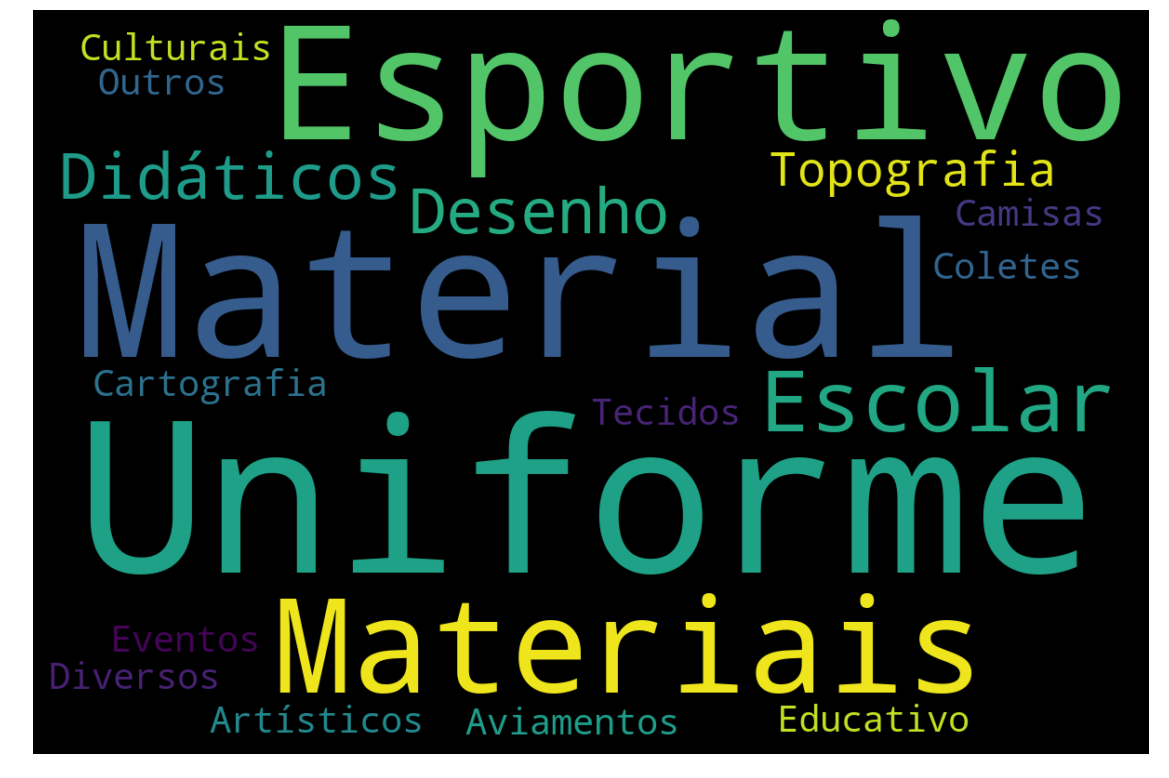

In [119]:
stopwords = nltk.corpus.stopwords.words('portuguese')

# Create a list of word
# text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")
text = ' '.join(uni_mat_df['txtDescricaoItemDespesa'].unique())
 
# Create the wordcloud object
wordcloud = WordCloud(
    width=1200, height=800, margin=20,
    stopwords=stopwords
).generate(text)
 
# Display the generated image:
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [61]:
groupSum(uni_mat_df)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes            354.436693    125.351712

valTotalEmpenhado  \
txtDescricaoElemento                                                    
Material, Bem ou Serviço para Distribuição Grat...         347.700502   
Material de Consumo                                          6.631588   
Outros Serviços de Terceiros -Pessoa Jurídica                0.104603   

                                                    valLiquidado  
txtDescricaoElemento                                              
Material, Bem ou Serviço para Distribuição Grat...    122.696111  
Material de Consumo                                     2.553690  
Outros Serviços de Terceiros -Pessoa Jurídica           0.101911

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Tesouro Municipal                354.436693    125.351712

valTotalEmpenhado  \
txtDescricaoItemDespesa                                               
Uniforme Escolar                                         299.956901   
Material Escolar                                          47.743602   
Materiais Didáticos                                        2.476033   
Material Educativo                                         3.883992   
Material Esportivo                                         0.207774   
Eventos Esportivos Culturais e Artísticos                  0.071757   
Uniformes, Camisas, Coletes e Outros                       0.032845   
Materiais para Desenho, Topografia e Cartografia           0.028355   
Diversos Uniformes, Tecidos e Aviamentos                   0.025565   
Uniformes Esportivos                                       0.009870   

                                                  valLiquidado  
txtDescricaoItemDespesa                                         
Uniforme Escolar                                    101.765057  
Material Escolar                                     20.931055  
Materiais Didáticos                                   2.040071  
Material Educativo                                    0.302317  
Material Esportivo                                    0.155505  
Eventos Esportivos Culturais e Artísticos             0.069066  
Uniformes, Camisas, Coletes e Outros                  0.032845  
Materiais para Desenho, Topografia e Cartografia      0.028355  
Diversos Uniformes, Tecidos e Aviamentos              0.017573  
Uniformes Esportivos                                  0.009870

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...         353.654685   
Modernização e descentralização da gestão e pre...           0.760960   
Suporte Administrativo                                       0.021048   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...    124.969294  
Modernização e descentralização da gestão e pre...      0.361370  
Suporte Administrativo                                  0.021048

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Fornecimento de Uniformes e Material Escolar               343.673963   
Ações e materiais de apoio Didático-Pedagógico ...           9.231558   
Capacitação, Formação e Aperfeiçoamento de Serv...           0.760960   
Ampliação da jornada escolar - Programa Mais Ed...           0.477874   
Operação e Manutenção do Sistema Municipal de E...           0.248322   
Administração da Unidade                                     0.021048   
Operação e Manutenção dos Centros Educacionais ...           0.014973   
Eventos Educacionais, Culturais e Esportivos no...           0.007995   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Fornecimento de Uniformes e Material Escolar          122.696111  
Ações e materiais de apoio Didático-Pedagógico ...      1.659042  
Capacitação, Formação e Aperfeiçoamento de Serv...      0.361370  
Ampliação da jornada escolar - Programa Mais Ed...      0.351802  
Operação e Manutenção do Sistema Municipal de E...      0.240329  
Administração da Unidade                                0.021048  
Operação e Manutenção dos Centros Educacionais ...      0.014014  
Eventos Educacionais, Culturais e Esportivos no...      0.007995

valTotalEmpenhado  \
txtDescricaoSubElemento                                                 
Outros Materiais de Distribuição Gratuita                  299.956901   
Material Educacional e Cultural                             47.743602   
Outros Materiais de Consumo                                  2.504388   
Material Educativo e Esportivo                               4.091766   
Exposições, Congressos, Conferências e Outros E...           0.071757   
Confecção de Uniformes, Bandeiras e Flâmulas                 0.032845   
Uniformes, Tecidos e Aviamentos                              0.035434   

                                                    valLiquidado  
txtDescricaoSubElemento                                           
Outros Materiais de Distribuição Gratuita             101.765057  
Material Educacional e Cultural                        20.931055  
Outros Materiais de Consumo                             2.068426  
Material Educativo e Esportivo                          0.457822  
Exposições, Congressos, Conferências e Outros E...      0.069066  
Confecção de Uniformes, Bandeiras e Flâmulas            0.032845  
Uniformes, Tecidos e Aviamentos                         0.027442

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                        
Educação Básica                      343.937258    122.950455
Administração Geral                    9.738475      2.039888
Formação de Recursos Humanos           0.760960      0.361370

valTotalEmpenhado  \
txtDescricaoUnidade                                                    
Gabinete do Secretário                                    354.060088   
Diretoria Regional de Educação - Penha                      0.140137   
Diretoria Regional de Educação - Campo Limpo                0.050250   
Diretoria Regional de Educação - Ipiranga                   0.040352   
Diretoria Regional de Educação - Guaianases                 0.025910   
Diretoria Regional de Educação - Jaçanã/Tremembé            0.031127   
Diretoria Regional de Educação  Capela do Socorro           0.020371   
Diretoria Regional de Educação - Itaquera                   0.027548   
Diretoria Regional de Educação - Santo Amaro                0.016175   
Diretoria Regional de Educação - São Miguel                 0.010632   
Diretoria Regional de Educação - São Mateus                 0.008769   
Diretoria Regional de Educação - Pirituba                   0.005333   

                                                   valLiquidado  
txtDescricaoUnidade                                              
Gabinete do Secretário                               124.999618  
Diretoria Regional de Educação - Penha                 0.137137  
Diretoria Regional de Educação - Campo Limpo           0.050250  
Diretoria Regional de Educação - Ipiranga              0.032360  
Diretoria Regional de Educação - Guaianases            0.025910  
Diretoria Regional de Educação - Jaçanã/Tremembé       0.025541  
Diretoria Regional de Educação  Capela do Socorro      0.020371  
Diretoria Regional de Educação - Itaquera              0.019616  
Diretoria Regional de Educação - Santo Amaro           0.016175  
Diretoria Regional de Educação - São Miguel            0.010632  
Diretoria Regional de Educação - São Mateus            0.008769  
Diretoria Regional de Educação - Pirituba              0.005333

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes         354.436693    125.351712

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas             354.436693    125.351712

valTotalEmpenhado  \
txtRazaoSocial                                                          
EBN COMERCIO IMPORTACAO E EXPORTACAO S/A                   107.089565   
BRINK MOBIL EQUIPAMENTOS EDUCACIONAIS LTDA                  66.958155   
NILCATEX TEXTIL LTDA                                        94.554172   
R.R.INDUSTRIA E COMERCIO DE MALHAS LTDA                     19.607706   
LT GLOBAL COMERCIO E SERVIÇOS EIRELI - ME                   18.161577   
ATAKA BRASIL COMERCIO E SERVIÇOS EIRELI                      9.892844   
LOTUS COMERCIO LTDA - ME                                    16.330650   
GRAFICA PRINT INDUSTRIA E EDITORA LTDA                       2.194847   
BRASILSUL INDUSTRIA E COMERCIO LTDA - EPP                    3.799922   
FUTURA COMERCIO DE MATERIAIS EDUCACIONAIS LTDA ...           1.904316   
THONY PRINT EDITORA GRAFICA LTDA - ME                        3.585156   
ONLINE PAPELARIA E INFORMATICA EIRELI - EPP                  1.191670   
PLANETA EDUCACIONAL COMERCIO E CONFECCAO LTDA                0.598229   
SPEZIA COMERCIAL DE MATERIAIS E SUPRIMENTOS EIR...           0.223884   
INNOVARY FUTURE COMERCIAL LTDA - ME                          0.117397   
PATRICIA C R MUCEDULA BRINQUEDOS PEDAGOGICOS ME              0.056832   
IMPRENSA OFICIAL DO ESTADO S/A IMESP                         0.054590   
RELAFLEX INDUSTRIA E COMERCIO DE COLCHOES EIREL...           0.050250   
CTIS TECNOLOGIA S.A.                                         0.049812   
TSC PONTUAL COMERCIAL E DISTRIBUIDORA LTDA - EPP             0.040688   
WINDGRAF GRAFICA E EDITORA EIRELI - EPP                      0.035060   
R.C.M. RAMOS LOMBARDI                                        0.028520   
ALLPER COMERCIAL EIRELI-ME                                   0.025395   
MRG PASCUALINI E CIA LTDA - EPP                              0.020440   
ASTRO COMERCIO DE MATERIAIS DE INFORMATICA EIRE...           0.022978   
OBJETIVA EVENTOS S/S LTDA                                    0.015957   
ORION VISION - COMERCIAL LTDA - EPP                          0.015907   
S.F.M.EVENTOS ESPORTIVOS  LTDA - EPP                         0.017338   
STYLLUS SPORT COMERCIO DE ARTIGOS ESPORTIVOS LT...           0.014110   
SARMUNG EQUIPAMENTOS E PRODUTOS LTDA - ME                    0.028000   
...                                                               ...   
MUQUE SPORTS CONCEPTION ARTIGOS ESPORTIVOS LTDA...           0.005506   
FERNANDO UNIFORMES EIRELI - EPP                              0.005071   
VERA LUCIA FRANCISCA DOS SANTOS - EPP                        0.004578   
RICARDO VINICIUS JUBRAN DE SOUZA-ME                          0.004500   
GHAIA COMERCIAL LTDA-EPP                                     0.003130   
RODRIGO TOLOSA RICO - EPP                                    0.003048   
300 COMERCIO SERVIÇO E LOGISTICA EIRELI-EPP                  0.002980   
LIVRE ACESSO BRAILLE SOLUCOES EM ACESSIBILIDADE...           0.002940   
GHC UNIFORMES PROFISSIONAIS LTDA - EPP                       0.002880   
K.S.ARTIGOS ESPORTIVOS-EIRELI-ME                             0.002433   
JAIR ANTONIO DE BRITO 33180083972                            0.001960   
MAGAZINE 155 COMERCIO VIRTUAL LTDA - ME                      0.001560   
TALITHA A DA S GIROTTO                                       0.000981   
FRATELLI COMERCIO DE MAQUINAS E EQUIPAMENTOS EI...           0.001918   
CASSIA CRISTINA DOS REIS COIMBRA                             0.000900   
FRANSPELL PAPELARIA E ARTIGOS DE INFORMATICA - ...           0.000795   
SANDRA REGINA MIQUE DA SILVA - ME                            0.000750   
ZELLO INDÚSTRIA GRÁFICA LTDA                                 0.000489   
RICARDO DOS SANTOS MOTTA 42365546587                         0.000469   
F.K.G COMERCIO E SERVICOS AUTOMOTIVOS LTDA - ME              0.004776   
MALAS PORTAM ATIVIDADES CULTURAIS E EDUCATIVAS ...           0.000400   
VITOR EDE RODRIGUES GUERIERI 45633605896                     0.000368   
JOÃO ROMERA MORENO INFORMÁTICA - ME  

## Pessoal

In [25]:
np.sort(empenhos_df.txtGrupoDespesa.unique())

array(['Investimentos', 'Outras Despesas Correntes',
       'Pessoal e Encargos Sociais'], dtype=object)

In [36]:
(empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('rpps', case=False))
    |
    (empenhos_df['txtGrupoDespesa'].str.contains('pessoal', case=False))
]
.txtDescricaoItemDespesa.unique())

array(['Auxílio-Transporte - RPPS', 'Auxílio-Refeição - RPPS',
       'Vale-Alimentação - RPPS', 'RPPS - PMSP', 'PMSP',
       'Outras Despesas Fixas - Pessoal Civil'], dtype=object)

In [18]:
(empenhos_df[
    (empenhos_df['txtDescricaoProjetoAtividade'].str.contains('remun', case=False))
]
.txtGrupoDespesa.unique())

array(['Pessoal e Encargos Sociais'], dtype=object)

In [31]:
(empenhos_df[
    (empenhos_df['txtGrupoDespesa'].str.contains('pessoal', case=False))
]
 .groupby('txtDescricaoProjetoAtividade')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000).sort_values('valLiquidado', ascending=False)
)

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Remuneração dos Profissionais do Magistério               4440.279767   
Operação e Manutenção do Sistema Municipal de E...        2207.218664   
Administração da Unidade                                   407.105017   
Operação e Manutenção dos Centros Educacionais ...          99.911863   
Ações Complementares do Sistema Municipal de En...          70.318400   
Programa Nacional de Inclusão de Jovens - PROJO...           2.862376   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Remuneração dos Profissionais do Magistério          3827.119838  
Operação e Manutenção do Sistema Municipal de E...   1477.177381  
Administração da Unidade                              326.869262  
Operação e Manutenção dos Centros Educacionais ...     80.761844  
Ações Complementares do Sistema Municipal de En...     56.139625  
Programa Nacional de Inclusão de Jovens - PROJO...      2.179419

In [37]:
(empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('rpps', case=False))
    |
    (empenhos_df['txtGrupoDespesa'].str.contains('pessoal', case=False))
]
 .groupby('txtDescricaoProjetoAtividade')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000).sort_values('valLiquidado', ascending=False)
)

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Remuneração dos Profissionais do Magistério               4440.279767   
Operação e Manutenção do Sistema Municipal de E...        2632.078365   
Administração da Unidade                                   423.332971   
Operação e Manutenção dos Centros Educacionais ...         105.723527   
Ações Complementares do Sistema Municipal de En...          74.744206   
Programa Nacional de Inclusão de Jovens - PROJO...           2.862376   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Remuneração dos Profissionais do Magistério          3827.119838  
Operação e Manutenção do Sistema Municipal de E...   1897.763038  
Administração da Unidade                              343.097216  
Operação e Manutenção dos Centros Educacionais ...     86.573509  
Ações Complementares do Sistema Municipal de En...     60.565431  
Programa Nacional de Inclusão de Jovens - PROJO...      2.179419

In [34]:
(empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('rpps', case=False))
    |
    (empenhos_df['txtGrupoDespesa'].str.contains('pessoal', case=False))
]
 .groupby('txtDescricaoItemDespesa')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000).sort_values('valLiquidado', ascending=False)
)

valTotalEmpenhado  valLiquidado
txtDescricaoItemDespesa                                               
RPPS - PMSP                                  7224.500741   5768.052052
Auxílio-Refeição - RPPS                       231.914947    231.900788
Vale-Alimentação - RPPS                       201.652925    197.393040
Auxílio-Transporte - RPPS                      17.757254     17.757254
Outras Despesas Fixas - Pessoal Civil           2.862376      2.179419
PMSP                                            0.332970      0.015898

In [38]:
(empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('rpps', case=False))
    |
    (empenhos_df['txtGrupoDespesa'].str.contains('pessoal', case=False))
]
 .groupby(['txtDescricaoItemDespesa', 'txtDescricaoFonteRecurso', 'txtDescricaoProjetoAtividade'])['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000).sort_values('valLiquidado', ascending=False)
)

valTotalEmpenhado  \
txtDescricaoItemDespesa               txtDescricaoFonteRecurso         txtDescricaoProjetoAtividade                                            
RPPS - PMSP                           Fundo Constitucional da Educação Remuneração dos Profissionais do Magistério               4440.279767   
                                      Tesouro Municipal                Operação e Manutenção do Sistema Municipal de E...        2207.218664   
                                                                       Administração da Unidade                                   406.772047   
Auxílio-Refeição - RPPS               Tesouro Municipal                Operação e Manutenção do Sistema Municipal de E...         218.186420   
Vale-Alimentação - RPPS               Tesouro Municipal                Operação e Manutenção do Sistema Municipal de E...         189.967257   
RPPS - PMSP                           Tesouro Municipal                Operação e Manutenção dos Centros Educacionais ...          99.911863   
                                                                       Ações Complementares do Sistema Municipal de En...          70.318400   
Auxílio-Transporte - RPPS             Tesouro Municipal                Operação e Manutenção do Sistema Municipal de E...          16.706024   
Auxílio-Refeição - RPPS               Tesouro Municipal                Administração da Unidade                                     8.417999   
Vale-Alimentação - RPPS               Tesouro Municipal                Administração da Unidade                                     7.165367   
Auxílio-Refeição - RPPS               Tesouro Municipal                Operação e Manutenção dos Centros Educacionais ...           3.014710   
Vale-Alimentação - RPPS               Tesouro Municipal                Operação e Manutenção dos Centros Educacionais ...           2.566110   
Auxílio-Refeição - RPPS               Tesouro Municipal                Ações Complementares do Sistema Municipal de En...           2.295818   
Outras Despesas Fixas - Pessoal Civil Transferências Federais          Programa Nacional de Inclusão de Jovens - PROJO...           2.551884   
Vale-Alimentação - RPPS               Tesouro Municipal                Ações Complementares do Sistema Municipal de En...           1.954191   
Auxílio-Transporte - RPPS             Tesouro Municipal                Administração da Unidade                                     0.644588   
                                                                       Operação e Manutenção dos Centros Educacionais ...           0.230844   
                                                                       Ações Complementares do Sistema Municipal de En...           0.175797   
Outras Despesas Fixas - Pessoal Civil Tesouro Municipal                Programa Nacional de Inclusão de Jovens - PROJO...           0.310493   
PMSP                                  Tesouro Municipal                Administração da Unidade                                     0.332970   

                                                                                                                           valLiquidado  
txtDescricaoItemDespesa               txtDescricaoFonteRecurso         txtDescricaoProjetoAtividade                                      
RPPS - PMSP                           Fundo Constitucional da Educação Remuneração dos Profissionais do Magistério          3827.119838  
                                      Tesouro Municipal                Operação e Manutenção do Sistema Municipal de E...   1477.177381  
                                                                       Administração da Unidade                              326.853364  
Auxílio-Refeição - RPPS               Tesouro Municipal                Operação e Manutenção do Sistema Municipal de E...    218.172262  
Vale-Alimentação - RPPS               Tesouro Municipal                Operação e Manutenção do Sistema Municipal de E...    1

In [39]:
(empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('rpps', case=False))
    |
    (empenhos_df['txtGrupoDespesa'].str.contains('pessoal', case=False))
]
 .groupby('txtDescricaoSubElemento')['valTotalEmpenhado', 'valLiquidado']
 .sum().apply(lambda x: x / 1000000).sort_values('valLiquidado', ascending=False)
)

valTotalEmpenhado  valLiquidado
txtDescricaoSubElemento                                               
Vencimentos e Salários                       7224.500741   5768.052052
Indenização Auxílio-Refeição                  433.567871    429.293828
Indenização Auxílio-Transporte                 17.757254     17.757254
Outras Despesas Fixas - Pessoal Civil           2.862376      2.179419
Pessoal Requisitado de Outros Órgãos            0.332970      0.015898

In [43]:
pessoal = (empenhos_df[
    (empenhos_df['txtDescricaoItemDespesa'].str.contains('rpps', case=False))
    |
    (empenhos_df['txtGrupoDespesa'].str.contains('pessoal', case=False))
])
groupSum(pessoal)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes           7679.021212   6217.298451

valTotalEmpenhado  \
txtDescricaoElemento                                                  
Vencimentos e Vantagens Fixas - Pessoal Civil           7227.363117   
Auxílio-Alimentação                                      433.567871   
Auxílio-Transporte                                        17.757254   
Ressarcimento de Despesas de Pessoal Requisitado           0.332970   

                                                  valLiquidado  
txtDescricaoElemento                                            
Vencimentos e Vantagens Fixas - Pessoal Civil      5770.231471  
Auxílio-Alimentação                                 429.293828  
Auxílio-Transporte                                   17.757254  
Ressarcimento de Despesas de Pessoal Requisitado      0.015898

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                         
Fundo Constitucional da Educação        4440.279767   3827.119838
Tesouro Municipal                       3236.189562   2388.158422
Transferências Federais                    2.551884      2.020191

valTotalEmpenhado  valLiquidado
txtDescricaoItemDespesa                                               
RPPS - PMSP                                  7224.500741   5768.052052
Auxílio-Refeição - RPPS                       231.914947    231.900788
Vale-Alimentação - RPPS                       201.652925    197.393040
Auxílio-Transporte - RPPS                      17.757254     17.757254
Outras Despesas Fixas - Pessoal Civil           2.862376      2.179419
PMSP                                            0.332970      0.015898

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Melhoria da qualidade e ampliação do acesso à e...        7255.688241   
Suporte Administrativo                                     423.332971   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Melhoria da qualidade e ampliação do acesso à e...   5874.201234  
Suporte Administrativo                                343.097216

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Remuneração dos Profissionais do Magistério               4440.279767   
Operação e Manutenção do Sistema Municipal de E...        2632.078365   
Administração da Unidade                                   423.332971   
Operação e Manutenção dos Centros Educacionais ...         105.723527   
Ações Complementares do Sistema Municipal de En...          74.744206   
Programa Nacional de Inclusão de Jovens - PROJO...           2.862376   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Remuneração dos Profissionais do Magistério          3827.119838  
Operação e Manutenção do Sistema Municipal de E...   1897.763038  
Administração da Unidade                              343.097216  
Operação e Manutenção dos Centros Educacionais ...     86.573509  
Ações Complementares do Sistema Municipal de En...     60.565431  
Programa Nacional de Inclusão de Jovens - PROJO...      2.179419

valTotalEmpenhado  valLiquidado
txtDescricaoSubElemento                                               
Vencimentos e Salários                       7224.500741   5768.052052
Indenização Auxílio-Refeição                  433.567871    429.293828
Indenização Auxílio-Transporte                 17.757254     17.757254
Outras Despesas Fixas - Pessoal Civil           2.862376      2.179419
Pessoal Requisitado de Outros Órgãos            0.332970      0.015898

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                        
Educação Básica                     7252.825865   5872.021815
Administração Geral                  423.332971    343.097216
Educação de Jovens e Adultos           2.862376      2.179419

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                    
Gabinete do Secretário        7679.021212   6217.298451

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                            
Pessoal e Encargos Sociais        7227.696087   5770.247369
Outras Despesas Correntes          451.325125    447.051082

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas            7679.021212   6217.298451

valTotalEmpenhado  \
txtRazaoSocial                                                          
FOLHA DE PAGAMENTO _ EXECUTIVO                            7224.500741   
SERV.SEC.MUN. DE EDUCAÇÃO - AUX. REFEIÇÃO                  433.567871   
SERVIDORES DA SECRETARIA MUNICIPAL DE EDUCAÇÃO ...          17.757254   
CARLOS AUGUSTO DE OLIVEIRA GONÇALVES                         0.026935   
ROSELICE APARECIDA CARDOSO SANTOS                            0.026918   
LUCIENE SOARES MARCOLINO                                     0.026935   
SANDRA MARIA AMANCIO DUARTE                                  0.026779   
ANDREA REGINA DE CARVALHO CASANOVA                           0.026733   
OLAVIO DE OLIVEIRA CONCEIÇÃO                                 0.026935   
MARTA DE SOUSA SILVA                                         0.026694   
ROZILDA FRANCISCA DA SILVA PAIXAO                            0.026779   
NADIA A.F.DA SILVA RIBEIRO                                   0.026784   
ALESSANDRA APARECIDA GONÇALVES GOIS MONTEIRO                 0.026767   
ZENAIDE LIMA DOS SANTOS                                      0.026582   
ANA CLAUDIA DA SILVA                                         0.026479   
IZABEL CRISTINA S LIMA DOS SANTOS                            0.026918   
ELLEN BIE                                                    0.027156   
EDNALVA SOARES ANDRADE                                       0.026727   
DANIEL DE SOUZA MEDEIROS                                     0.026531   
CARLA REGINA LIMA DE OLIVEIRA                                0.026161   
CLAUDIA CORREIA                                              0.026408   
MARLY TEIXEIRA DE CASTRO                                     0.026279   
CRISTIANE DOS SANTOS QUEIROZ                                 0.026055   
JOSIVETE DIAS SANTANA MEIRA                                  0.026727   
MARCIA CRISTINA PERUCHI DE SOUZA                             0.026287   
VERA LUCIA DA SILVA DOS SANTOS                               0.026509   
KATIA VASCONCELOS VANCO                                      0.025807   
ERICA APARECIDA BARBOSA                                      0.026564   
ANA PAULA DE OLIVEIRA                                        0.025959   
MARIA DAS GRACAS CORDEIRO COSTA                              0.026194   
...                                                               ...   
SONIA MARIA PEREIRA                                          0.009700   
ROGERIO GONÇALVES                                            0.009595   
SUELI DE FATIMA CABRAL GUEDES                                0.009700   
TATIANA MOREIRA DOS SANTOS                                   0.009700   
WALDO FELIPE GONZALEZ YANEZ                                  0.009700   
TANIA APARECIDA FEITOSA MEDEIROS                             0.009595   
PEDRO RODRIGUES SANTOS                                       0.009700   
ROSANE BADIALE BAPTISTA                                      0.009595   
OSMAR APARECIDO EDUARDINHO                                   0.025120   
KELI CRISTINA CORREIA                                        0.024214   
ANA DALVA DOS SANTOS PENICHE PEREIRA                         0.007927   
BRUNO ALEXANDRE DEANINI                                      0.006675   
FABIO LUIZ DE ARGOLO                                         0.025120   
MICHELLE MARIA DOS SANTOS SALAZAR                            0.022230   
ALEX SANDHER SOARES DE SOUZA                                 0.024214   
ANA ERIKA VIEIRA BEZERRA DO NASCIMENTO                       0.018996   
MIGUEL TADEU VICENTIM                                        0.021219   
MARCIA TEIXEIRA ROQUE VIEIRA                                 0.024214   
IZILDINHA BONFIM PEREIRA                                     0.024214   
RIVALDO SANTANA                                              0.024214   
JOSEMIR PEDRO DE SOUZA                                       0.024214   
AMANDA MENOZZI                                               0.019855   
KATIA ROCHA SOUSA                    

### Número de servidores

In [12]:
serv_df = pd.read_csv('dados/perfilservidor2016final2.csv', sep='|', encoding='latin-1')
serv_df

/home/bpl/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


CD_SERV_SME  MES_NASC  ANO_NASC  IDADE CD_SEXO  CD_MUNICIPIO_NASC  \
0           147682         7      1949     67       F          3550308.0   
1           118214         3      1950     66       F          3550308.0   
2           124178         1      1946     70       F          3550308.0   
3           217841         6      1948     68       F          3550308.0   
4           141541        12      1947     69       F          3550308.0   
5           103173        11      1950     66       M          3550308.0   
6           267671        12      1946     70       F          3550308.0   
7           167152         4      1952     64       F          3550308.0   
8           106253         2      1950     66       F          3550308.0   
9           153522        10      1951     65       F          3550308.0   
10          219066         5      1951     65       M          3550308.0   
11          142393         4      1946     70       F          3510401.0   
12          250038        10      1946     70       F          3152907.0   
13          181730         3      1948     68       F                NaN   
14          135849        10      1952     64       F                NaN   
15          176884         4      1948     68       F          3525904.0   
16          267046         5      1946     70       F          3534005.0   
17          144253         2      1952     64       F          3550308.0   
18          107055         1      1946     70       F          3529005.0   
19          122885         8      1951     65       F          3550308.0   
20          281404         7      1947     69       F          3550308.0   
21          235885         5      1951     65       F          3512506.0   
22          134756         3      1948     68       M                NaN   
23          140049         8      1948     68       F          3550308.0   
24          222889         8      1953     63       F          3540507.0   
25          100698         4      1947     69       F          3550308.0   
26          262560         9      1949     67       F          3550308.0   
27          102414         3      1951     65       F          3550308.0   
28          173465        11      1948     68       F          3502804.0   
29          175973         7      1952     64       F          3550308.0   
...            ...       ...       ...    ...     ...                ...   
83275       471823         1      1975     41       F          3550308.0   
83276       480627         8      1976     40       F          3523107.0   
83277       495194         7      1960     56       F          2611606.0   
83278       498687         6      1994     22       F          3550308.0   
83279       498710         8      1983     33       F          3515103.0   
83280       479626         6      1965     51       F          3550308.0   
83281       478639         6      1984     32       F          3553807.0   
83282       478539        11      1975     41       F          3550308.0   
83283       495997         9      1981     35       F          3550308.0   
83284       470139         5      1989     27       F          3543402.0   
83285       466535         9      1976     40       F          3112703.0   
83286       481876         4      1991     25       F          2211001.0   
83287       465320         8      1963     53       F          3546405.0   
83288       479461         9      1986     30       F          3550308.0   
83289       482119        10      1969     47       F          4202404.0   
83290       484247         7      1984     32       F          3550308.0   
83291       492382         4      1972     44       F          3550308.0   
83292       489322         4      1962     54       F          3550308.0   
83293       481077         9      1979     37       F          3550308.0   
83294       475805         3      1968     48       M          3550308.0   
83295       487908         8      1990     26       F  

In [14]:
prof = serv_df[serv_df['DC_CARGO_BASE'].str.contains("PROF.")]
len(prof)

63438

In [15]:
len(serv_df)

83305

In [16]:
len(prof)/len(serv_df)

0.7615149150711242

In [22]:
10200-6200-1958-643-195-123-48
#total-pessoal-convenios-alimentacao-teg-material-infantil (ver se não há duplicados)

1033

In [25]:
(1958/10200)

0.19196078431372549

# TI

In [26]:
ti = (empenhos_df[
    (empenhos_df['txtDescricaoSubFuncao'].str.contains('tecnologia da inf', case=False))
])
groupSum(ti)

valTotalEmpenhado  valLiquidado
txtCategoriaEconomica                                 
Despesas Correntes             66.708423     40.613301
Despesas de Capital            41.379460      0.284038

valTotalEmpenhado  \
txtDescricaoElemento                                                
Outros Serviços de Terceiros -Pessoa Jurídica           66.705633   
Outros Serviços de Terceiros - Pessoa Jurídica           0.360000   
Equipamentos e Material Permanente                      41.019460   
Material de Consumo                                      0.002790   

                                                valLiquidado  
txtDescricaoElemento                                          
Outros Serviços de Terceiros -Pessoa Jurídica      40.610511  
Outros Serviços de Terceiros - Pessoa Jurídica      0.180000  
Equipamentos e Material Permanente                  0.104038  
Material de Consumo                                 0.002790

valTotalEmpenhado  valLiquidado
txtDescricaoFonteRecurso                                 
Tesouro Municipal                108.087883      40.89734

valTotalEmpenhado  \
txtDescricaoItemDespesa                                                 
Serviço de Instalação, Ampliação de Sist. de Te...          15.368131   
PRODAM                                                      15.912125   
Outros Serviços de Apoio Administrativo, Técnic...           9.316095   
Manutenção e Conservação de Equipamentos de Pro...           9.195115   
Manutenção de Software                                       8.605008   
Supervisão, Acompanhamento e Suporte de Serviço...           2.559587   
Equipamentos de Processamento de Dados                       0.583397   
Outras Máquinas e Equipamentos                               0.552979   
Guarda e Gerenciamento de Documentos                         4.603634   
Aquisição de Softwares - Intangível                          0.360000   
Outras Máquinas e Equipamentos Energéticos                   0.075294   
Switch                                                       0.033226   
Toner e Cartuchos de Tinta                                   0.002790   
Certificado Digital                                          0.001747   
Outros Aparelhos e Equipamentos de Comunicação              40.021740   
Pesquisa em Geral                                            0.007813   
Hardware                                                     0.889200   

                                                    valLiquidado  
txtDescricaoItemDespesa                                           
Serviço de Instalação, Ampliação de Sist. de Te...     11.271799  
PRODAM                                                  9.824414  
Outros Serviços de Apoio Administrativo, Técnic...      6.581965  
Manutenção e Conservação de Equipamentos de Pro...      5.937811  
Manutenção de Software                                  3.876742  
Supervisão, Acompanhamento e Suporte de Serviço...      1.771597  
Equipamentos de Processamento de Dados                  0.522691  
Outras Máquinas e Equipamentos                          0.460816  
Guarda e Gerenciamento de Documentos                    0.361129  
Aquisição de Softwares - Intangível                     0.180000  
Outras Máquinas e Equipamentos Energéticos              0.070812  
Switch                                                  0.033226  
Toner e Cartuchos de Tinta                              0.002790  
Certificado Digital                                     0.001547  
Outros Aparelhos e Equipamentos de Comunicação          0.000000  
Pesquisa em Geral                                       0.000000  
Hardware                                                0.000000

valTotalEmpenhado  \
txtDescricaoPrograma                                                    
Modernização e descentralização da gestão e pre...         108.087883   

                                                    valLiquidado  
txtDescricaoPrograma                                              
Modernização e descentralização da gestão e pre...      40.89734

valTotalEmpenhado  \
txtDescricaoProjetoAtividade                                            
Aquisição de Materiais, Equipamentos e Serviços...          92.175758   
Manutenção de Sistemas de Informação e Comunicação          15.912125   

                                                    valLiquidado  
txtDescricaoProjetoAtividade                                      
Aquisição de Materiais, Equipamentos e Serviços...     31.072926  
Manutenção de Sistemas de Informação e Comunicação      9.824414

valTotalEmpenhado  \
txtDescricaoSubElemento                                                 
Serviços de Telecomunicações                                15.368131   
Serviços Técnicos Profissionais de T.I.                     15.912125   
Serviço de Apoio Administrativo, Técnico e Oper...          13.919729   
Manutenção e Conservação de Equipamentos de Pro...           9.195115   
Manutenção de Software                                       8.605008   
Serviços Técnicos Profissionais                              2.567401   
Manut. e Conserv. de Máquinas e Equipamentos                 1.136377   
Aquisição de Softwares de Base ou Aplicação                  0.360000   
Máquinas e Equipamentos Energéticos                          0.075294   
Equipamentos de Processamento de Dados                       0.922426   
Material de Processamento de Dados                           0.002790   
Assinatura de Periódicos e Anuidades                         0.001747   
Aparelhos e Equipamentos de Comunicação                     40.021740   

                                                    valLiquidado  
txtDescricaoSubElemento                                           
Serviços de Telecomunicações                           11.271799  
Serviços Técnicos Profissionais de T.I.                 9.824414  
Serviço de Apoio Administrativo, Técnico e Oper...      6.943094  
Manutenção e Conservação de Equipamentos de Pro...      5.937811  
Manutenção de Software                                  3.876742  
Serviços Técnicos Profissionais                         1.771597  
Manut. e Conserv. de Máquinas e Equipamentos            0.983508  
Aquisição de Softwares de Base ou Aplicação             0.180000  
Máquinas e Equipamentos Energéticos                     0.070812  
Equipamentos de Processamento de Dados                  0.033226  
Material de Processamento de Dados                      0.002790  
Assinatura de Periódicos e Anuidades                    0.001547  
Aparelhos e Equipamentos de Comunicação                 0.000000

valTotalEmpenhado  valLiquidado
txtDescricaoSubFuncao                                    
Tecnologia da Informação         108.087883      40.89734

valTotalEmpenhado  valLiquidado
txtDescricaoUnidade                                    
Gabinete do Secretário         108.087883      40.89734

valTotalEmpenhado  valLiquidado
txtGrupoDespesa                                           
Outras Despesas Correntes          66.708423     40.613301
Investimentos                      41.379460      0.284038

valTotalEmpenhado  valLiquidado
txtModalidadeAplicacao                                 
Aplicações Diretas             108.087883      40.89734

valTotalEmpenhado  \
txtRazaoSocial                                                          
PRIMESYS SOLUÇÕES EMPRESARIAIS S.A.                         14.698120   
EMPRESA DE TECNOLOGIA DA INFORMAÇÃO E COMUNICAÇ...          15.912125   
GOLDEN DISTRIBUIDORA LTDA.                                   9.334915   
G&P PROJETOS E SISTEMAS LTDA                                 9.320045   
MSTECH EDUCACAO E TECNOLOGIA EIRELI                          7.853286   
AYNIL SOLUÇÕES S/A                                           2.634882   
TELEFÔNICA BRASIL S.A.                                       0.670011   
ACECO TI S.A.                                                0.583397   
GARTNER DO BRASIL SERVIÇOS DE PESQUISAS LTDA.                0.534159   
COMPWIRE INFORMATICA S/A                                     0.528122   
NC COMERCIO E SERVIÇOS LTDA - ME                             4.603634   
GEOAMBIENTE SENSORIAMENTO REMOTO LTDA                        0.360000   
LIFE TECNOLOGIA E CONSULTORIA LTDA - ME                      0.098670   
H L P COMERCIO ELETRO-FONIA LTDA - EPP                       0.033226   
SÉRGIO LUIZ SCHOGOR JUNIOR - ME                              0.002100   
SERASA S.A.                                                  0.001747   
VITOR EDE RODRIGUES GUERIERI 45633605896                     0.000690   
POSITIVO TECNOLOGIA S.A.                                    40.910940   
MERCER HUMAN RESOURCE CONSULTING LTDA                        0.007813   

                                                    valLiquidado  
txtRazaoSocial                                                    
PRIMESYS SOLUÇÕES EMPRESARIAIS S.A.                    10.708426  
EMPRESA DE TECNOLOGIA DA INFORMAÇÃO E COMUNICAÇ...      9.824414  
GOLDEN DISTRIBUIDORA LTDA.                              6.538447  
G&P PROJETOS E SISTEMAS LTDA                            5.895701  
MSTECH EDUCACAO E TECNOLOGIA EIRELI                     3.335047  
AYNIL SOLUÇÕES S/A                                      1.842409  
TELEFÔNICA BRASIL S.A.                                  0.563374  
ACECO TI S.A.                                           0.522691  
GARTNER DO BRASIL SERVIÇOS DE PESQUISAS LTDA.           0.504334  
COMPWIRE INFORMATICA S/A                                0.492444  
NC COMERCIO E SERVIÇOS LTDA - ME                        0.361129  
GEOAMBIENTE SENSORIAMENTO REMOTO LTDA                   0.180000  
LIFE TECNOLOGIA E CONSULTORIA LTDA - ME                 0.091360  
H L P COMERCIO ELETRO-FONIA LTDA - EPP                  0.033226  
SÉRGIO LUIZ SCHOGOR JUNIOR - ME                         0.002100  
SERASA S.A.                                             0.001547  
VITOR EDE RODRIGUES GUERIERI 45633605896                0.000690  
POSITIVO TECNOLOGIA S.A.                                0.000000  
MERCER HUMAN RESOURCE CONSULTING LTDA                   0.000000